## Import Modules, Load Data and Data Review

In [201]:
#First, importing the neccesary libaries, such as numpy, pandas
import pandas as pd
import numpy as np

#Importing the plotting libraries, such as matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#Importing the scaling libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#Importing the evaluation libraries, such as mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Importing the train_test_split to split the data
from sklearn.model_selection import train_test_split

from scipy.stats import skew

#Importing the cross validation
from sklearn.model_selection import cross_validate

#Importing make_column_transformer for tranforming
from sklearn.compose import make_column_transformer

#Importing OneHotEncoder, OrdinalEncoder to use them on the object data
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

#Importing ResidualsPlot
from yellowbrick.regressor import ResidualsPlot

#Importing PredictionError
from yellowbrick.regressor import PredictionError

#Importing RadViz
from yellowbrick.features import RadViz

#Importing LinearRegression model
from sklearn.linear_model import LinearRegression

#Importing Ridge model
from sklearn.linear_model import Ridge

#Importing GridSearchCV to find the best result from the hyperparameters
from sklearn.model_selection import GridSearchCV

#Importing ValidationCurve
from yellowbrick.model_selection import ValidationCurve

#Importing Lasso model
from sklearn.linear_model import Lasso

#Importing ElasticNet
from sklearn.linear_model import ElasticNet

#Importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#Importing pipeline
from sklearn.pipeline import Pipeline

#Importing ResidualsPlot
from yellowbrick.regressor import ResidualsPlot

#Importing LazyRegressor
from lazypredict.Supervised import LazyRegressor

#Importing XGBRegressor
from xgboost import XGBRegressor

#Importing pickle
import pickle

import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (14,6)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:.3f}'.format

In [2]:
#The test size
t = 0.2
#The random value
s = 101

In [3]:
#Reading the dataset from a csv file
df = pd.read_csv("final_scout_not_dummy.csv")

#Seeing the head of the data set
df.head()

make_model body_type  price               vat        km  Type     Fuel  \
0    Audi A1    Sedans  15770    VAT deductible 56013.000  Used   Diesel   
1    Audi A1    Sedans  14500  Price negotiable 80000.000  Used  Benzine   
2    Audi A1    Sedans  14640    VAT deductible 83450.000  Used   Diesel   
3    Audi A1    Sedans  14500    VAT deductible 73000.000  Used   Diesel   
4    Audi A1    Sedans  16790    VAT deductible 16200.000  Used   Diesel   

   Gears                                Comfort_Convenience  \
0  7.000  Air conditioning,Armrest,Automatic climate con...   
1  7.000  Air conditioning,Automatic climate control,Hil...   
2  7.000  Air conditioning,Cruise control,Electrical sid...   
3  6.000  Air suspension,Armrest,Auxiliary heating,Elect...   
4  7.000  Air conditioning,Armrest,Automatic climate con...   

                                 Entertainment_Media  \
0  Bluetooth,Hands-free equipment,On-board comput...   
1  Bluetooth,Hands-free equipment,On-board comput...   
2                              MP3,On-board computer   
3  Bluetooth,CD player,Hands-free equipment,MP3,O...   
4  Bluetooth,CD player,Hands-free equipment,MP3,O...   

                                              Extras  \
0     Alloy wheels,Catalytic Converter,Voice Control   
1  Alloy wheels,Sport seats,Sport suspension,Voic...   
2                         Alloy wheels,Voice Control   
3             Alloy wheels,Sport seats,Voice Control   
4  Alloy wheels,Sport package,Sport suspension,Vo...   

                                     Safety_Security   age  Previous_Owners  \
0  ABS,Central door lock,Daytime running lights,D... 3.000            2.000   
1  ABS,Central door lock,Central door lock with r... 2.000            1.000   
2  ABS,Central door lock,Daytime running lights,D... 3.000            1.000   
3  ABS,Alarm system,Central door lock with remote... 3.000            1.000   
4  ABS,Central door lock,Driver-side airbag,Elect... 3.000            1.000   

    hp_kW  Inspection_new Paint_Type Upholstery_type Gearing_Type  \
0  66.000               1   Metallic           Cloth    Automatic   
1 141.000               0   Metallic           Cloth    Automatic   
2  85.000               0   Metallic           Cloth    Automatic   
3  66.000               0   Metallic           Cloth    Automatic   
4  66.000               1   Metallic           Cloth    Automatic   

   Displacement_cc  Weight_kg Drive_chain  cons_comb  
0         1422.000   1220.000       front      3.800  
1         1798.000   1255.000       front      5.600  
2         1598.000   1135.000       front      3.800  
3         1422.000   1195.000       front      3.800  
4         1422.000   1135.000       front      4.100

In [4]:
#Seeing the shape of the data set
df.shape
#As we can see, the shape of the data set is (15915, 23)

(15915, 23)

In [5]:
#Seeing the info of the data set
df.info()
#We can see that, there are about 15915 entries. 23 columns, float64(8), int64(2), object(13).
#There is no null data as well

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [6]:
#Seeing the description of the dataset
df.describe().T
#We can see that the mean anst std for age, Inspection_new, and Previous_Owners are nearly close to each other

count      mean       std      min       25%       50%  \
price           15915.000 18024.381  7381.679 4950.000 12850.000 16900.000   
km              15915.000 32089.996 36977.215    0.000  1920.500 20413.000   
Gears           15915.000     5.937     0.705    5.000     5.000     6.000   
age             15915.000     1.390     1.121    0.000     0.000     1.000   
Previous_Owners 15915.000     1.043     0.339    0.000     1.000     1.000   
hp_kW           15915.000    88.499    26.674   40.000    66.000    85.000   
Inspection_new  15915.000     0.247     0.431    0.000     0.000     0.000   
Displacement_cc 15915.000  1428.662   275.804  890.000  1229.000  1461.000   
Weight_kg       15915.000  1337.701   199.682  840.000  1165.000  1295.000   
cons_comb       15915.000     4.832     0.868    3.000     4.100     4.800   

                      75%        max  
price           21900.000  74600.000  
km              46900.000 317000.000  
Gears               6.000      8.000  
age                 2.000      3.000  
Previous_Owners     1.000      4.000  
hp_kW             103.000    294.000  
Inspection_new      0.000      1.000  
Displacement_cc  1598.000   2967.000  
Weight_kg        1472.000   2471.000  
cons_comb           5.400      9.100

In [7]:
#Checking the duplicated values
df.duplicated().sum()
#As we can see, there are about 1673 duplicated values

1673

In [8]:
#Dropping the duplicated values
df.drop_duplicates(inplace=True)

In [9]:
#Checking the duplicated values after dropping
df.duplicated().sum()
#As we can see, now we have 0 duplicated values

0

In [10]:
#Checking the null values in the data set
df.isnull().sum()
#As we can see, we do not have null values

make_model             0
body_type              0
price                  0
vat                    0
km                     0
Type                   0
Fuel                   0
Gears                  0
Comfort_Convenience    0
Entertainment_Media    0
Extras                 0
Safety_Security        0
age                    0
Previous_Owners        0
hp_kW                  0
Inspection_new         0
Paint_Type             0
Upholstery_type        0
Gearing_Type           0
Displacement_cc        0
Weight_kg              0
Drive_chain            0
cons_comb              0
dtype: int64

In [11]:
#Seeing the columns of the data set
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

## EDA

### make_model

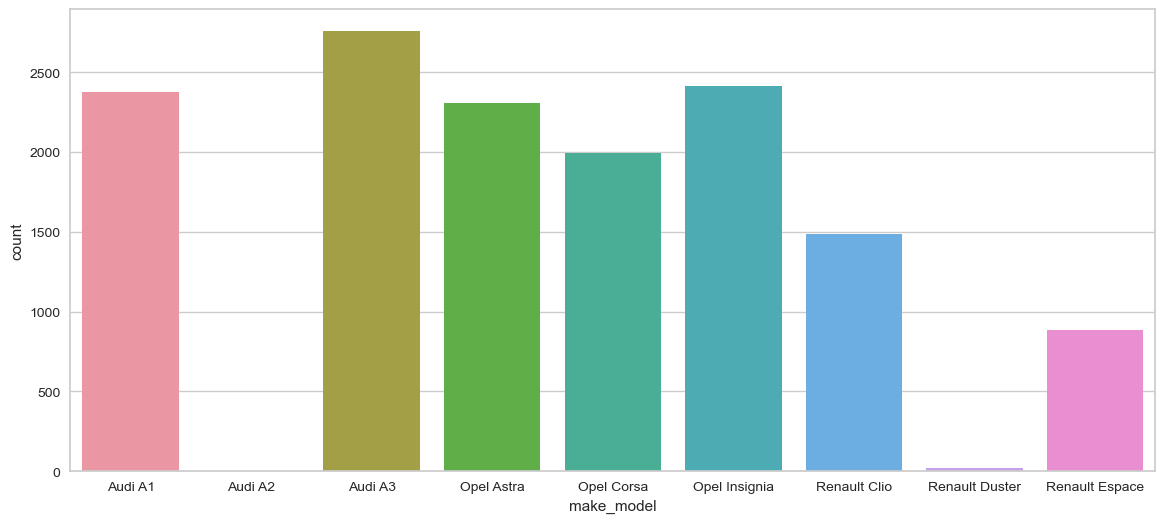

In [12]:
#Seeing the countplot of make_model
sns.countplot(x=df["make_model"])
plt.show()
#As we can see from the graph, we have 9 classes, for Audi A3 and Renault Duster, they are not high at all, and there values
#are so small compared to the others

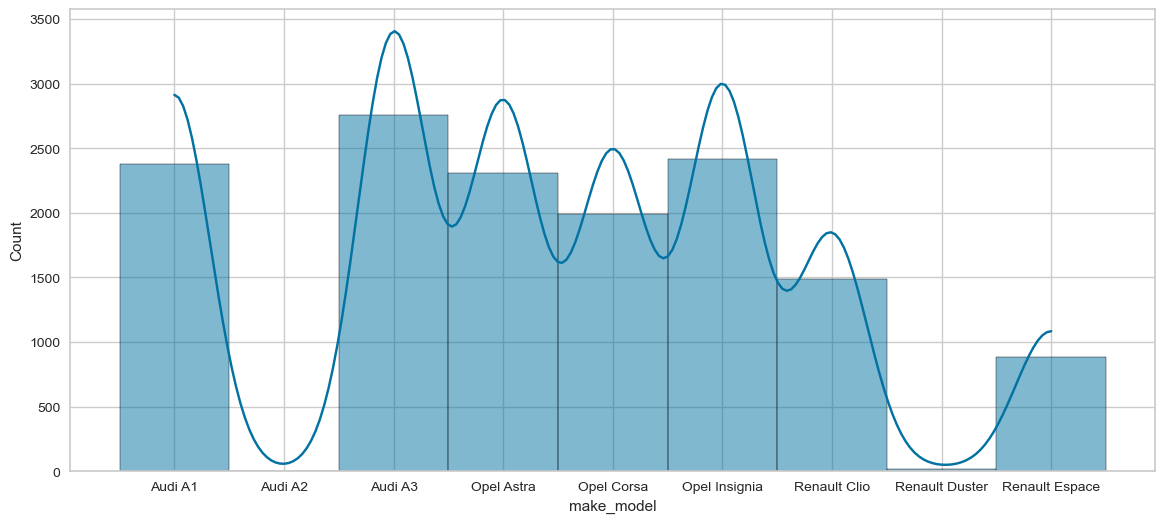

In [13]:
#Seeing the histplot of make_model
sns.histplot(df["make_model"], kde=True)
plt.show()
#We can see the same here as well, the values of Audi A3 and Renault Duster are so small

In [14]:
#Seeing the value counts of make_model
df.make_model.value_counts()
#As we can see, there are some of them have low values, so i am going to drop them (Audi A3 and Renault Duster)

make_model
Audi A3           2758
Opel Insignia     2417
Audi A1           2377
Opel Astra        2305
Opel Corsa        1994
Renault Clio      1486
Renault Espace     884
Renault Duster      20
Audi A2              1
Name: count, dtype: int64

In [15]:
#Making a variable to see the classes that have less than 100, as it may affect the model
low = df.make_model.value_counts()[df.make_model.value_counts() <= 100].index
low

Index(['Renault Duster', 'Audi A2'], dtype='object', name='make_model')

In [16]:
#Dropping the low values of make_model
for i in low:
    drop_index = df[df['make_model'] == i].index
    df.drop(index = drop_index, inplace=True)

df.reset_index(drop=True, inplace=True)

In [17]:
#Seeing the value counts of make_model after dropping
df.make_model.value_counts()
#As we can see, now we do not have classes with less than 100

make_model
Audi A3           2758
Opel Insignia     2417
Audi A1           2377
Opel Astra        2305
Opel Corsa        1994
Renault Clio      1486
Renault Espace     884
Name: count, dtype: int64

### body_type

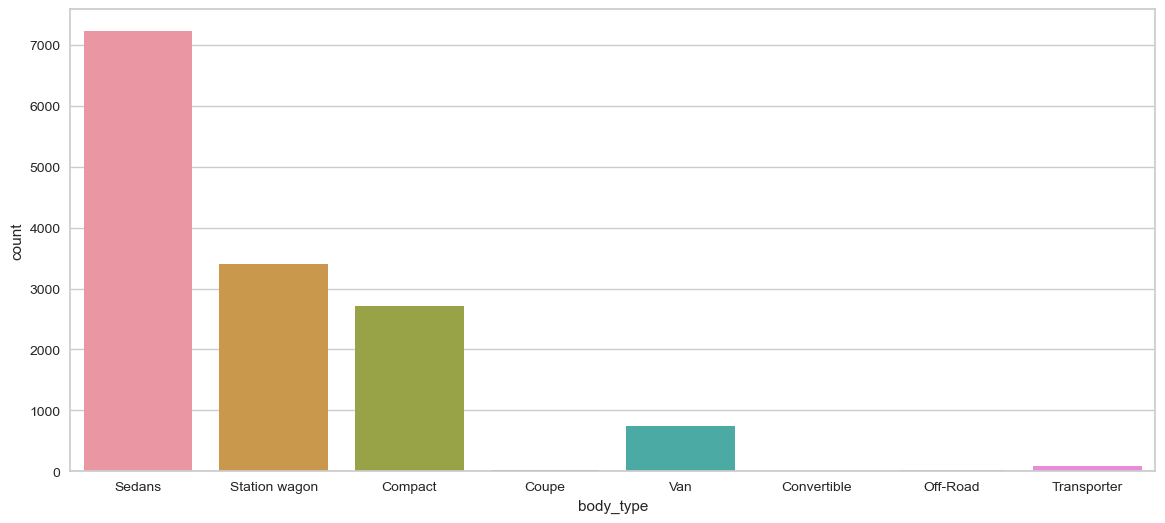

In [18]:
#Seeing the countplot of body_type
sns.countplot(x=df["body_type"])
plt.show()
#As we can see from the graph, we have 8 classes, for coupe, Off-Road, convertible, and Transporter, we can see that they 
#have tiny values.

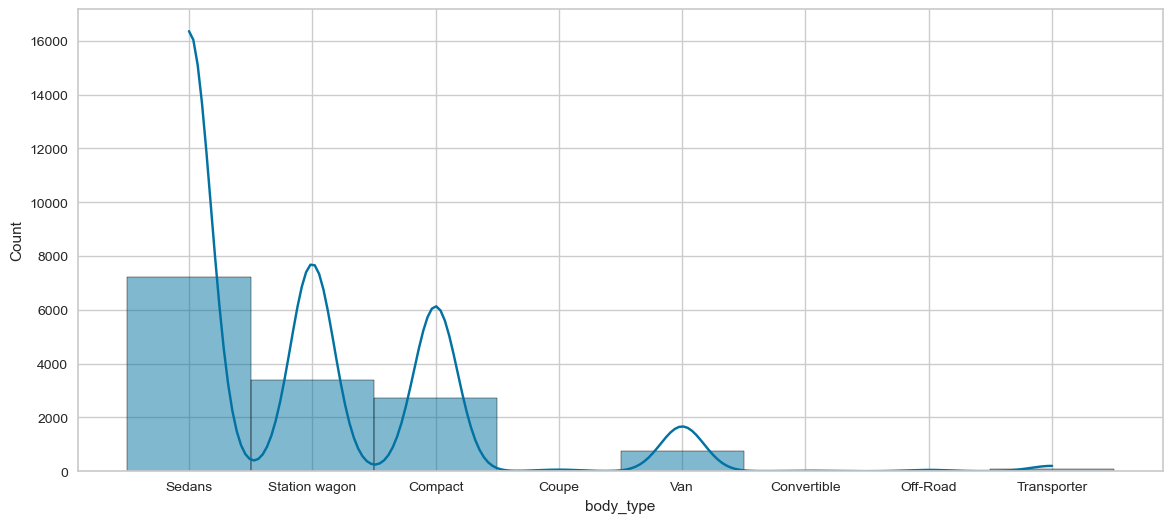

In [19]:
#Seeing the histplot of body_type
sns.histplot(df["body_type"], kde=True)
plt.show()
#We can see the same here as well, for coupe, Off-Road, convertible, and Transporter, we can see that they 
#have tiny values.

In [20]:
#Seeing the value counts of body_type
df.body_type.value_counts()

body_type
Sedans           7230
Station wagon    3405
Compact          2710
Van               735
Transporter        87
Coupe              25
Off-Road           21
Convertible         8
Name: count, dtype: int64

### price

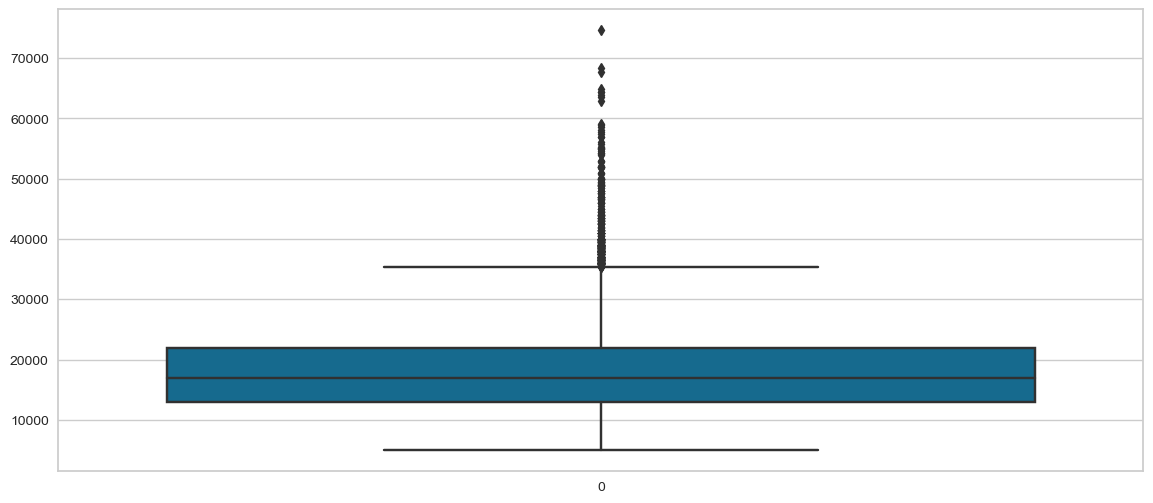

In [21]:
#Seeing teh boxplot of price
sns.boxplot(df['price'])
plt.show()
#As we can see, there are some outliers in price, i am going to drop them in the feature engineering part

In [22]:
#Seeing the value counts of price
df.price.value_counts()

price
14990    124
15990    121
15900    105
17990    100
10990     92
        ... 
20860      1
21005      1
21334      1
21360      1
39875      1
Name: count, Length: 2948, dtype: int64

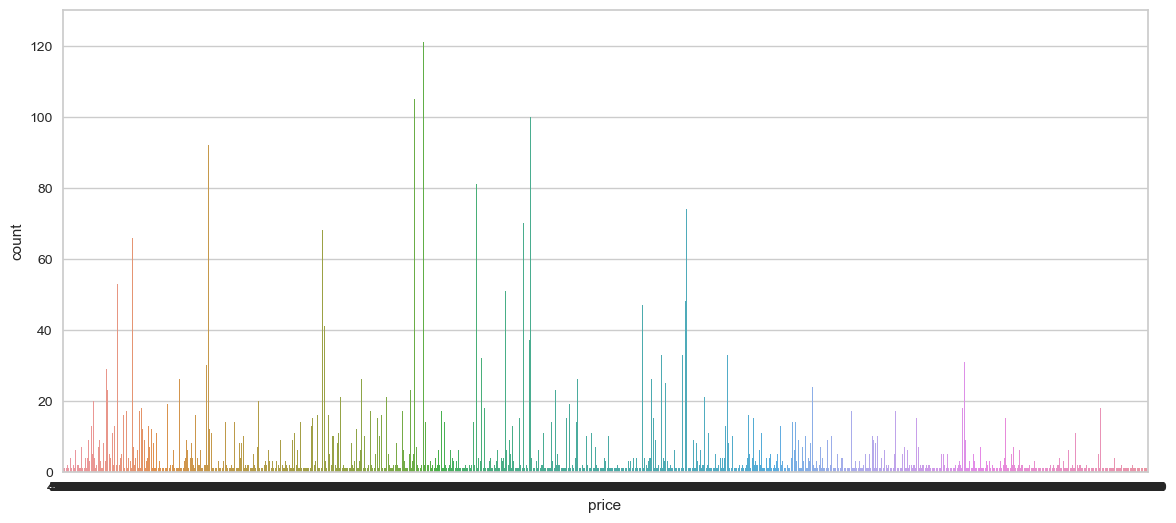

In [23]:
#Seeing the countplot of price
sns.countplot(x=df["price"])
plt.show()
#As we can see from the graph, there are a lot of values. So, it is not shown very well in this countplot

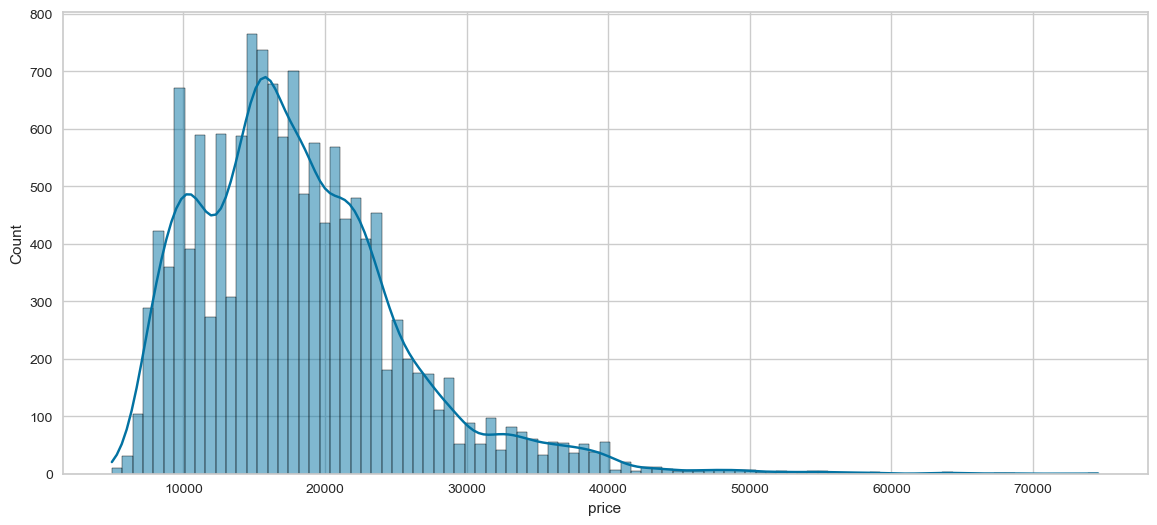

In [24]:
#Seeing the histplot of price
sns.histplot(df["price"], kde=True)
plt.show()
#As we can see, there are low values from about 40000 to 70000

### vat

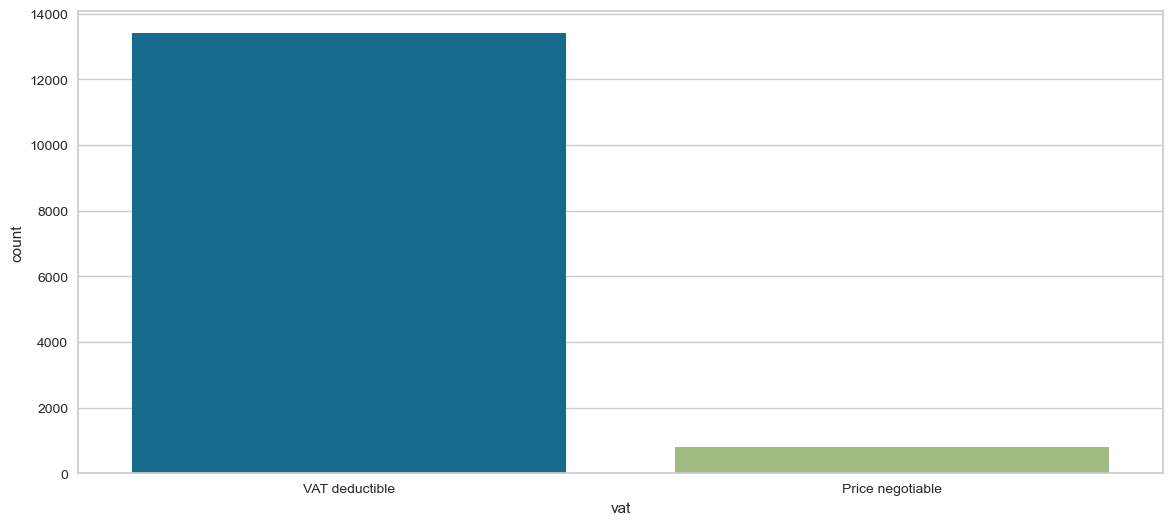

In [25]:
#Seeing the countplot of vat
sns.countplot(x=df["vat"])
plt.show()
#As we can see from the graph, there are two classes, but VAT deductible is more than Price negotiable

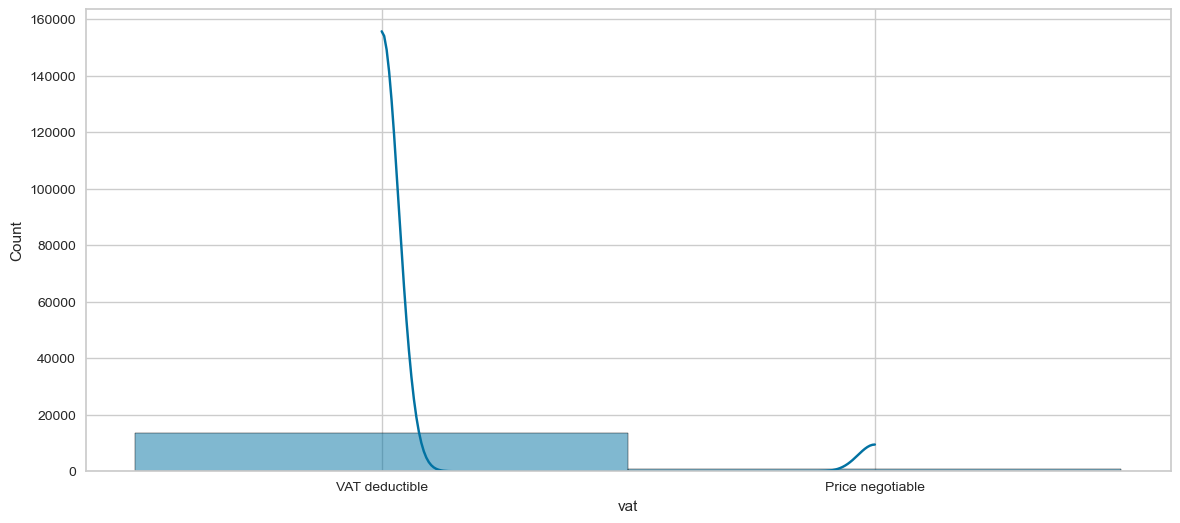

In [26]:
#Seeing the histplot of vat
sns.histplot(df["vat"], kde=True)
plt.show()

In [27]:
#Seeing the value counts of price
df.vat.value_counts()
#We can see from here that VAT deductible has about 13405 and this is more that Price negotiable

vat
VAT deductible      13405
Price negotiable      816
Name: count, dtype: int64

### km

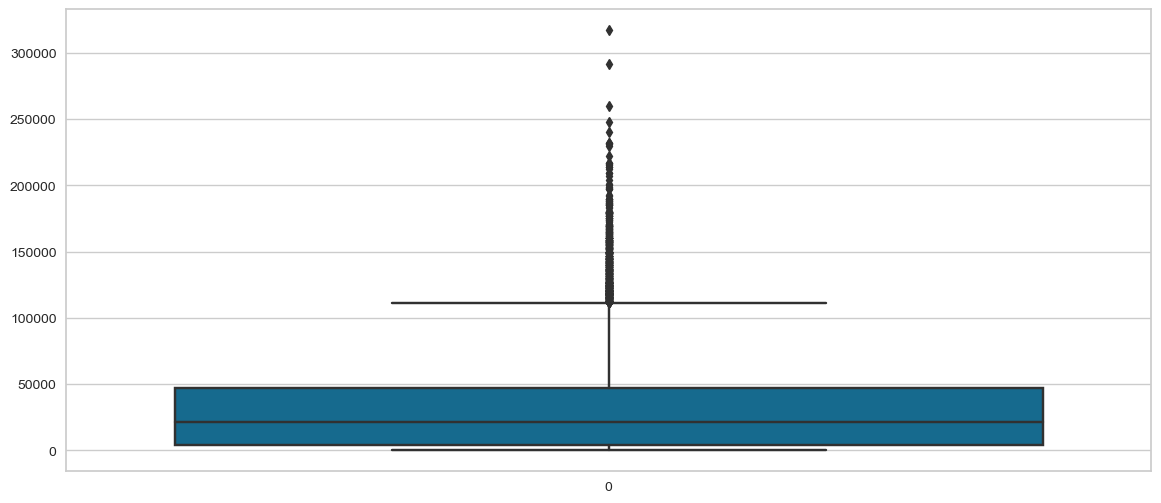

In [28]:
#SEeing teh boxplot of km
sns.boxplot(df['km'])
plt.show()
#As we can see, there are some outliers in km

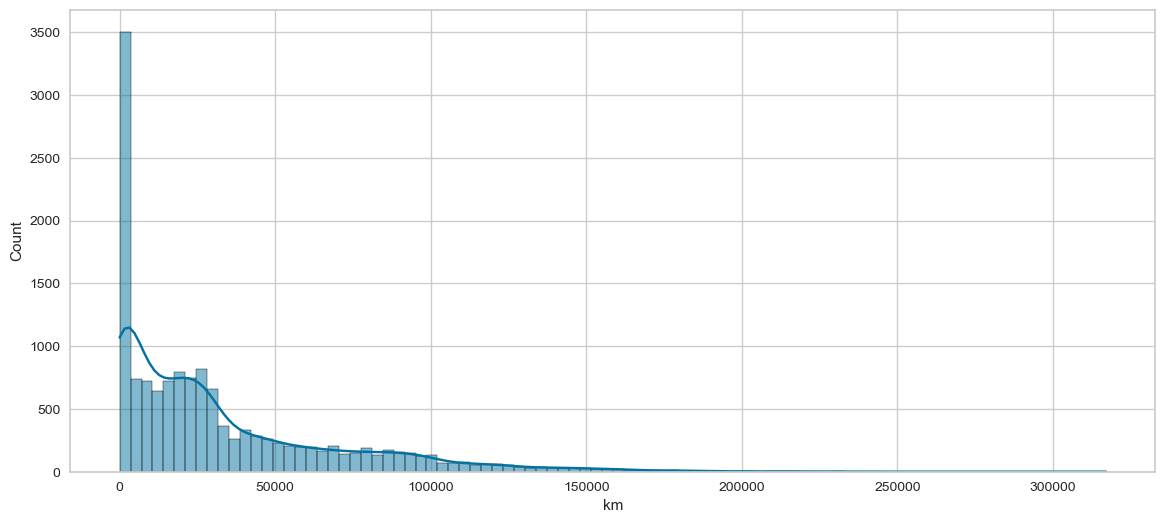

In [29]:
#Seeing the histplot of km
sns.histplot(df["km"], kde=True)
plt.show()

### Type

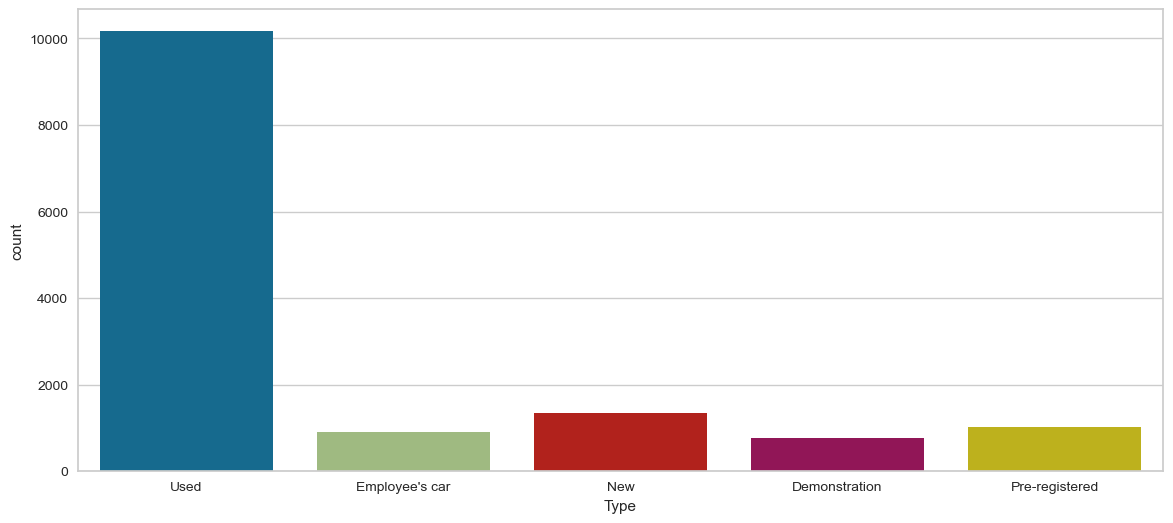

In [30]:
#Seeing the countplot of Type
sns.countplot(x=df["Type"])
plt.show()
#As we can see from the graph, there are 5 classes, and Used has the highest value comapred with the others

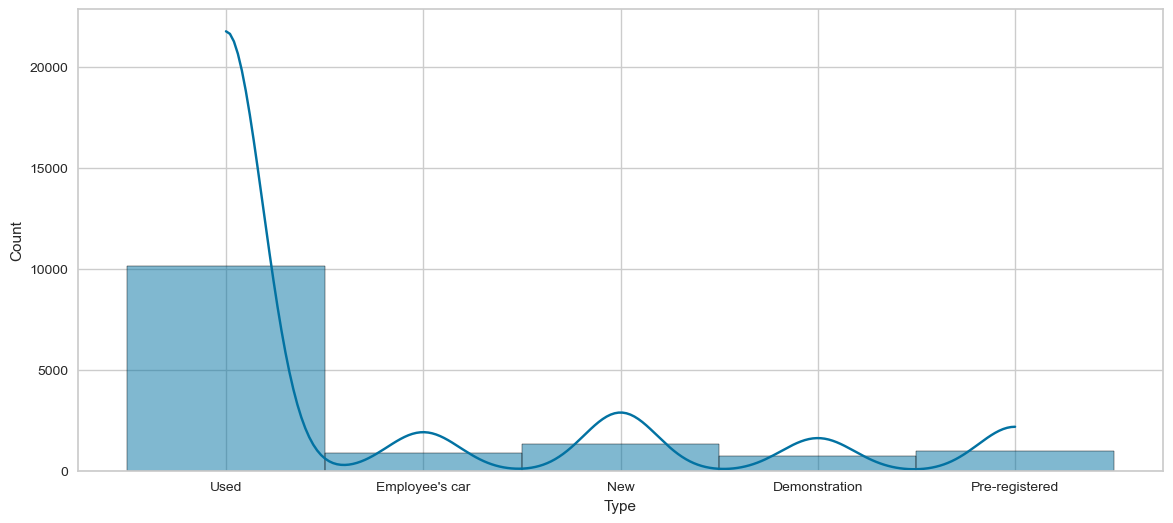

In [31]:
#Seeing the histplot of Type
sns.histplot(df["Type"], kde=True)
plt.show()

### Fuel

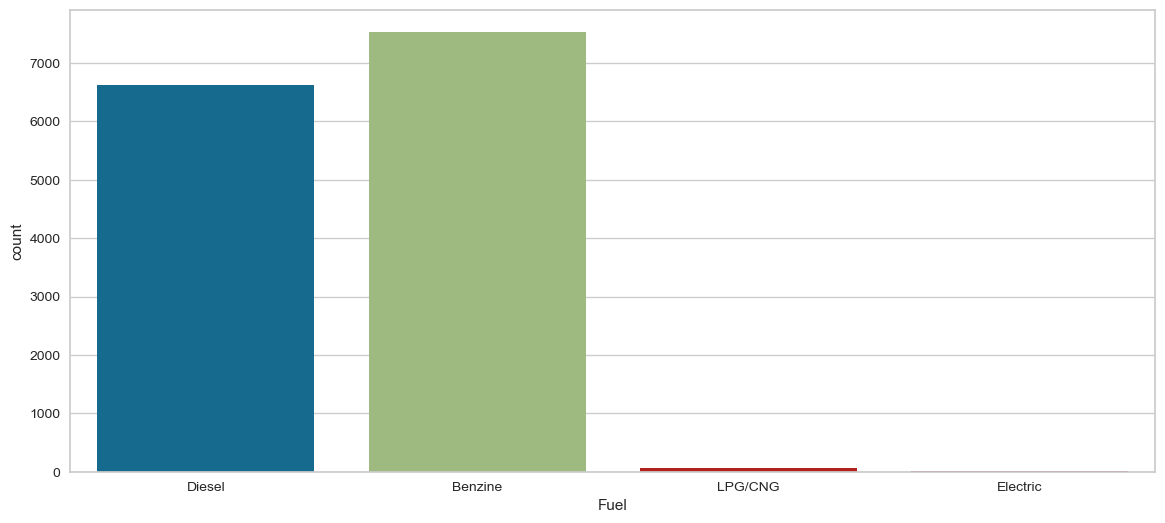

In [32]:
#Seeing the countplot of Fuel
sns.countplot(x=df["Fuel"])
plt.show()
#As we can see from the graph, there are 4 classes, the most used ones are Diesel and Benzine

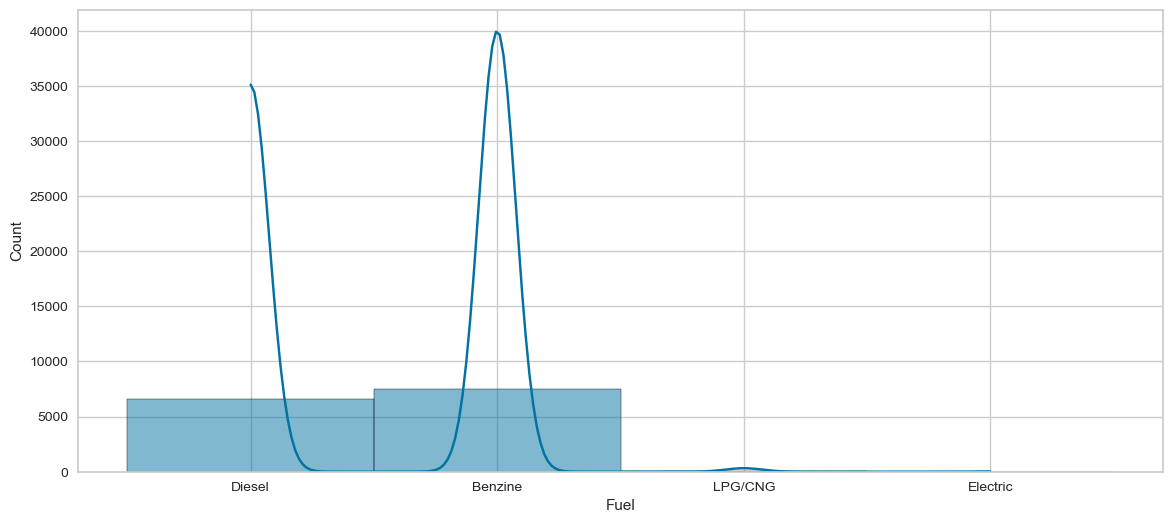

In [33]:
#Seeing the histplot of Fuel
sns.histplot(df["Fuel"], kde=True)
plt.show()

### Gears

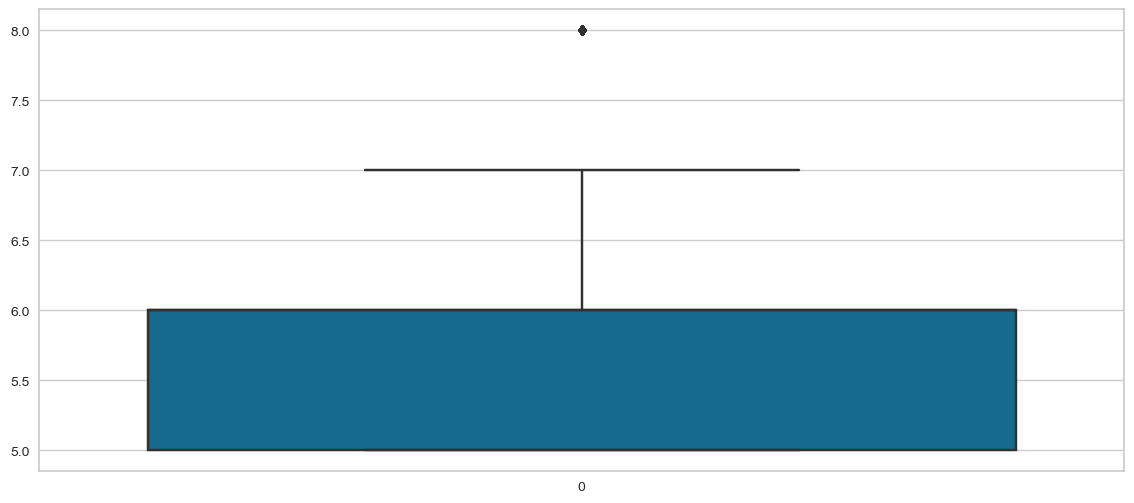

In [34]:
#SEeing teh boxplot of Gears
sns.boxplot(df['Gears'])
plt.show()
#As we can see, there are some outliers in Gears

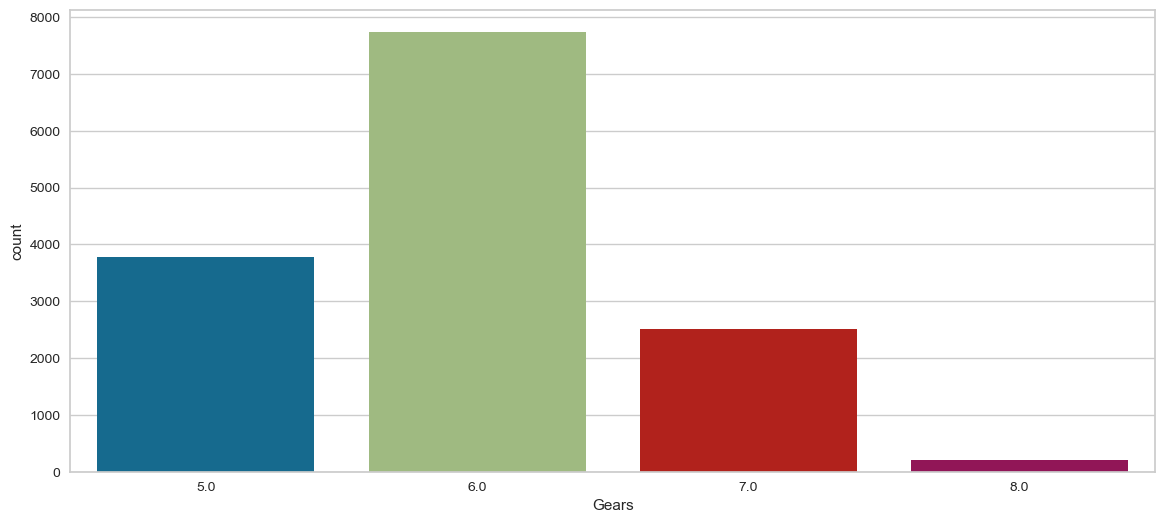

In [35]:
#Seeing the countplot of Gears
sns.countplot(x=df["Gears"])
plt.show()
#As we can see from the graph, there are 4 classes, the most used ones is 6.0, but 8.0 is not used so much

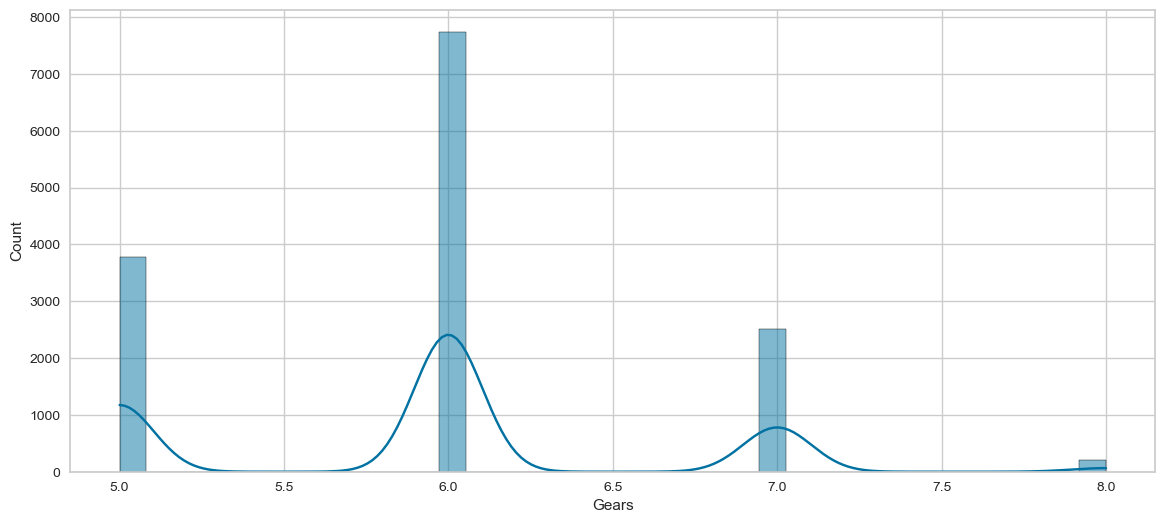

In [36]:
#Seeing the histplot of Gears
sns.histplot(df["Gears"], kde=True)
plt.show()

### Comfort_Convenience 

In [37]:
#Seeing the Comfort_Convenience
df["Comfort_Convenience"]
#As we can see, this is not good for plotting, so i am not going to plot this one

0        Air conditioning,Armrest,Automatic climate con...
1        Air conditioning,Automatic climate control,Hil...
2        Air conditioning,Cruise control,Electrical sid...
3        Air suspension,Armrest,Auxiliary heating,Elect...
4        Air conditioning,Armrest,Automatic climate con...
                               ...                        
14216    Air conditioning,Armrest,Automatic climate con...
14217    Air conditioning,Automatic climate control,Cru...
14218    Air conditioning,Armrest,Automatic climate con...
14219    Air conditioning,Automatic climate control,Cru...
14220    Air conditioning,Armrest,Automatic climate con...
Name: Comfort_Convenience, Length: 14221, dtype: object

### Entertainment_Media

In [38]:
#Seeing Entertainment_Media
df["Entertainment_Media"]
#As we can see, this is not good for plotting, so i am not going to plot this one

0        Bluetooth,Hands-free equipment,On-board comput...
1        Bluetooth,Hands-free equipment,On-board comput...
2                                    MP3,On-board computer
3        Bluetooth,CD player,Hands-free equipment,MP3,O...
4        Bluetooth,CD player,Hands-free equipment,MP3,O...
                               ...                        
14216    Bluetooth,Digital radio,Hands-free equipment,O...
14217    Bluetooth,Digital radio,Hands-free equipment,O...
14218    Bluetooth,Digital radio,Hands-free equipment,M...
14219    Bluetooth,Digital radio,Hands-free equipment,R...
14220    Bluetooth,Hands-free equipment,On-board comput...
Name: Entertainment_Media, Length: 14221, dtype: object

###  Extras

In [39]:
#Seeing Extras
df["Extras"]
#As we can see, this is not good for plotting, so i am not going to plot this one

0           Alloy wheels,Catalytic Converter,Voice Control
1        Alloy wheels,Sport seats,Sport suspension,Voic...
2                               Alloy wheels,Voice Control
3                   Alloy wheels,Sport seats,Voice Control
4        Alloy wheels,Sport package,Sport suspension,Vo...
                               ...                        
14216              Alloy wheels,Touch screen,Voice Control
14217                            Alloy wheels,Touch screen
14218    Alloy wheels,Catalytic Converter,Sport suspens...
14219              Alloy wheels,Touch screen,Voice Control
14220                                         Alloy wheels
Name: Extras, Length: 14221, dtype: object

### Safety_Security 

In [40]:
#Seeing Safety_Security
df["Safety_Security"]
#As we can see, this is not good for plotting, so i am not going to plot this one

0        ABS,Central door lock,Daytime running lights,D...
1        ABS,Central door lock,Central door lock with r...
2        ABS,Central door lock,Daytime running lights,D...
3        ABS,Alarm system,Central door lock with remote...
4        ABS,Central door lock,Driver-side airbag,Elect...
                               ...                        
14216    ABS,Adaptive Cruise Control,Central door lock,...
14217    ABS,Central door lock,Central door lock with r...
14218    ABS,Adaptive Cruise Control,Blind spot monitor...
14219    ABS,Adaptive Cruise Control,Blind spot monitor...
14220    ABS,Adaptive Cruise Control,Blind spot monitor...
Name: Safety_Security, Length: 14221, dtype: object

### age 

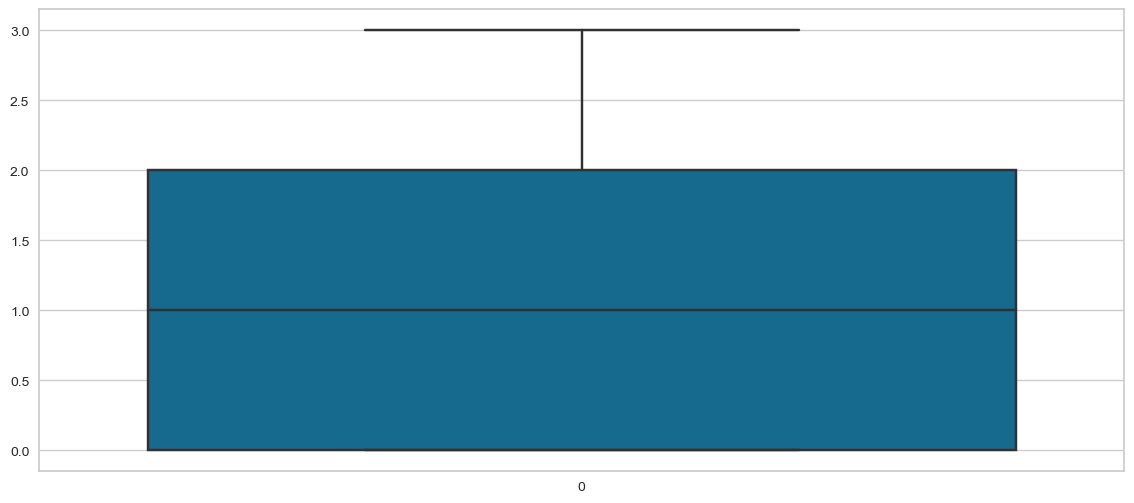

In [41]:
#Seeing teh boxplot of age
sns.boxplot(df['age'])
plt.show()
#As we can see, there is no outliers

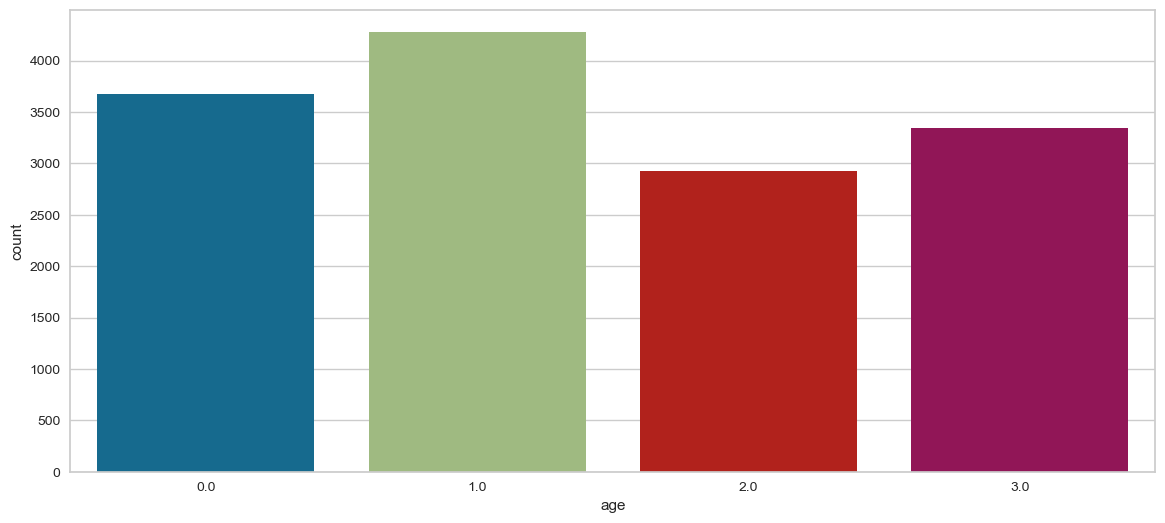

In [42]:
#Seeing the countplot of age
sns.countplot(x=df["age"])
plt.show()
#As we can see from the graph, there are 4 classes and class one is the highest

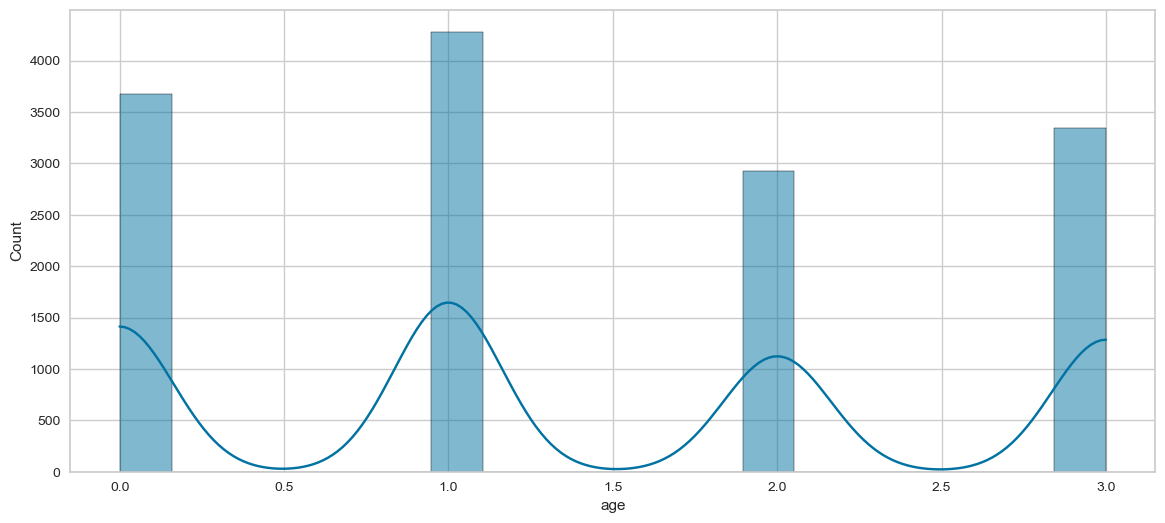

In [43]:
#Seeing the histplot of age
sns.histplot(df["age"], kde=True)
plt.show()

### Previous_Owners 

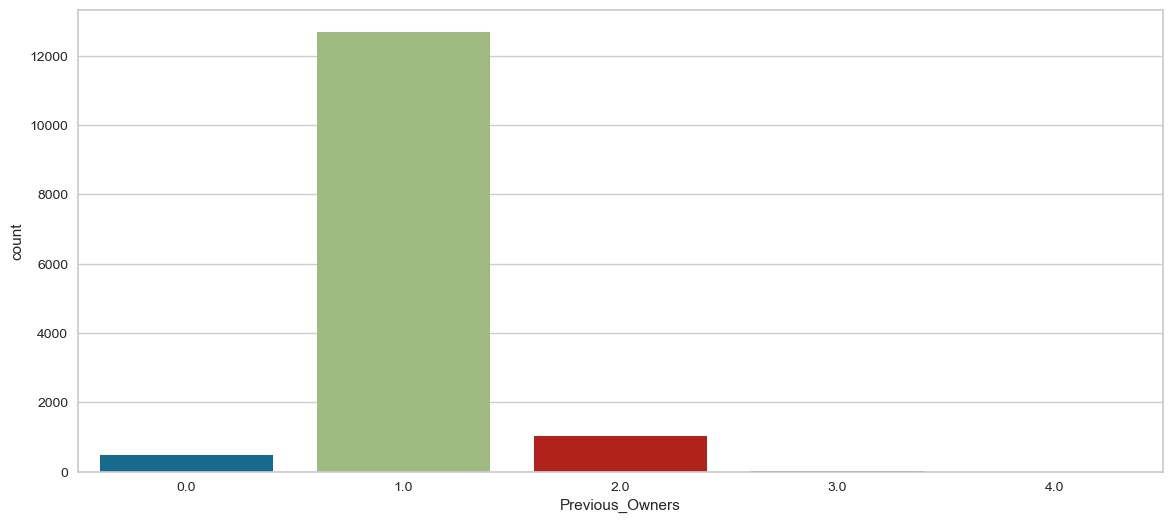

In [44]:
#Seeing the countplot of Previous_Owners
sns.countplot(x=df["Previous_Owners"])
plt.show()
#As we can see from the graph, there are 5 classes, class 1 is the highest compared with the tiny values of the others

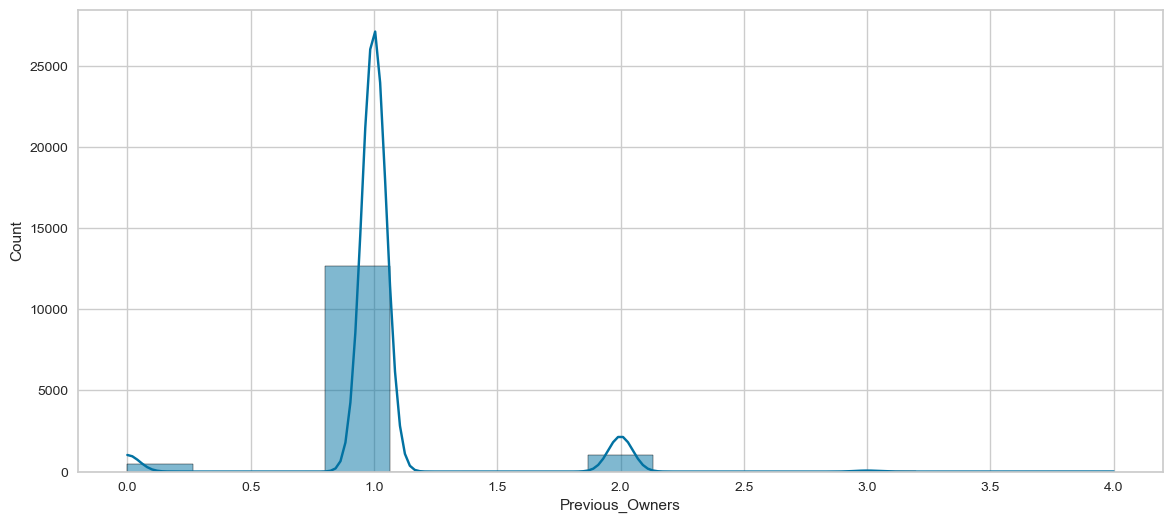

In [45]:
#Seeing the histplot of Previous_Owners
sns.histplot(df["Previous_Owners"], kde=True)
plt.show()

### hp_kW 

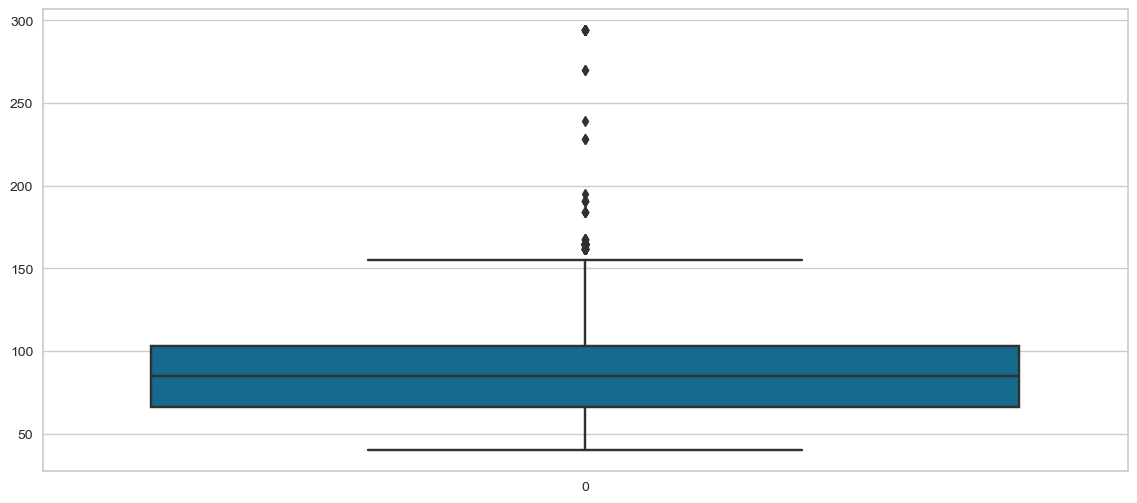

In [46]:
#SEeing teh boxplot of hp_kW
sns.boxplot(df['hp_kW'])
plt.show()
#As we can see, there are some outliers in hp_kW

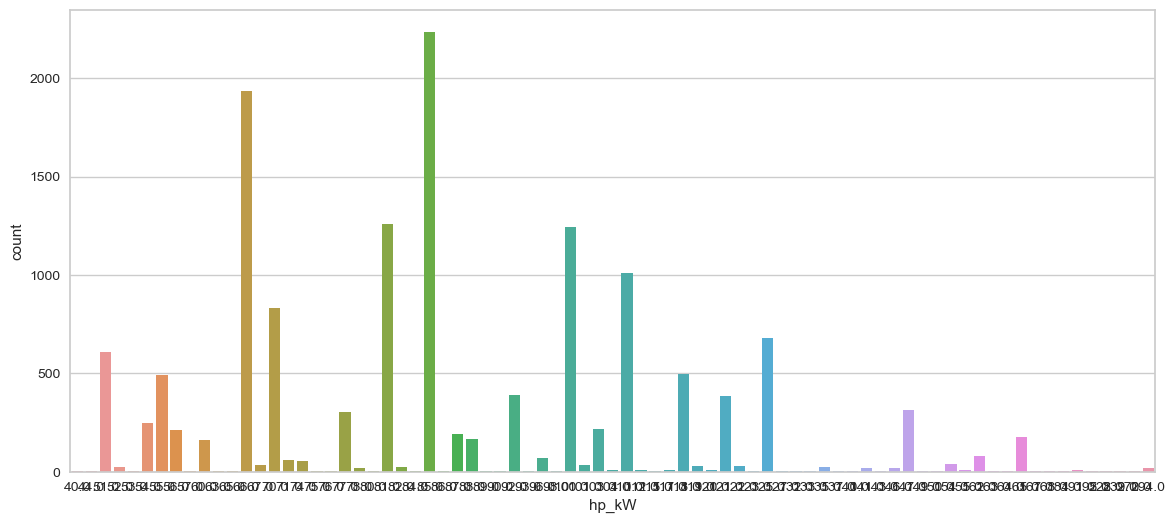

In [47]:
#Seeing the countplot of hp_kW
sns.countplot(x=df["hp_kW"])
plt.show()

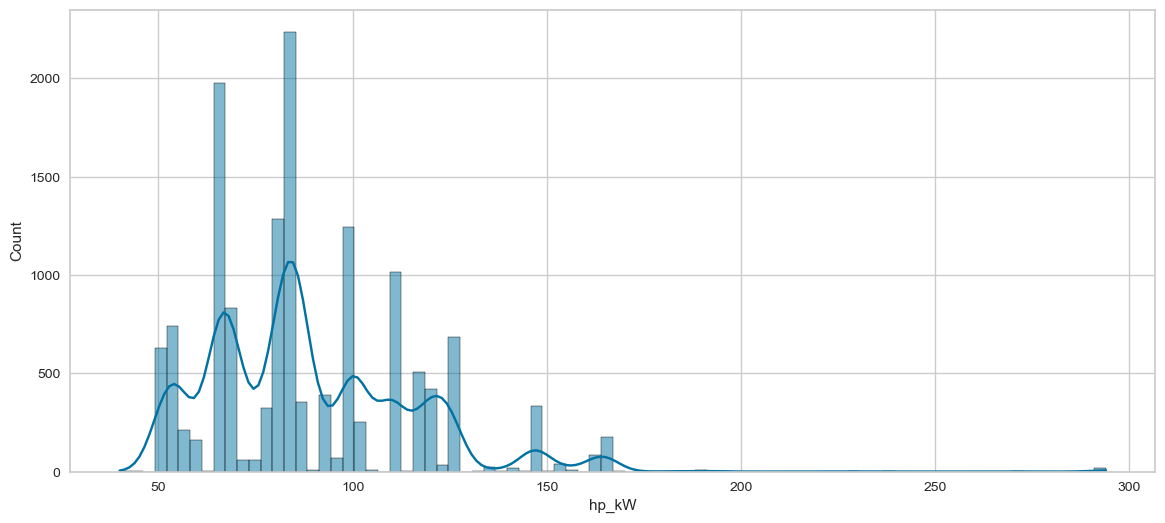

In [48]:
#Seeing the histplot of hp_kW
sns.histplot(df["hp_kW"], kde=True)
plt.show()

### Inspection_new 
       

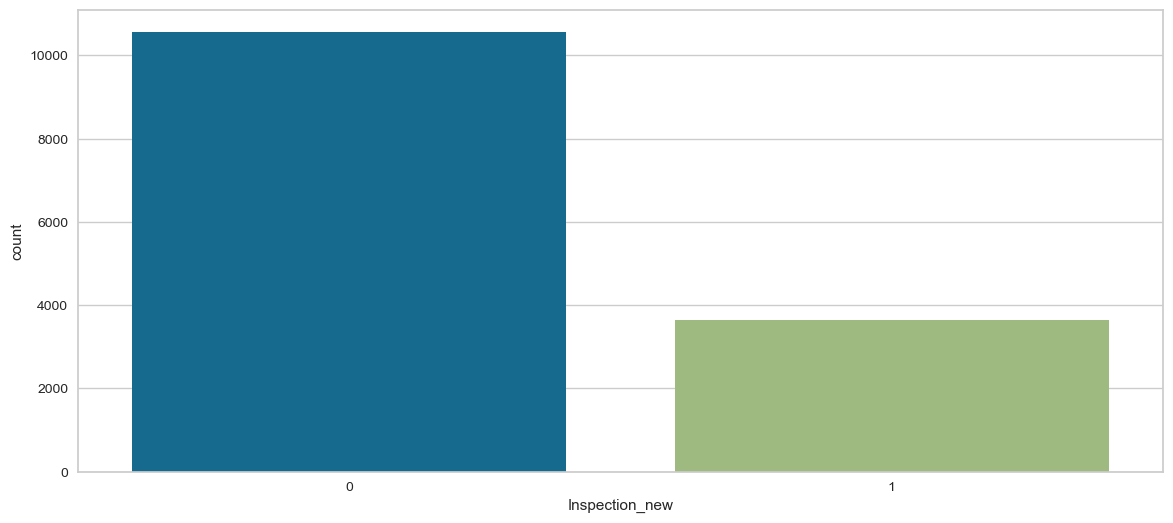

In [49]:
#Seeing the countplot of Inspection_new
sns.countplot(x=df["Inspection_new"])
plt.show()
#As we can see from the graph, there are 2 classes, class 0 is the highest compared to class 1

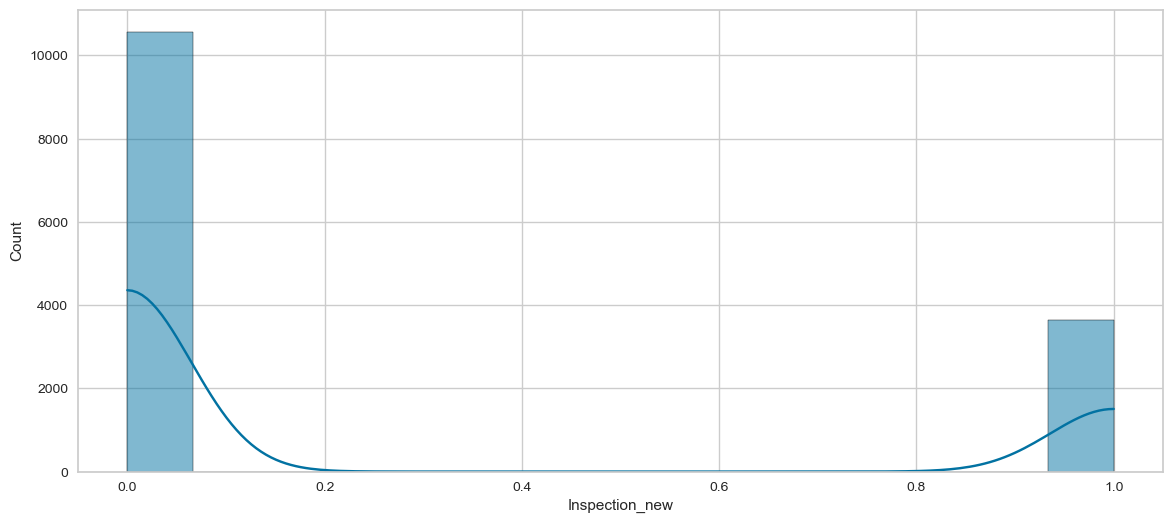

In [50]:
#Seeing the histplot of Inspection_new
sns.histplot(df["Inspection_new"], kde=True)
plt.show()

### Paint_Type 

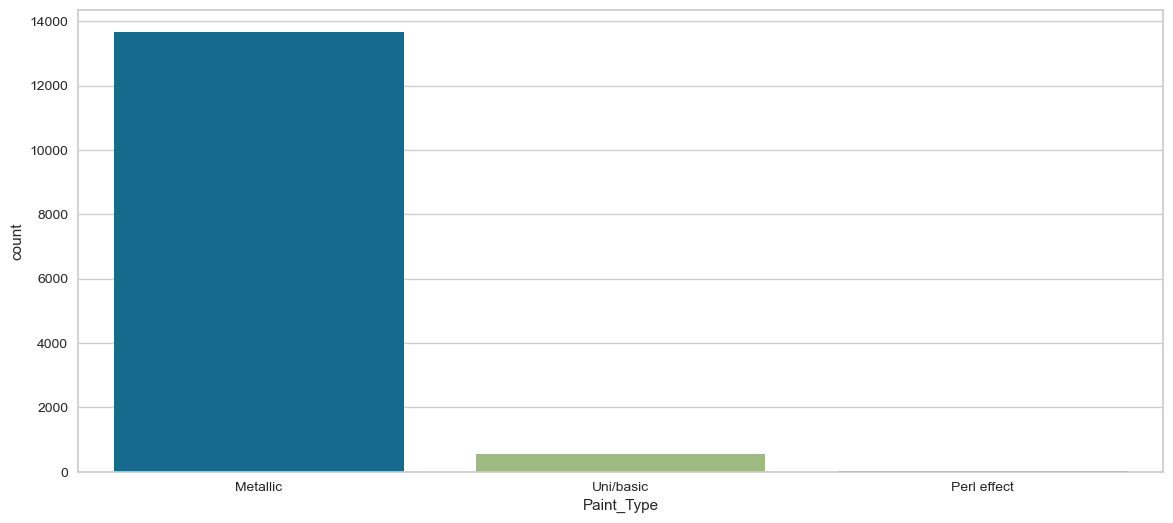

In [51]:
#Seeing the countplot of Paint_Type
sns.countplot(x=df["Paint_Type"])
plt.show()
#As we can see from the graph, there are 3 classes, Metalic has a lot of values but the others have so small values

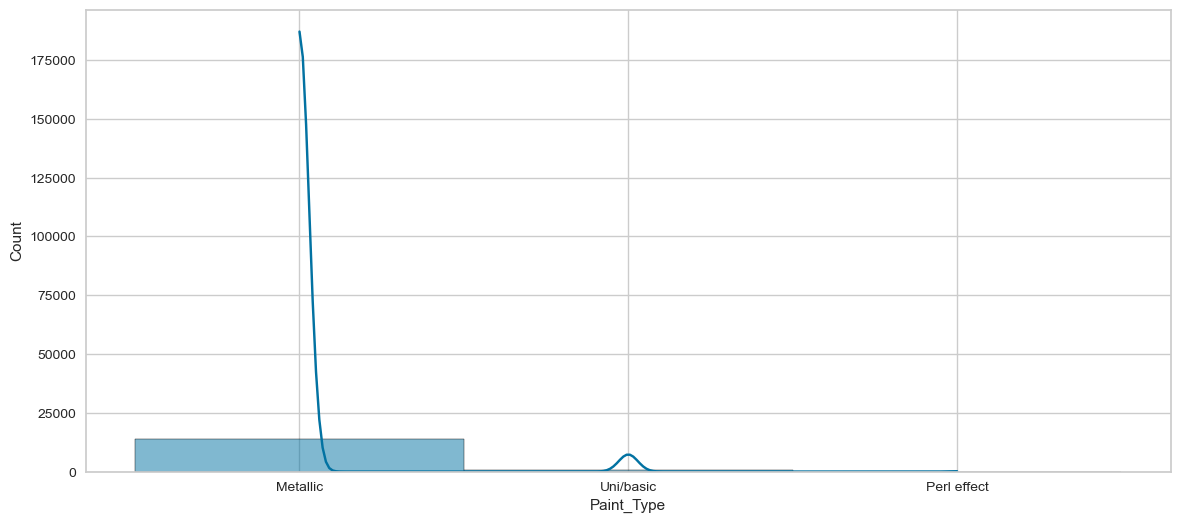

In [52]:
#Seeing the histplot of Paint_Type
sns.histplot(df["Paint_Type"], kde=True)
plt.show()

### Upholstery_type 

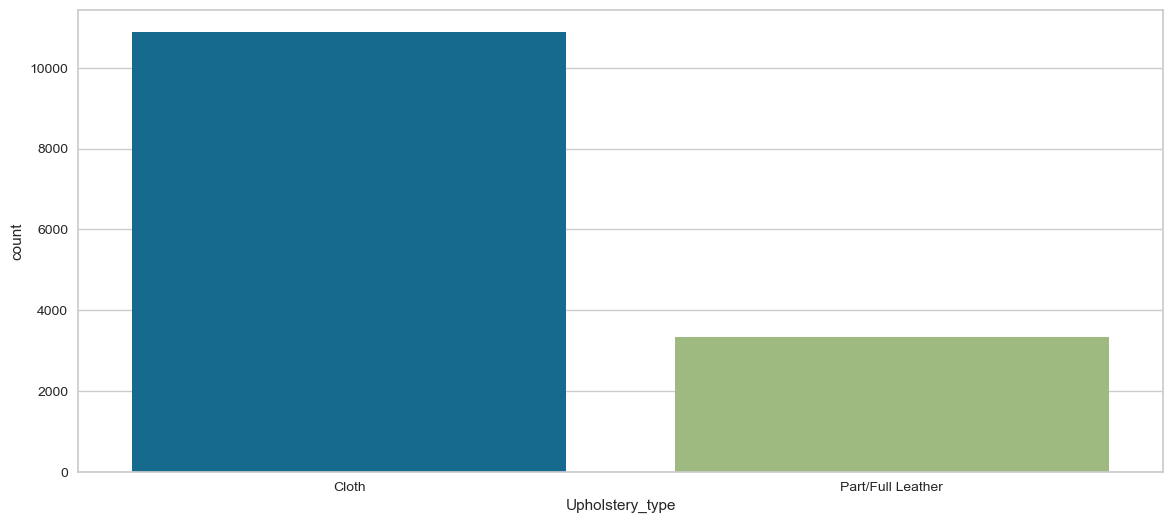

In [53]:
#Seeing the countplot of Upholstery_type
sns.countplot(x=df["Upholstery_type"])
plt.show()
#As we can see from the graph, there are 2 classes, Cloth has a lot of values. which means most of the cars have it

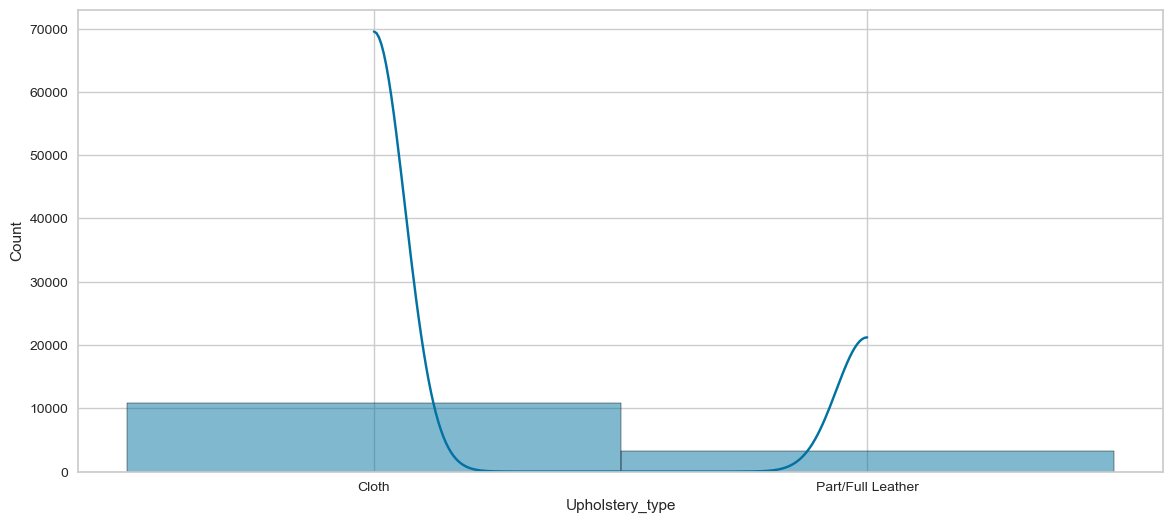

In [54]:
#Seeing the histplot of Upholstery_type
sns.histplot(df["Upholstery_type"], kde=True)
plt.show()

### Gearing_Type 

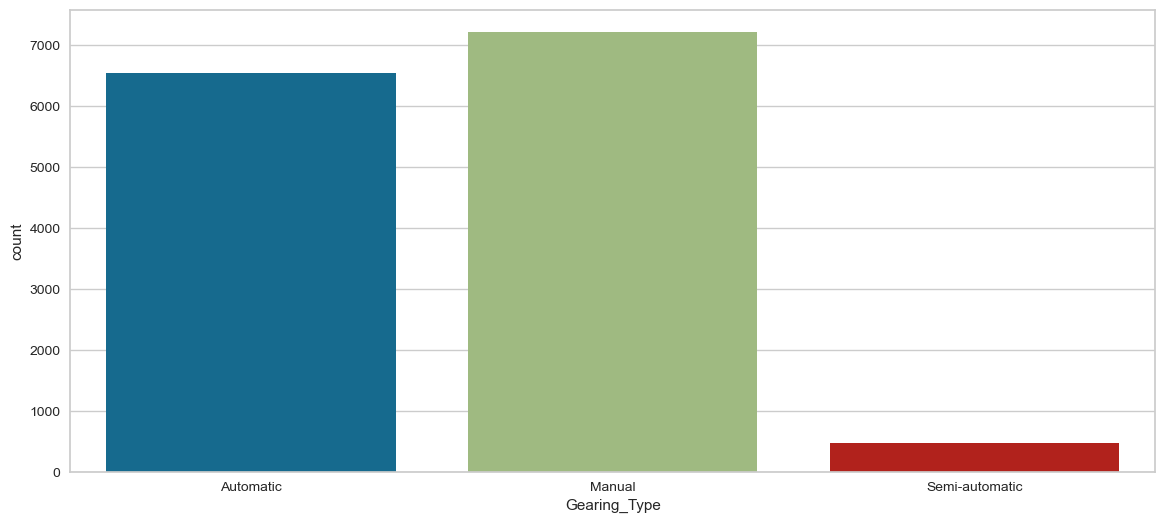

In [55]:
#Seeing the countplot of Gearing_Type
sns.countplot(x=df["Gearing_Type"])
plt.show()
#As we can see from the graph, there are 3 classes, Semi-automatic does not have a lot of values compared with the others

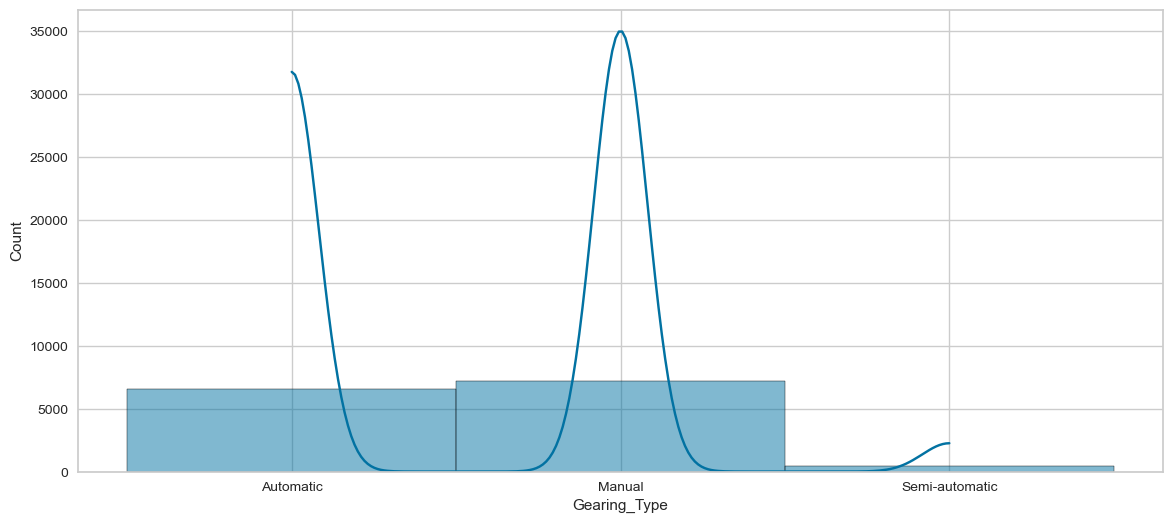

In [56]:
#Seeing the histplot of Gearing_Type
sns.histplot(df["Gearing_Type"], kde=True)
plt.show()

### Displacement_cc
      

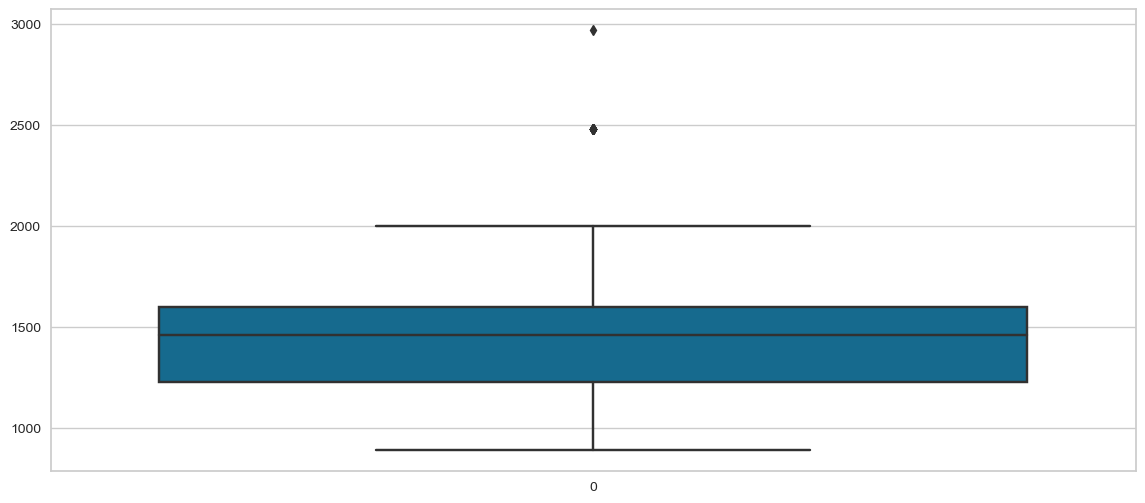

In [57]:
#SEeing teh boxplot of Displacement_cc
sns.boxplot(df['Displacement_cc'])
plt.show()
#As we can see, there are some outliers in Displacement_cc

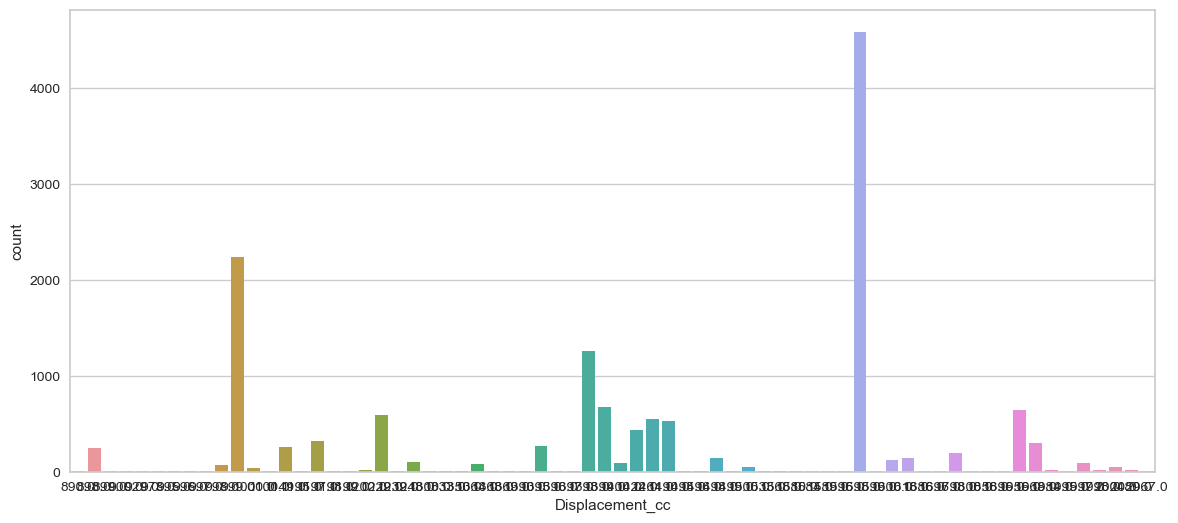

In [58]:
#Seeing the countplot of Displacement_cc
sns.countplot(x=df["Displacement_cc"])
plt.show()

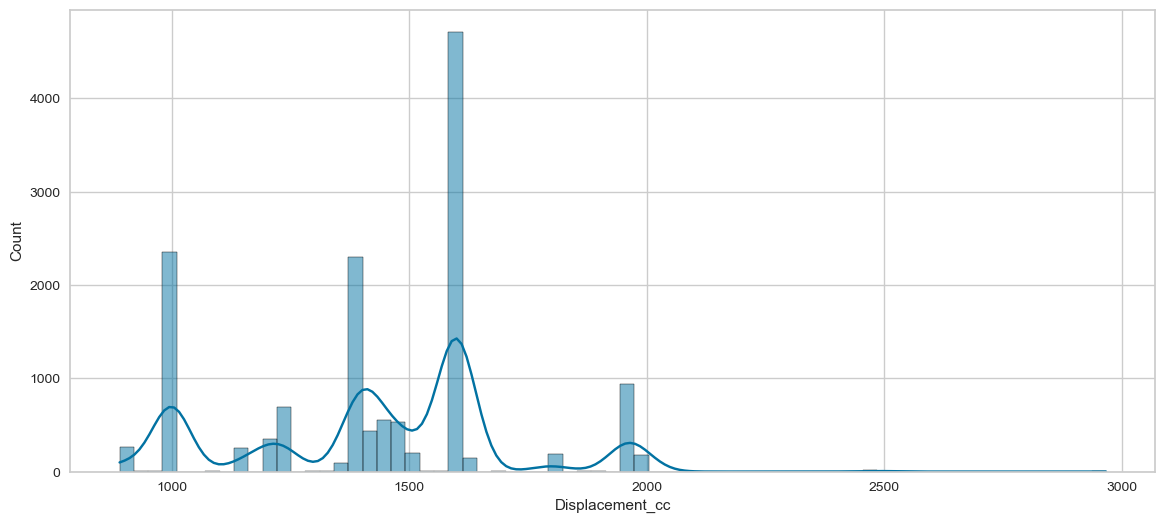

In [59]:
#Seeing the histplot of Displacement_cc
sns.histplot(df["Displacement_cc"], kde=True)
plt.show()

###  Weight_kg 

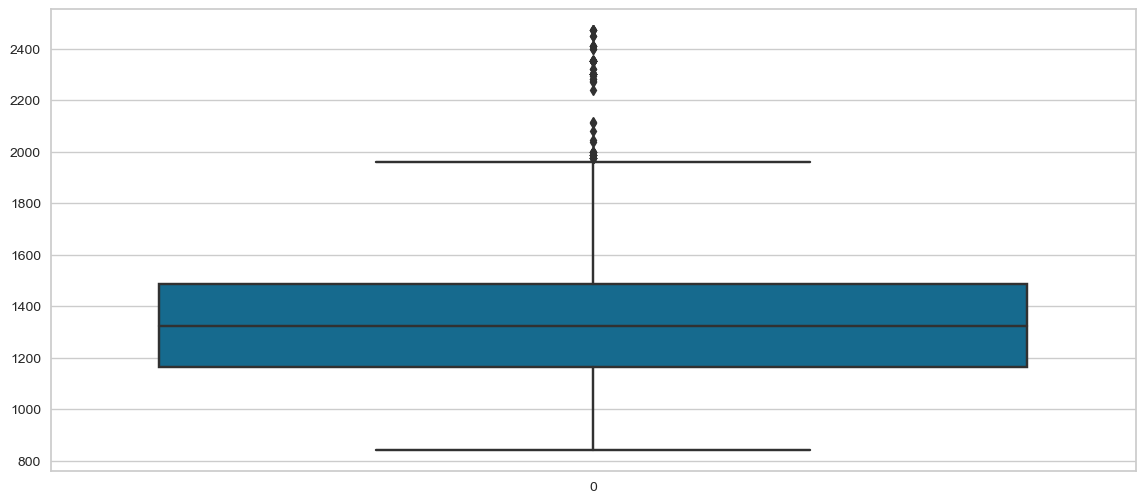

In [60]:
#SEeing teh boxplot of Weight_kg
sns.boxplot(df['Weight_kg'])
plt.show()
#As we can see, there are some outliers in Weight_kg

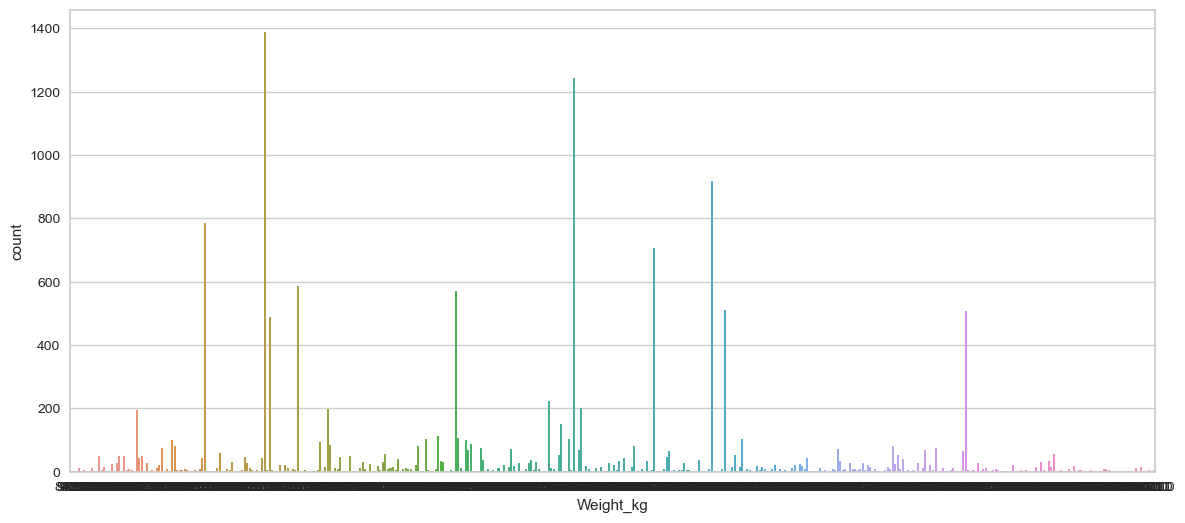

In [61]:
#Seeing the countplot of Weight_kg
sns.countplot(x=df["Weight_kg"])
plt.show()

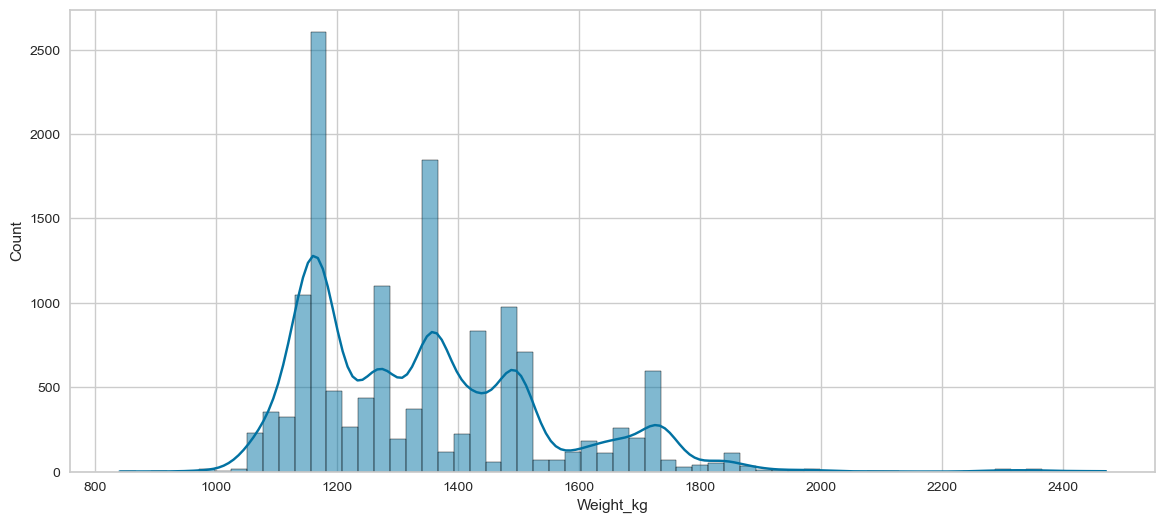

In [62]:
#Seeing the histplot of Weight_kg
sns.histplot(df["Weight_kg"], kde=True)
plt.show()
#As we can see, most of the values are located between 1000 and 1700

### Drive_chain 

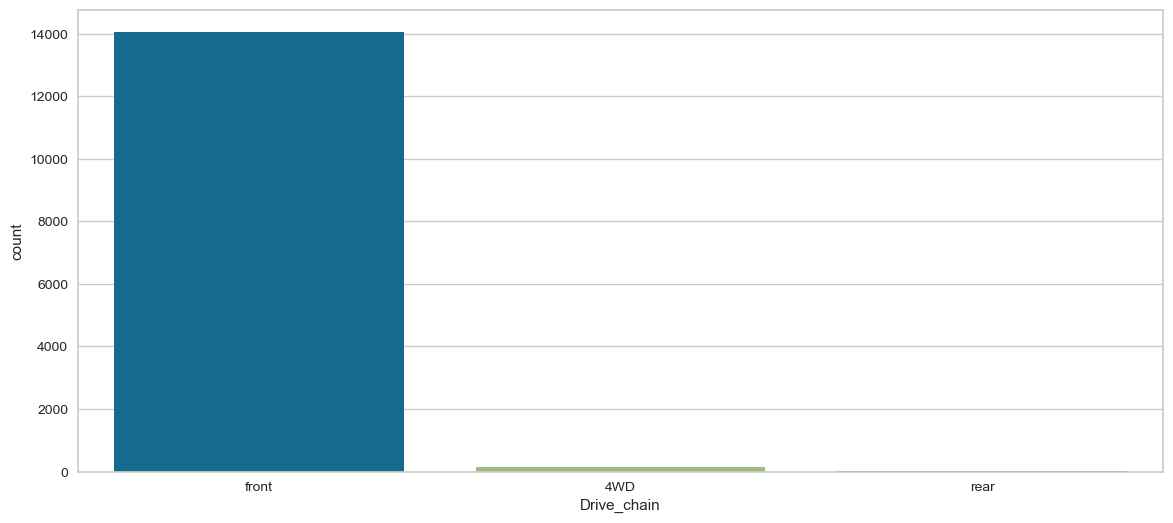

In [63]:
#Seeing the countplot of Drive_chain
sns.countplot(x=df["Drive_chain"])
plt.show()
#As we can see from the graph, there are 3 classes, front has a lot of values, but the others have only tiny values

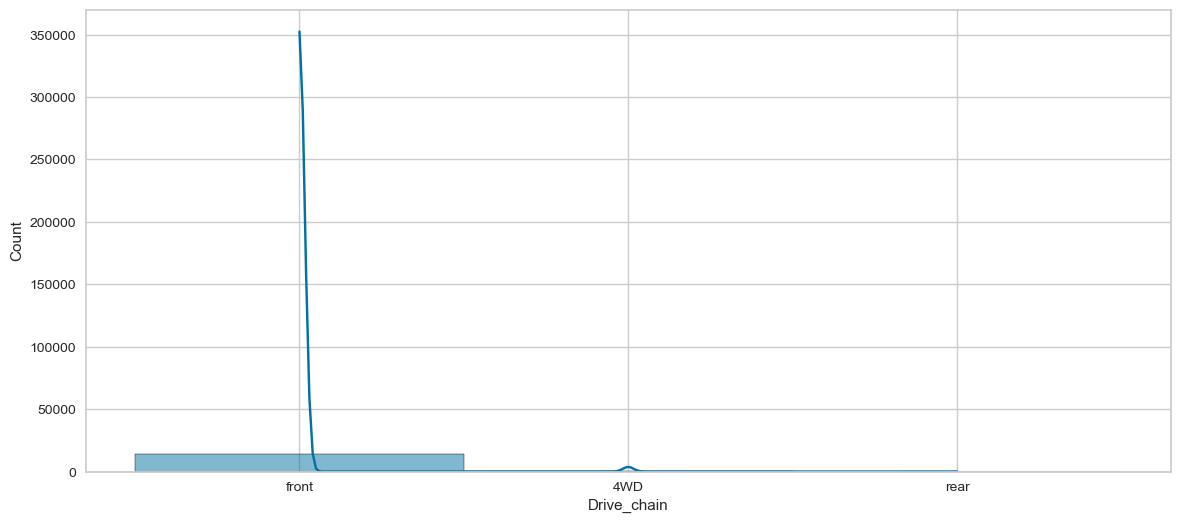

In [64]:
#Seeing the histplot of Drive_chain
sns.histplot(df["Drive_chain"], kde=True)
plt.show()

### cons_comb

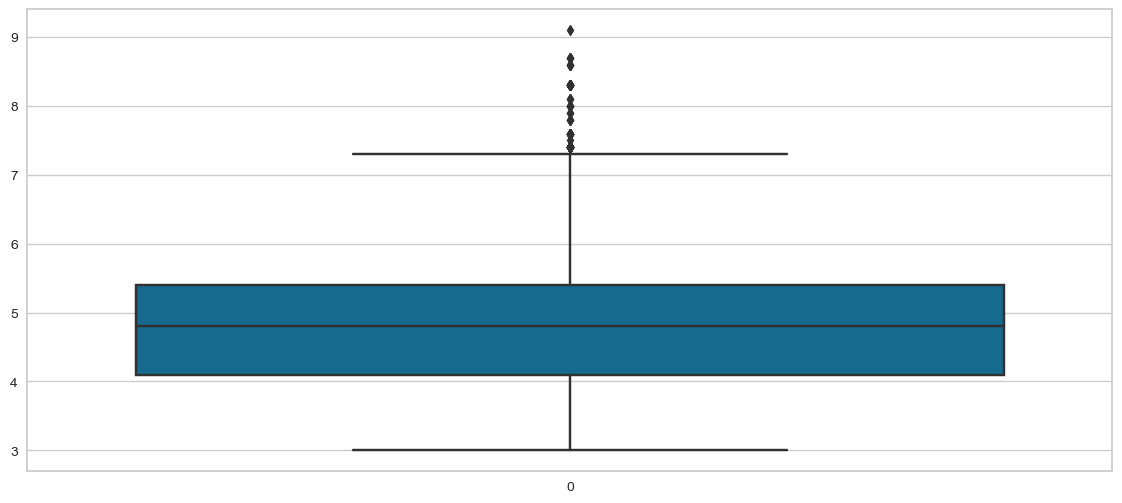

In [65]:
#SEeing teh boxplot of cons_comb
sns.boxplot(df['cons_comb'])
plt.show()
#As we can see, there are some outliers in cons_comb

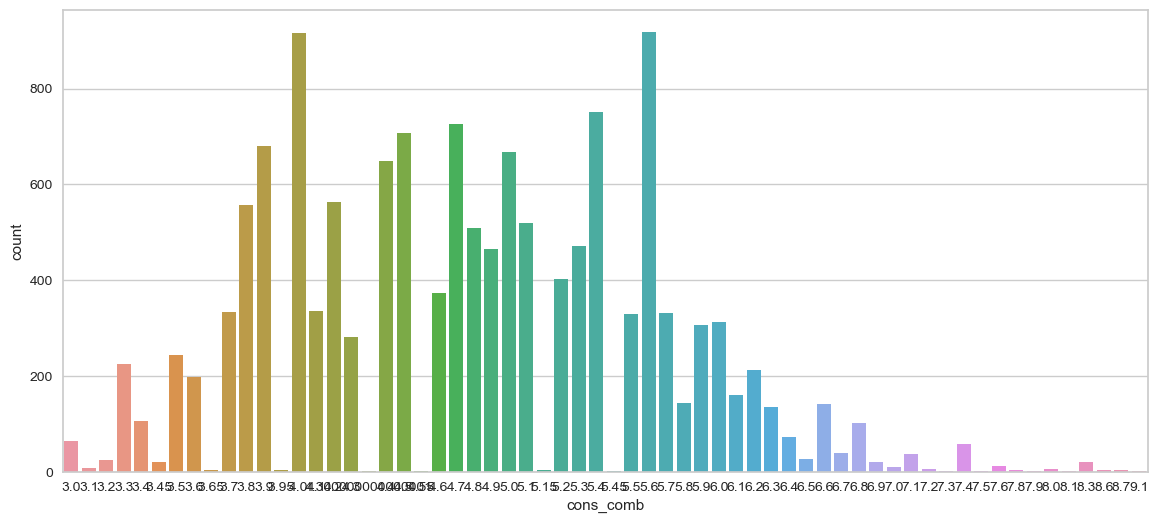

In [66]:
#Seeing the countplot of cons_comb
sns.countplot(x=df["cons_comb"])
plt.show()

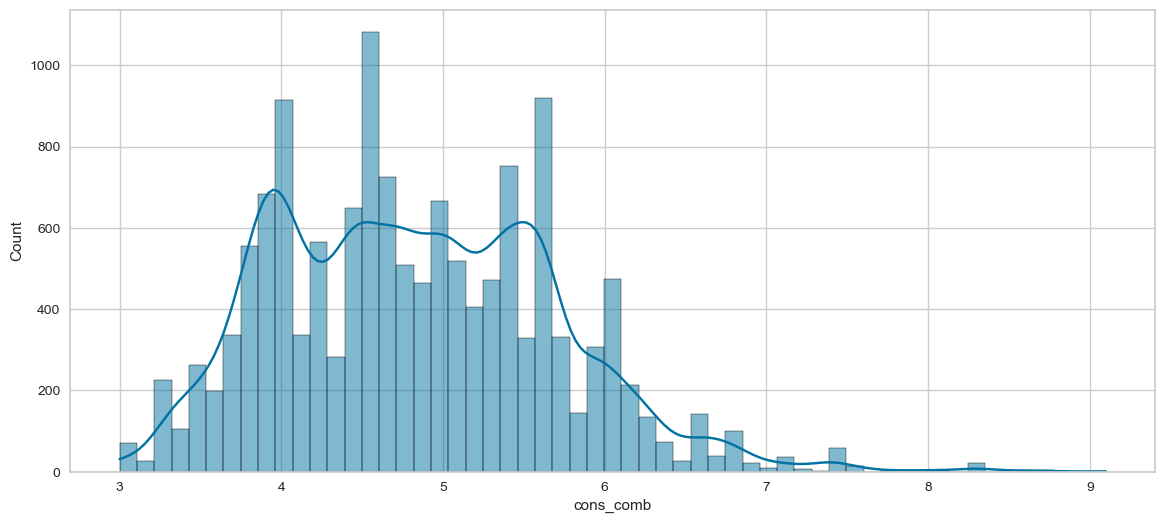

In [67]:
#Seeing the histplot of cons_comb
sns.histplot(df["cons_comb"], kde=True)
plt.show()

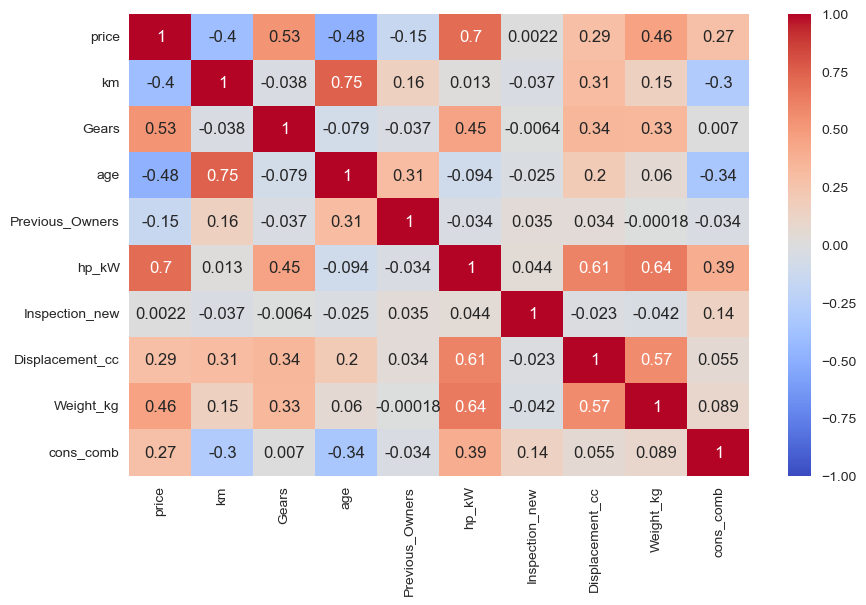

In [68]:
#Seeing the correlation 
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot =True, cmap="coolwarm");
#As we can see, there is not correlation here

In [69]:
#Seeing the multicollinearity
df.corr(numeric_only=True)[(abs(df.corr(numeric_only=True))>= 0.9) & (abs(df.corr(numeric_only=True)) < 1)].any().any()
#As we can see, we do not have multicollinearity

False

## Feature Engineering

In [70]:
#Seeing the head of the data 
df.head()
#Well, from the EDA, i can not see vat as a important feature, so i am going to drop it. The reason for this is that 
#this may affect our target which is the price, so in my opinio, dropping it is better

make_model body_type  price               vat        km  Type     Fuel  \
0    Audi A1    Sedans  15770    VAT deductible 56013.000  Used   Diesel   
1    Audi A1    Sedans  14500  Price negotiable 80000.000  Used  Benzine   
2    Audi A1    Sedans  14640    VAT deductible 83450.000  Used   Diesel   
3    Audi A1    Sedans  14500    VAT deductible 73000.000  Used   Diesel   
4    Audi A1    Sedans  16790    VAT deductible 16200.000  Used   Diesel   

   Gears                                Comfort_Convenience  \
0  7.000  Air conditioning,Armrest,Automatic climate con...   
1  7.000  Air conditioning,Automatic climate control,Hil...   
2  7.000  Air conditioning,Cruise control,Electrical sid...   
3  6.000  Air suspension,Armrest,Auxiliary heating,Elect...   
4  7.000  Air conditioning,Armrest,Automatic climate con...   

                                 Entertainment_Media  \
0  Bluetooth,Hands-free equipment,On-board comput...   
1  Bluetooth,Hands-free equipment,On-board comput...   
2                              MP3,On-board computer   
3  Bluetooth,CD player,Hands-free equipment,MP3,O...   
4  Bluetooth,CD player,Hands-free equipment,MP3,O...   

                                              Extras  \
0     Alloy wheels,Catalytic Converter,Voice Control   
1  Alloy wheels,Sport seats,Sport suspension,Voic...   
2                         Alloy wheels,Voice Control   
3             Alloy wheels,Sport seats,Voice Control   
4  Alloy wheels,Sport package,Sport suspension,Vo...   

                                     Safety_Security   age  Previous_Owners  \
0  ABS,Central door lock,Daytime running lights,D... 3.000            2.000   
1  ABS,Central door lock,Central door lock with r... 2.000            1.000   
2  ABS,Central door lock,Daytime running lights,D... 3.000            1.000   
3  ABS,Alarm system,Central door lock with remote... 3.000            1.000   
4  ABS,Central door lock,Driver-side airbag,Elect... 3.000            1.000   

    hp_kW  Inspection_new Paint_Type Upholstery_type Gearing_Type  \
0  66.000               1   Metallic           Cloth    Automatic   
1 141.000               0   Metallic           Cloth    Automatic   
2  85.000               0   Metallic           Cloth    Automatic   
3  66.000               0   Metallic           Cloth    Automatic   
4  66.000               1   Metallic           Cloth    Automatic   

   Displacement_cc  Weight_kg Drive_chain  cons_comb  
0         1422.000   1220.000       front      3.800  
1         1798.000   1255.000       front      5.600  
2         1598.000   1135.000       front      3.800  
3         1422.000   1195.000       front      3.800  
4         1422.000   1135.000       front      4.100

In [71]:
#Dropping vat from the dataset
df.drop(columns=["vat", "Displacement_cc"], inplace=True)

In [72]:
#Seeing the head of the dataset after dropping vat
df.head()
#As we can see, we do not have vat column now

make_model body_type  price        km  Type     Fuel  Gears  \
0    Audi A1    Sedans  15770 56013.000  Used   Diesel  7.000   
1    Audi A1    Sedans  14500 80000.000  Used  Benzine  7.000   
2    Audi A1    Sedans  14640 83450.000  Used   Diesel  7.000   
3    Audi A1    Sedans  14500 73000.000  Used   Diesel  6.000   
4    Audi A1    Sedans  16790 16200.000  Used   Diesel  7.000   

                                 Comfort_Convenience  \
0  Air conditioning,Armrest,Automatic climate con...   
1  Air conditioning,Automatic climate control,Hil...   
2  Air conditioning,Cruise control,Electrical sid...   
3  Air suspension,Armrest,Auxiliary heating,Elect...   
4  Air conditioning,Armrest,Automatic climate con...   

                                 Entertainment_Media  \
0  Bluetooth,Hands-free equipment,On-board comput...   
1  Bluetooth,Hands-free equipment,On-board comput...   
2                              MP3,On-board computer   
3  Bluetooth,CD player,Hands-free equipment,MP3,O...   
4  Bluetooth,CD player,Hands-free equipment,MP3,O...   

                                              Extras  \
0     Alloy wheels,Catalytic Converter,Voice Control   
1  Alloy wheels,Sport seats,Sport suspension,Voic...   
2                         Alloy wheels,Voice Control   
3             Alloy wheels,Sport seats,Voice Control   
4  Alloy wheels,Sport package,Sport suspension,Vo...   

                                     Safety_Security   age  Previous_Owners  \
0  ABS,Central door lock,Daytime running lights,D... 3.000            2.000   
1  ABS,Central door lock,Central door lock with r... 2.000            1.000   
2  ABS,Central door lock,Daytime running lights,D... 3.000            1.000   
3  ABS,Alarm system,Central door lock with remote... 3.000            1.000   
4  ABS,Central door lock,Driver-side airbag,Elect... 3.000            1.000   

    hp_kW  Inspection_new Paint_Type Upholstery_type Gearing_Type  Weight_kg  \
0  66.000               1   Metallic           Cloth    Automatic   1220.000   
1 141.000               0   Metallic           Cloth    Automatic   1255.000   
2  85.000               0   Metallic           Cloth    Automatic   1135.000   
3  66.000               0   Metallic           Cloth    Automatic   1195.000   
4  66.000               1   Metallic           Cloth    Automatic   1135.000   

  Drive_chain  cons_comb  
0       front      3.800  
1       front      5.600  
2       front      3.800  
3       front      3.800  
4       front      4.100

In [73]:
#Seeing the object columns in the dataset and assignt it to a variable
df_ob = df.select_dtypes(include ="object").head()
df_ob
#As we can see, there are a lot of object columns in the dataset

make_model body_type  Type     Fuel  \
0    Audi A1    Sedans  Used   Diesel   
1    Audi A1    Sedans  Used  Benzine   
2    Audi A1    Sedans  Used   Diesel   
3    Audi A1    Sedans  Used   Diesel   
4    Audi A1    Sedans  Used   Diesel   

                                 Comfort_Convenience  \
0  Air conditioning,Armrest,Automatic climate con...   
1  Air conditioning,Automatic climate control,Hil...   
2  Air conditioning,Cruise control,Electrical sid...   
3  Air suspension,Armrest,Auxiliary heating,Elect...   
4  Air conditioning,Armrest,Automatic climate con...   

                                 Entertainment_Media  \
0  Bluetooth,Hands-free equipment,On-board comput...   
1  Bluetooth,Hands-free equipment,On-board comput...   
2                              MP3,On-board computer   
3  Bluetooth,CD player,Hands-free equipment,MP3,O...   
4  Bluetooth,CD player,Hands-free equipment,MP3,O...   

                                              Extras  \
0     Alloy wheels,Catalytic Converter,Voice Control   
1  Alloy wheels,Sport seats,Sport suspension,Voic...   
2                         Alloy wheels,Voice Control   
3             Alloy wheels,Sport seats,Voice Control   
4  Alloy wheels,Sport package,Sport suspension,Vo...   

                                     Safety_Security Paint_Type  \
0  ABS,Central door lock,Daytime running lights,D...   Metallic   
1  ABS,Central door lock,Central door lock with r...   Metallic   
2  ABS,Central door lock,Daytime running lights,D...   Metallic   
3  ABS,Alarm system,Central door lock with remote...   Metallic   
4  ABS,Central door lock,Driver-side airbag,Elect...   Metallic   

  Upholstery_type Gearing_Type Drive_chain  
0           Cloth    Automatic       front  
1           Cloth    Automatic       front  
2           Cloth    Automatic       front  
3           Cloth    Automatic       front  
4           Cloth    Automatic       front

### Comfort_Convenience

In [74]:
#Seeing Comfort_Convenience 
df.Comfort_Convenience.sample(5)
#As we can see, we do have many things in it, and the best way is separite them from the comma, as there is different thing
#after each comma

9866     Air conditioning,Armrest,Automatic climate con...
13746    Cruise control,Electrically adjustable seats,L...
2243     Air conditioning,Cruise control,Multi-function...
9724     Air conditioning,Automatic climate control,Cru...
9177     Air conditioning,Cruise control,Electrically h...
Name: Comfort_Convenience, dtype: object

In [75]:
#Converting Comfort_Convenience from object to numeric
df["Comfort_Convenience"] = df.Comfort_Convenience.apply(lambda x: len(x.split(',')))

In [76]:
#Seeing Comfort_Convenience after converting
df["Comfort_Convenience"]
#As we can see, now it is numeric not object

0        16
1         9
2        13
3        16
4        13
         ..
14216    27
14217    20
14218    26
14219    23
14220    24
Name: Comfort_Convenience, Length: 14221, dtype: int64

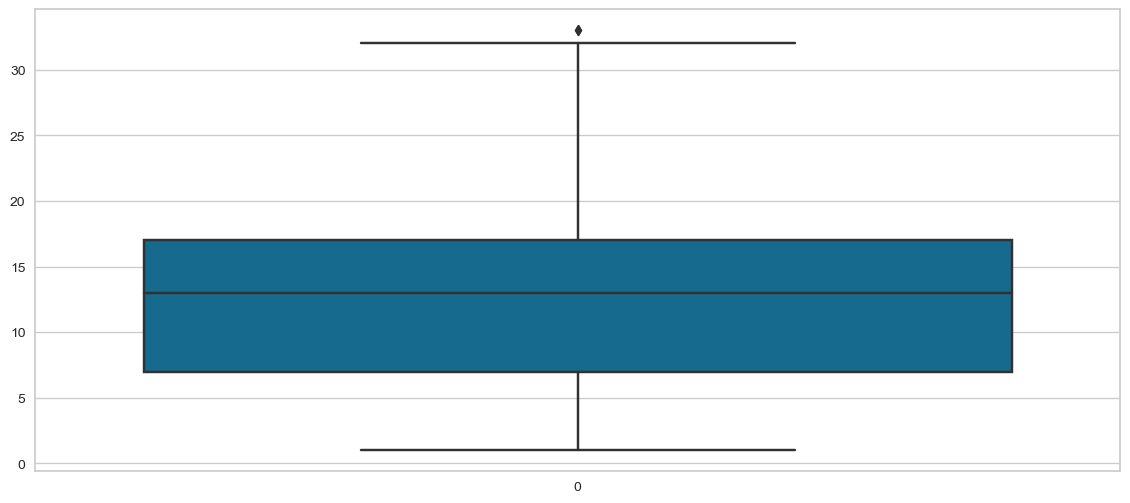

In [77]:
#SEeing teh boxplot of Comfort_Convenience
sns.boxplot(df['Comfort_Convenience'])
plt.show()
#As we can see, there are some outliers in Comfort_Convenience.

In [78]:
#Seeing the value counts of Comfort_Convenience
df.Comfort_Convenience.value_counts()

Comfort_Convenience
15    1011
17     973
14     960
16     846
13     787
4      778
11     731
6      714
12     690
10     676
7      650
5      621
18     578
8      566
3      552
9      495
19     436
21     389
20     366
23     301
22     291
2      230
1      168
24     126
25     105
26      80
27      44
28      31
29      14
31       4
30       4
32       2
33       2
Name: count, dtype: int64

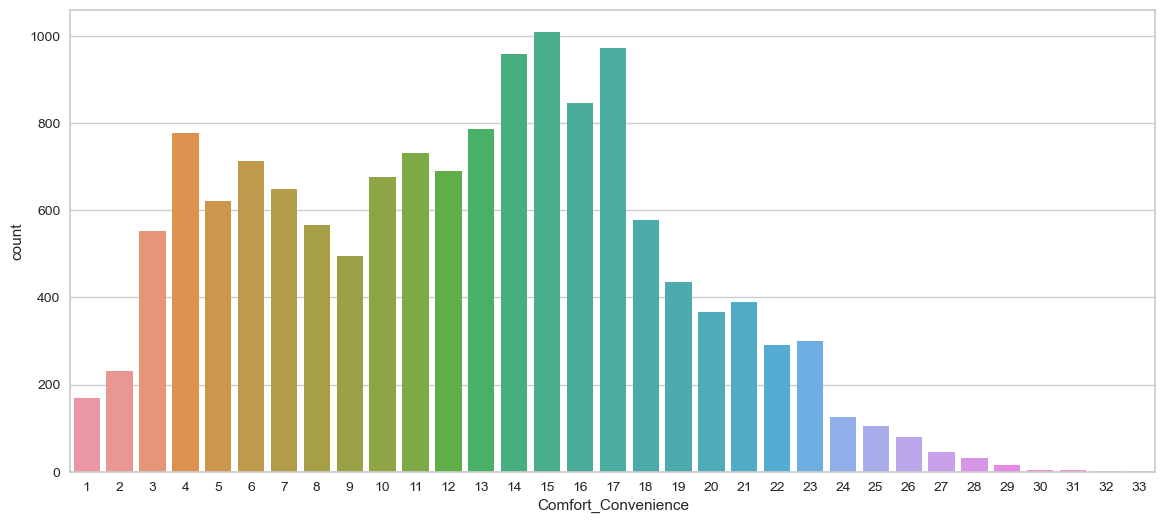

In [79]:
#Seeing the countplot of Comfort_Convenience
sns.countplot(x=df["Comfort_Convenience"])
plt.show()
#As we can see from the graph, there are about 33 ones in Comfort_Convenience, however, from nearly 24, the numbers
#started to decrease.

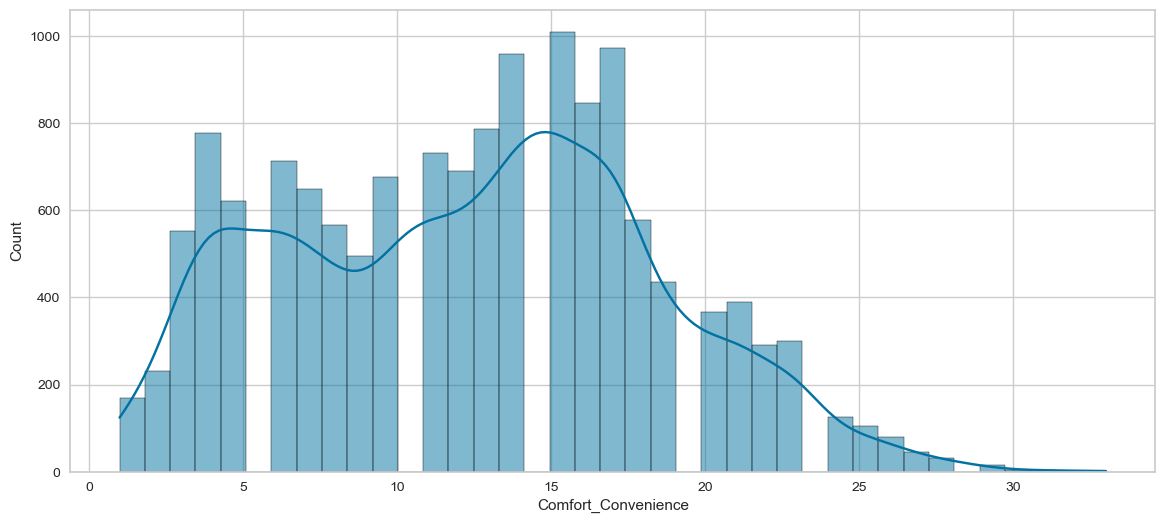

In [80]:
#Seeing the histplot of Comfort_Convenience
sns.histplot(df["Comfort_Convenience"], kde=True)
plt.show()
#As we can see, there are low values from about 24

### Entertainment_Media

In [81]:
#Seeing Entertainment_Media 
df.Entertainment_Media.sample(5)
#As we can see, we do have many things in it, and the best way is separite them from the comma, as there is different thing
#after each comma

5532    Bluetooth,Hands-free equipment,MP3,On-board co...
4741    Bluetooth,Hands-free equipment,MP3,On-board co...
4880    Bluetooth,MP3,On-board computer,Radio,Sound sy...
3070    Bluetooth,CD player,Hands-free equipment,MP3,O...
1649    Bluetooth,CD player,Digital radio,Hands-free e...
Name: Entertainment_Media, dtype: object

In [82]:
#Converting Entertainment_Media from object to numeric
df["Entertainment_Media"] = df.Entertainment_Media.apply(lambda x: len(x.split(',')))

In [83]:
#Seeing Entertainment_Media after converting
df["Entertainment_Media"]
#As we can see, now it is numeric not object

0        4
1        5
2        2
3        8
4        7
        ..
14216    7
14217    6
14218    7
14219    5
14220    4
Name: Entertainment_Media, Length: 14221, dtype: int64

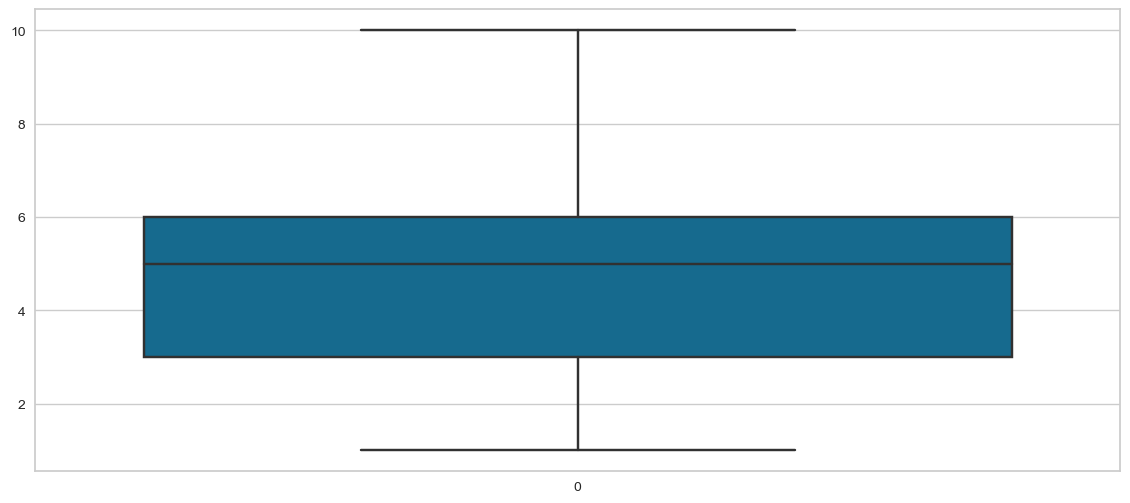

In [84]:
#SEeing teh boxplot of Entertainment_Media
sns.boxplot(df['Entertainment_Media'])
plt.show()
#As we can see, there is no outliers in Entertainment_Media

In [85]:
#Seeing the value counts of Entertainment_Media
df.Entertainment_Media.value_counts()

Entertainment_Media
5     3187
6     2805
7     1756
4     1648
3     1411
2     1337
1     1222
8      670
9      171
10      14
Name: count, dtype: int64

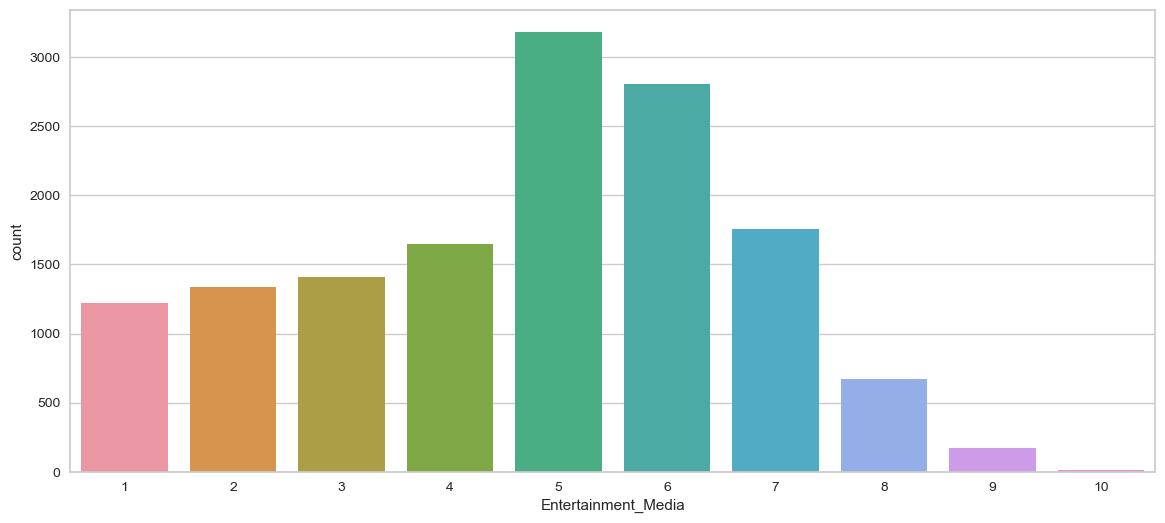

In [86]:
#Seeing the countplot of Entertainment_Media
sns.countplot(x=df["Entertainment_Media"])
plt.show()
#As we can see from the graph, there are 10 values, and 9 and 10 are the lest ones.

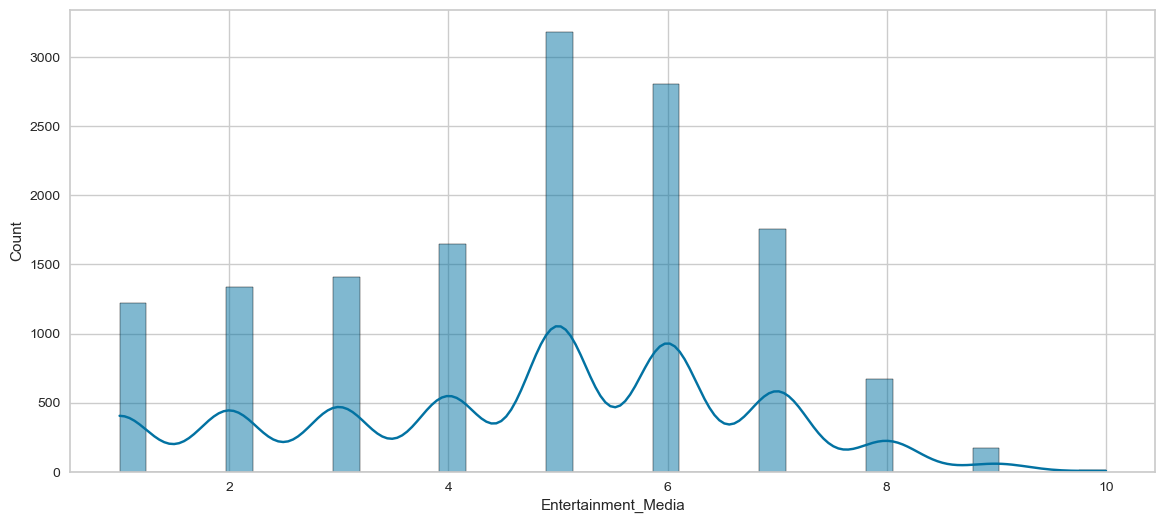

In [87]:
#Seeing the histplot of Entertainment_Media
sns.histplot(df["Entertainment_Media"], kde=True)
plt.show()
#As we can see, there are low values in 9 and 10

### Extras

In [88]:
#Seeing Extras 
df.Extras.sample(5)
#As we can see, we do have many things in it, and the best way is separite them from the comma, as there is different thing
#after each comma

14088                                         Alloy wheels
11299    Alloy wheels,Shift paddles,Touch screen,Voice ...
11188                  Alloy wheels,Roof rack,Touch screen
8539                                          Alloy wheels
11252                                         Alloy wheels
Name: Extras, dtype: object

In [89]:
#Converting Extras from object to numeric
df["Extras"] = df.Extras.apply(lambda x: len(x.split(',')))

In [90]:
#Seeing Extras after converting
df["Extras"]
#As we can see, now it is numeric not object

0        3
1        4
2        2
3        3
4        4
        ..
14216    3
14217    2
14218    5
14219    3
14220    1
Name: Extras, Length: 14221, dtype: int64

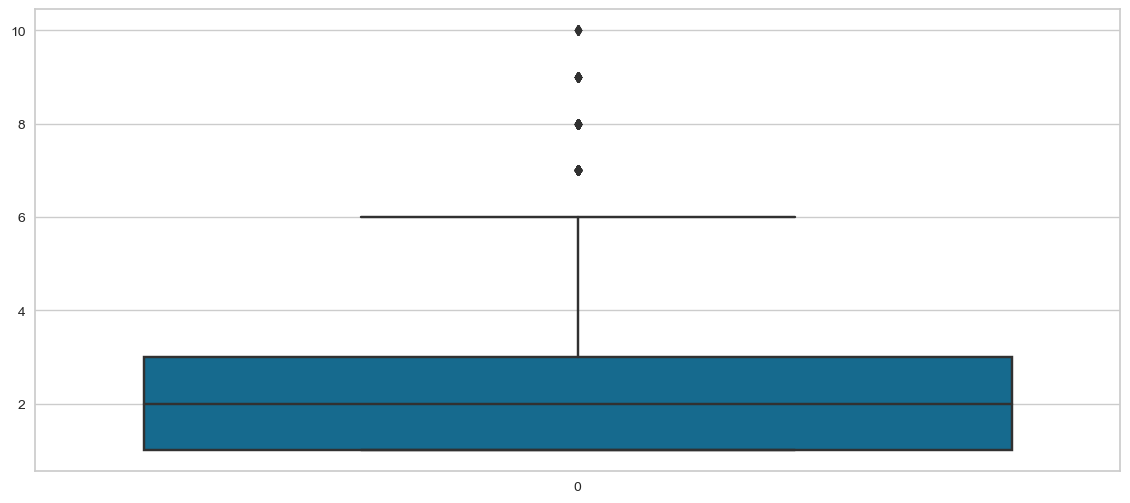

In [91]:
#SEeing teh boxplot of Extras
sns.boxplot(df['Extras'])
plt.show()
#As we can see, there are some outliers in Extras.

In [92]:
#Seeing the value counts of Extras
df.Extras.value_counts()

Extras
1     6079
2     3069
3     2398
4     1341
5      721
6      380
7      139
8       59
9       28
10       7
Name: count, dtype: int64

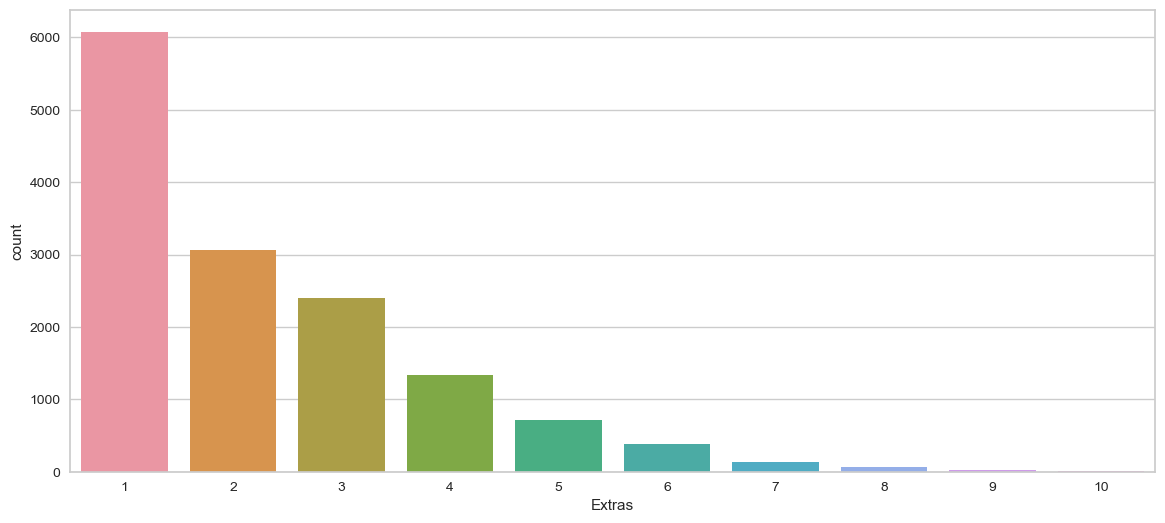

In [93]:
#Seeing the countplot of Extras
sns.countplot(x=df["Extras"])
plt.show()
#As we can see from the graph, there are 10 values, but 1, 2, 3 and 4 are the highest compared to the others

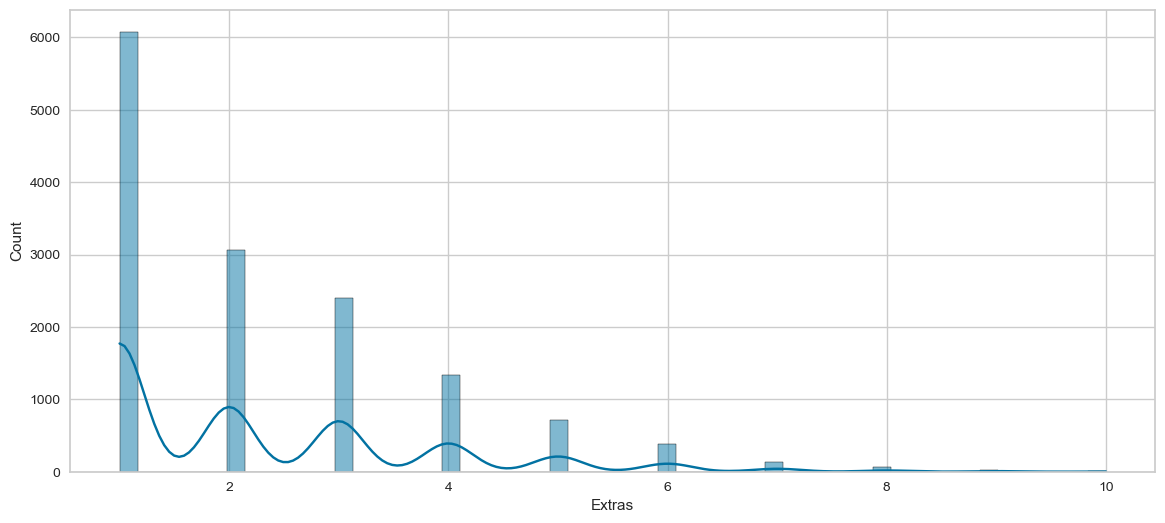

In [94]:
#Seeing the histplot of Extras
sns.histplot(df["Extras"], kde=True)
plt.show()
#As we can see, we can see the same here again the last classes have small values

### Safety_Security

In [95]:
#Seeing Safety_Security 
df.Safety_Security.sample(5)
#As we can see, we do have many things in it, and the best way is separite them from the comma, as there is different thing
#after each comma

6123     ABS,Adaptive headlights,Central door lock,Cent...
4539     ABS,Central door lock,Daytime running lights,D...
10104    ABS,Central door lock,Daytime running lights,D...
10091    ABS,Central door lock,Daytime running lights,D...
3381     ABS,Central door lock,Daytime running lights,D...
Name: Safety_Security, dtype: object

In [96]:
#Converting Safety_Security from object to numeric
df["Safety_Security"] = df.Safety_Security.apply(lambda x: len(x.split(',')))

In [97]:
#Seeing Safety_Security after converting
df["Safety_Security"]
#As we can see, now it is numeric not object

0        14
1        15
2        12
3        14
4        13
         ..
14216    18
14217    19
14218    19
14219    19
14220    18
Name: Safety_Security, Length: 14221, dtype: int64

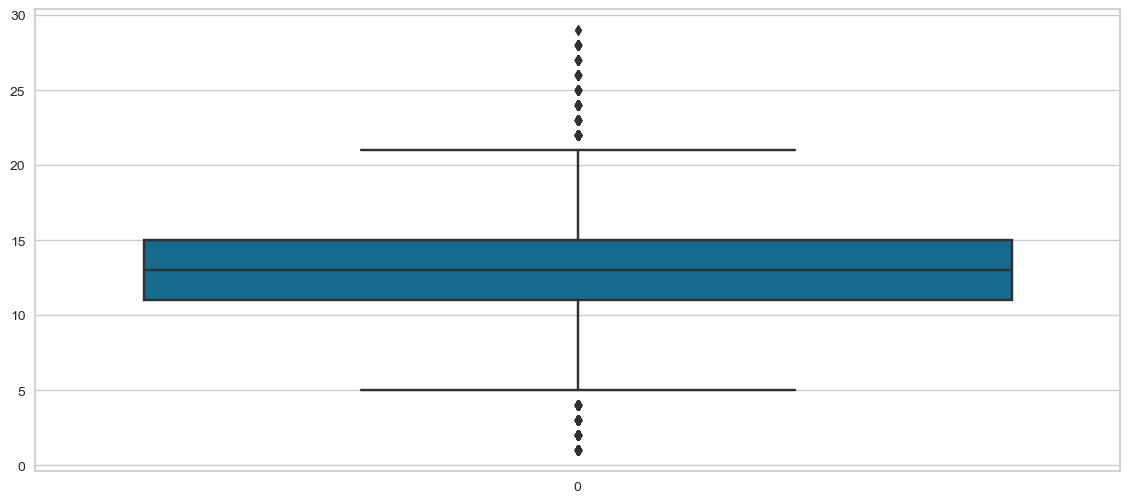

In [98]:
#SEeing teh boxplot of Safety_Security
sns.boxplot(df['Safety_Security'])
plt.show()
#As we can see, there are some outliers in Safety_Security.

In [99]:
#Seeing the value counts of Safety_Security
df.Safety_Security.value_counts()

Safety_Security
13    2201
14    1548
12    1540
11    1301
15     950
10     929
16     806
9      744
18     601
17     553
8      515
19     476
7      426
20     372
6      297
21     237
5      193
22     115
2       95
3       70
4       66
1       53
23      45
24      38
25      16
28      14
26      10
27       9
29       1
Name: count, dtype: int64

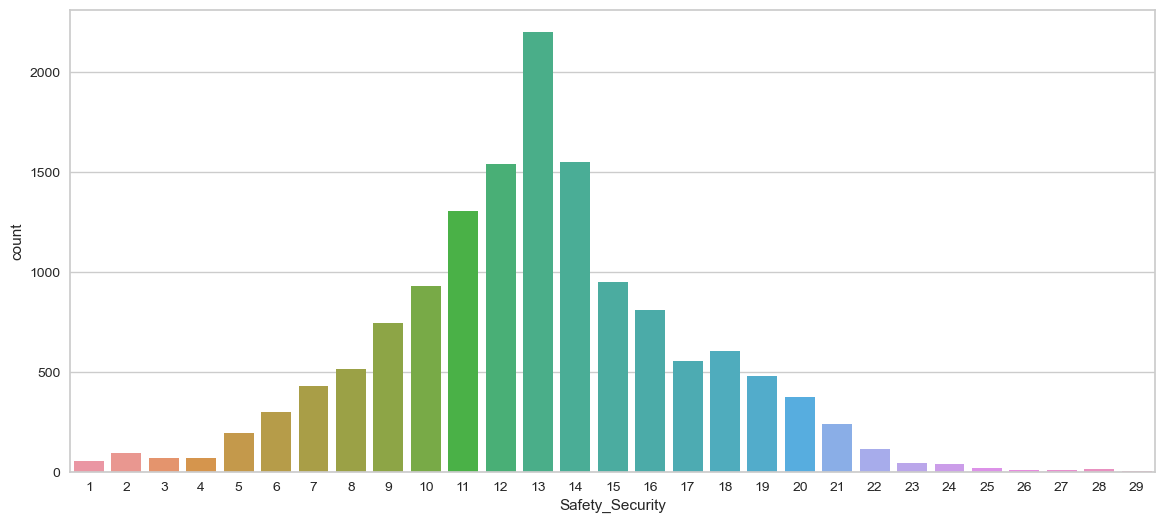

In [100]:
#Seeing the countplot of Safety_Security
sns.countplot(x=df["Safety_Security"])
plt.show()
#As we can see from the graph, there are about 29 classes adn 13 is the highest

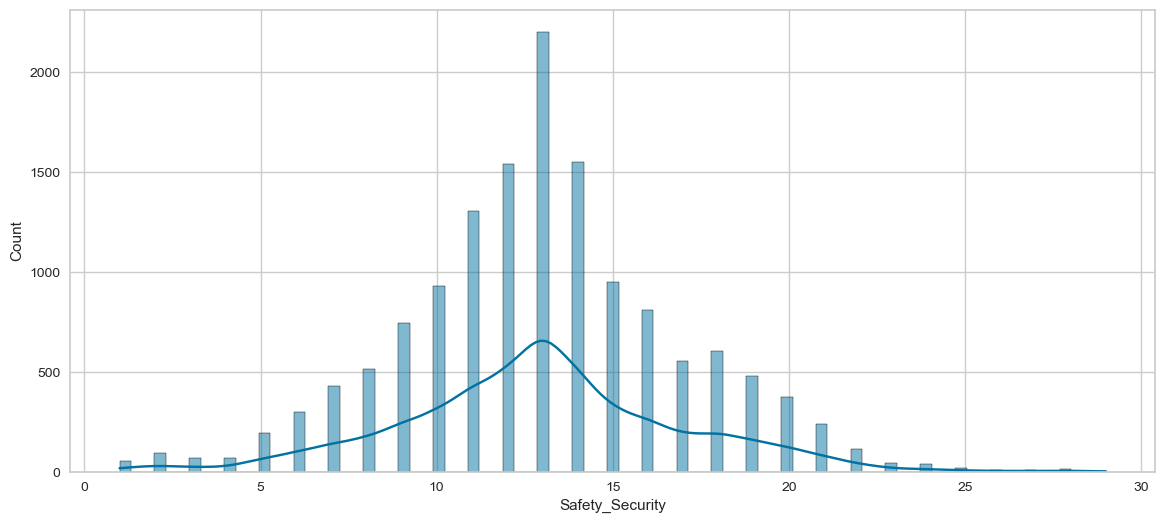

In [101]:
#Seeing the histplot of Safety_Security
sns.histplot(df["Safety_Security"], kde=True)
plt.show()

In [102]:
#Let's the dataset after converting
df.head()
#As we can see, they have converted successfuly

make_model body_type  price        km  Type     Fuel  Gears  \
0    Audi A1    Sedans  15770 56013.000  Used   Diesel  7.000   
1    Audi A1    Sedans  14500 80000.000  Used  Benzine  7.000   
2    Audi A1    Sedans  14640 83450.000  Used   Diesel  7.000   
3    Audi A1    Sedans  14500 73000.000  Used   Diesel  6.000   
4    Audi A1    Sedans  16790 16200.000  Used   Diesel  7.000   

   Comfort_Convenience  Entertainment_Media  Extras  Safety_Security   age  \
0                   16                    4       3               14 3.000   
1                    9                    5       4               15 2.000   
2                   13                    2       2               12 3.000   
3                   16                    8       3               14 3.000   
4                   13                    7       4               13 3.000   

   Previous_Owners   hp_kW  Inspection_new Paint_Type Upholstery_type  \
0            2.000  66.000               1   Metallic           Cloth   
1            1.000 141.000               0   Metallic           Cloth   
2            1.000  85.000               0   Metallic           Cloth   
3            1.000  66.000               0   Metallic           Cloth   
4            1.000  66.000               1   Metallic           Cloth   

  Gearing_Type  Weight_kg Drive_chain  cons_comb  
0    Automatic   1220.000       front      3.800  
1    Automatic   1255.000       front      5.600  
2    Automatic   1135.000       front      3.800  
3    Automatic   1195.000       front      3.800  
4    Automatic   1135.000       front      4.100

In [103]:
#Seeing the object columns in the dataset and assignt it to a variable
df_ob2 = df.select_dtypes(include ="object").head()
df_ob2
#As we can see, now we can see that the numbers are decreased after converting

make_model body_type  Type     Fuel Paint_Type Upholstery_type Gearing_Type  \
0    Audi A1    Sedans  Used   Diesel   Metallic           Cloth    Automatic   
1    Audi A1    Sedans  Used  Benzine   Metallic           Cloth    Automatic   
2    Audi A1    Sedans  Used   Diesel   Metallic           Cloth    Automatic   
3    Audi A1    Sedans  Used   Diesel   Metallic           Cloth    Automatic   
4    Audi A1    Sedans  Used   Diesel   Metallic           Cloth    Automatic   

  Drive_chain  
0       front  
1       front  
2       front  
3       front  
4       front

In [104]:
#Dropping the prices that more than 40000
df = df[df['price'] < 40000]
df

make_model body_type  price        km            Type     Fuel  \
0             Audi A1    Sedans  15770 56013.000            Used   Diesel   
1             Audi A1    Sedans  14500 80000.000            Used  Benzine   
2             Audi A1    Sedans  14640 83450.000            Used   Diesel   
3             Audi A1    Sedans  14500 73000.000            Used   Diesel   
4             Audi A1    Sedans  16790 16200.000            Used   Diesel   
...               ...       ...    ...       ...             ...      ...   
14216  Renault Espace       Van  39980   100.000  Pre-registered   Diesel   
14217  Renault Espace       Van  39950  1647.363             New   Diesel   
14218  Renault Espace       Van  39950  1000.000   Demonstration  Benzine   
14219  Renault Espace       Van  39885  9900.000            Used  Benzine   
14220  Renault Espace       Van  39875    15.000  Pre-registered   Diesel   

       Gears  Comfort_Convenience  Entertainment_Media  Extras  \
0      7.000                   16                    4       3   
1      7.000                    9                    5       4   
2      7.000                   13                    2       2   
3      6.000                   16                    8       3   
4      7.000                   13                    7       4   
...      ...                  ...                  ...     ...   
14216  6.000                   27                    7       3   
14217  6.000                   20                    6       2   
14218  6.000                   26                    7       5   
14219  7.000                   23                    5       3   
14220  6.000                   24                    4       1   

       Safety_Security   age  Previous_Owners   hp_kW  Inspection_new  \
0                   14 3.000            2.000  66.000               1   
1                   15 2.000            1.000 141.000               0   
2                   12 3.000            1.000  85.000               0   
3                   14 3.000            1.000  66.000               0   
4                   13 3.000            1.000  66.000               1   
...                ...   ...              ...     ...             ...   
14216               18 0.000            1.000 118.000               0   
14217               19 0.000            1.000 147.000               0   
14218               19 0.000            1.000 165.000               0   
14219               19 0.000            1.000 165.000               0   
14220               18 0.000            1.000 146.000               1   

      Paint_Type    Upholstery_type Gearing_Type  Weight_kg Drive_chain  \
0       Metallic              Cloth    Automatic   1220.000       front   
1       Metallic              Cloth    Automatic   1255.000       front   
2       Metallic              Cloth    Automatic   1135.000       front   
3       Metallic              Cloth    Automatic   1195.000       front   
4       Metallic              Cloth    Automatic   1135.000       front   
...          ...                ...          ...        ...         ...   
14216   Metallic  Part/Full Leather    Automatic   1734.000       front   
14217   Metallic  Part/Full Leather    Automatic   1758.000       front   
14218   Metallic  Part/Full Leather    Automatic   1734.000       front   
14219   Metallic              Cloth    Automatic   1708.000       front   
14220   Metallic  Part/Full Leather    Automatic   1734.000       front   

       cons_comb  
0          3.800  
1          5.600  
2          3.800  
3          3.800  
4          4.100  
...          ...  
14216      4.700  
14217      5.300  
14218      6.800  
14219      7.400  
14220      5.300  

[14070 rows x 21 columns]

In [105]:
#Seeing the prices after filtering
df.price

0        15770
1        14500
2        14640
3        14500
4        16790
         ...  
14216    39980
14217    39950
14218    39950
14219    39885
14220    39875
Name: price, Length: 14070, dtype: int64

In [106]:
#Seeing the sum of prices that are more than 40000
(df.price > 40000).sum()

0

In [107]:
#Seeing the prices that less than 40000
(df.price < 40000).sum()

14070

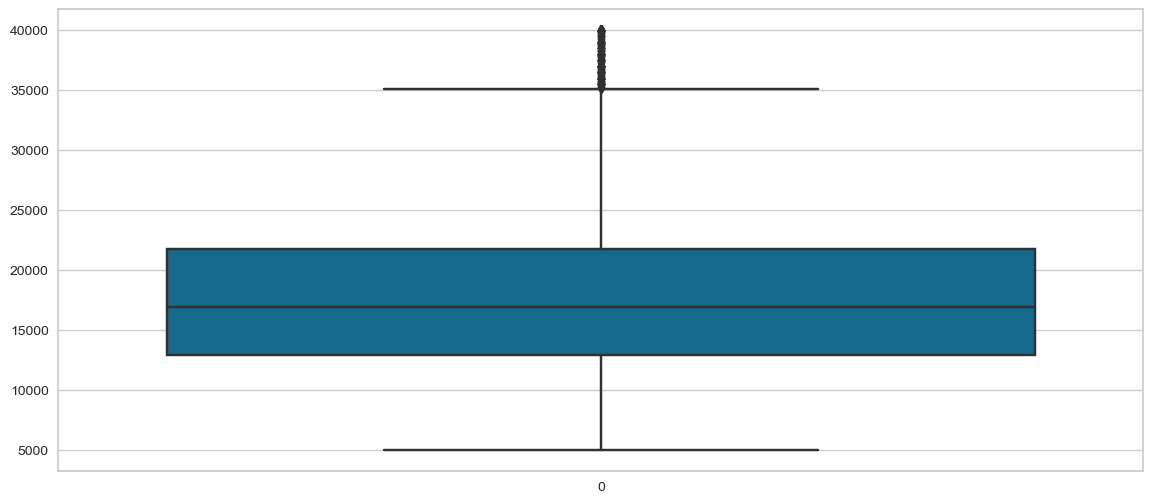

In [108]:
#SEeing teh boxplot of price after filterring 
sns.boxplot(df['price'])
plt.show()
#As we can see, there are some outliers in price, but it is not like before dropping them, the percentage now is low

## Modeling

### Train | Test Split

In [109]:
#Splitting the data to X and y
X= df.drop(columns="price")
y= df.price

In [110]:
#Seeing the head of X
X.head()

make_model body_type        km  Type     Fuel  Gears  Comfort_Convenience  \
0    Audi A1    Sedans 56013.000  Used   Diesel  7.000                   16   
1    Audi A1    Sedans 80000.000  Used  Benzine  7.000                    9   
2    Audi A1    Sedans 83450.000  Used   Diesel  7.000                   13   
3    Audi A1    Sedans 73000.000  Used   Diesel  6.000                   16   
4    Audi A1    Sedans 16200.000  Used   Diesel  7.000                   13   

   Entertainment_Media  Extras  Safety_Security   age  Previous_Owners  \
0                    4       3               14 3.000            2.000   
1                    5       4               15 2.000            1.000   
2                    2       2               12 3.000            1.000   
3                    8       3               14 3.000            1.000   
4                    7       4               13 3.000            1.000   

    hp_kW  Inspection_new Paint_Type Upholstery_type Gearing_Type  Weight_kg  \
0  66.000               1   Metallic           Cloth    Automatic   1220.000   
1 141.000               0   Metallic           Cloth    Automatic   1255.000   
2  85.000               0   Metallic           Cloth    Automatic   1135.000   
3  66.000               0   Metallic           Cloth    Automatic   1195.000   
4  66.000               1   Metallic           Cloth    Automatic   1135.000   

  Drive_chain  cons_comb  
0       front      3.800  
1       front      5.600  
2       front      3.800  
3       front      3.800  
4       front      4.100

In [111]:
#seeing the head of y
y.head()

0    15770
1    14500
2    14640
3    14500
4    16790
Name: price, dtype: int64

In [112]:
#Seeing the shape of X and y
print('X shape is:', X.shape)
print('y shape is:', y.shape)

X shape is: (14070, 20)
y shape is: (14070,)


In [113]:
#Splitting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t, random_state=s)

In [114]:
#Seeing the shape of X_train and X_test
print('X_train, shape is:', X_train.shape)
print('X_test shape is:', X_test.shape)


#Seeing the shape of y_train and y_test
print('y_train, shape is:', y_train.shape)
print('y_test shape is:', y_test.shape)

X_train, shape is: (11256, 20)
X_test shape is: (2814, 20)
y_train, shape is: (11256,)
y_test shape is: (2814,)


In [115]:
#Seeing the head of X_train
X_train.head()

make_model      body_type         km            Type     Fuel  \
8963       Opel Corsa        Compact      9.000  Pre-registered  Benzine   
13900  Renault Espace            Van  21709.000            Used   Diesel   
11322   Opel Insignia  Station wagon   1647.363   Demonstration   Diesel   
2917          Audi A3         Sedans 156000.000            Used   Diesel   
10780   Opel Insignia  Station wagon  29900.000            Used   Diesel   

       Gears  Comfort_Convenience  Entertainment_Media  Extras  \
8963   6.000                   18                    7       3   
13900  6.000                    2                    4       1   
11322  6.000                   13                    1       4   
2917   6.000                    6                    5       1   
10780  6.000                   24                    5       6   

       Safety_Security   age  Previous_Owners   hp_kW  Inspection_new  \
8963                19 0.000            1.000  66.000               0   
13900                5 2.000            1.000 118.000               0   
11322               13 0.000            1.000 100.000               0   
2917                12 3.000            1.000  81.000               0   
10780               18 1.000            1.000 125.000               1   

      Paint_Type    Upholstery_type Gearing_Type  Weight_kg Drive_chain  \
8963    Metallic  Part/Full Leather    Automatic   1163.000       front   
13900   Metallic  Part/Full Leather    Automatic   1734.000       front   
11322   Metallic  Part/Full Leather    Automatic   1487.000       front   
2917    Metallic              Cloth       Manual   1335.000       front   
10780   Metallic  Part/Full Leather    Automatic   1487.000       front   

       cons_comb  
8963       6.200  
13900      4.600  
11322      5.600  
2917       3.800  
10780      5.600

In [116]:
#Seeing the head of X_test
X_test.head()

make_model      body_type        km            Type     Fuel  Gears  \
2102         Audi A1         Sedans  4500.000  Employee's car   Diesel  5.000   
1985         Audi A1         Sedans  7500.000            Used  Benzine  7.000   
11624  Opel Insignia  Station wagon  1647.363             New  Benzine  6.000   
666          Audi A1        Compact 11707.000            Used  Benzine  5.000   
7689      Opel Corsa         Sedans 22635.000            Used  Benzine  6.000   

       Comfort_Convenience  Entertainment_Media  Extras  Safety_Security  \
2102                     7                    1       1                9   
1985                    12                    4       1                6   
11624                   21                    5       4               21   
666                      6                    3       1                9   
7689                    11                    7       2               10   

        age  Previous_Owners   hp_kW  Inspection_new Paint_Type  \
2102  0.000            1.000  66.000               0   Metallic   
1985  0.000            1.000  85.000               0   Metallic   
11624 0.000            1.000 121.000               1   Metallic   
666   1.000            1.000  60.000               1   Metallic   
7689  3.000            1.000  66.000               0   Metallic   

         Upholstery_type Gearing_Type  Weight_kg Drive_chain  cons_comb  
2102               Cloth       Manual   1135.000       front      3.800  
1985               Cloth    Automatic   1680.000       front      4.200  
11624  Part/Full Leather       Manual   1487.000       front      5.600  
666                Cloth       Manual   1110.000       front      4.200  
7689               Cloth    Automatic   1203.000       front      6.200

In [117]:
#Seeing the head of y_train
y_train.head()

8963     16990
13900    29990
11322    34490
2917     11990
10780    23970
Name: price, dtype: int64

In [118]:
#Seeing the head of y_test
y_test.head()

2102     20000
1985     24999
11624    33335
666      14220
7689     11990
Name: price, dtype: int64

In [119]:
#Seeing the object classes in the data set
df.select_dtypes(include="object").head(1)

make_model body_type  Type    Fuel Paint_Type Upholstery_type Gearing_Type  \
0    Audi A1    Sedans  Used  Diesel   Metallic           Cloth    Automatic   

  Drive_chain  
0       front

In [120]:
df.Type.value_counts()

Type
Used              10131
New                1305
Pre-registered     1013
Employee's car      902
Demonstration       719
Name: count, dtype: int64

In [121]:
cat = X_train.select_dtypes("object").columns
cat

Index(['make_model', 'body_type', 'Type', 'Fuel', 'Paint_Type',
       'Upholstery_type', 'Gearing_Type', 'Drive_chain'],
      dtype='object')

In [122]:
ord_enc = OrdinalEncoder()
trans = make_column_transformer((ord_enc, cat), remainder='passthrough', verbose_feature_names_out=False).set_output(transform="pandas")


In [123]:
# Making a variable for the columns that i will use in OneHotEncoder
c_onehot = ['make_model', 'body_type', 'Fuel', 'Upholstery_type', 'Gearing_Type', 'Drive_chain', 'Paint_Type']

#Making a variable for the columns that i will use in OrdinalEncoder
c_ord = ['Type']

#Making the values of Type
c_Type = ["Used", "New", "Pre-registered", "Employee's car", "Demonstration"]

In [124]:
trans2 = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse=False), c_onehot),
                        (OrdinalEncoder(categories= [c_Type],
                                       handle_unknown="use_encoded_value",
                                        unknown_value=-1) ,c_ord),
                                        remainder= 'passthrough',
#                          remainder= StandardScaler(),
    
                         verbose_feature_names_out=False)

trans2=trans2.set_output(transform="pandas")

In [125]:
#Seeing the head of X_train
X_train.head()

make_model      body_type         km            Type     Fuel  \
8963       Opel Corsa        Compact      9.000  Pre-registered  Benzine   
13900  Renault Espace            Van  21709.000            Used   Diesel   
11322   Opel Insignia  Station wagon   1647.363   Demonstration   Diesel   
2917          Audi A3         Sedans 156000.000            Used   Diesel   
10780   Opel Insignia  Station wagon  29900.000            Used   Diesel   

       Gears  Comfort_Convenience  Entertainment_Media  Extras  \
8963   6.000                   18                    7       3   
13900  6.000                    2                    4       1   
11322  6.000                   13                    1       4   
2917   6.000                    6                    5       1   
10780  6.000                   24                    5       6   

       Safety_Security   age  Previous_Owners   hp_kW  Inspection_new  \
8963                19 0.000            1.000  66.000               0   
13900                5 2.000            1.000 118.000               0   
11322               13 0.000            1.000 100.000               0   
2917                12 3.000            1.000  81.000               0   
10780               18 1.000            1.000 125.000               1   

      Paint_Type    Upholstery_type Gearing_Type  Weight_kg Drive_chain  \
8963    Metallic  Part/Full Leather    Automatic   1163.000       front   
13900   Metallic  Part/Full Leather    Automatic   1734.000       front   
11322   Metallic  Part/Full Leather    Automatic   1487.000       front   
2917    Metallic              Cloth       Manual   1335.000       front   
10780   Metallic  Part/Full Leather    Automatic   1487.000       front   

       cons_comb  
8963       6.200  
13900      4.600  
11322      5.600  
2917       3.800  
10780      5.600

In [126]:
#Fitting the trans with X_train
X_train_trans = trans.fit_transform(X_train)

#Fitting the trans with X_test
X_test_trans = trans.transform(X_test)

In [127]:
#Fitting the trans with X_train
X_train_trans2 = trans2.fit_transform(X_train)

#Fitting the trans with X_test
X_test_trans2 = trans2.transform(X_test)

In [128]:
#Seeing X_train_trans after converting
X_train_trans

make_model  body_type  Type  Fuel  Paint_Type  Upholstery_type  \
8963        3.000      0.000 3.000 0.000       0.000            1.000   
13900       6.000      7.000 4.000 1.000       0.000            1.000   
11322       4.000      5.000 0.000 1.000       0.000            1.000   
2917        1.000      4.000 4.000 1.000       0.000            0.000   
10780       4.000      5.000 4.000 1.000       0.000            1.000   
...           ...        ...   ...   ...         ...              ...   
5718        2.000      5.000 4.000 0.000       0.000            0.000   
8029        3.000      0.000 4.000 0.000       0.000            0.000   
1361        0.000      4.000 4.000 0.000       0.000            0.000   
1547        0.000      4.000 4.000 1.000       2.000            1.000   
13200       5.000      5.000 2.000 0.000       0.000            0.000   

       Gearing_Type  Drive_chain         km  Gears  Comfort_Convenience  \
8963          0.000        1.000      9.000  6.000                   18   
13900         0.000        1.000  21709.000  6.000                    2   
11322         0.000        1.000   1647.363  6.000                   13   
2917          1.000        1.000 156000.000  6.000                    6   
10780         0.000        1.000  29900.000  6.000                   24   
...             ...          ...        ...    ...                  ...   
5718          1.000        1.000  36600.000  5.000                   17   
8029          0.000        1.000   8930.000  6.000                   13   
1361          0.000        1.000   7987.000  7.000                   15   
1547          0.000        1.000   6600.000  7.000                   16   
13200         1.000        1.000   1647.363  5.000                    6   

       Entertainment_Media  Extras  Safety_Security   age  Previous_Owners  \
8963                     7       3               19 0.000            1.000   
13900                    4       1                5 2.000            1.000   
11322                    1       4               13 0.000            1.000   
2917                     5       1               12 3.000            1.000   
10780                    5       6               18 1.000            1.000   
...                    ...     ...              ...   ...              ...   
5718                     5       1               14 3.000            1.000   
8029                     7       1               11 1.000            1.000   
1361                     5       1               10 1.000            1.000   
1547                     5       5               13 1.000            1.000   
13200                    6       1               12 0.000            1.000   

        hp_kW  Inspection_new  Weight_kg  cons_comb  
8963   66.000               0   1163.000      6.200  
13900 118.000               0   1734.000      4.600  
11322 100.000               0   1487.000      5.600  
2917   81.000               0   1335.000      3.800  
10780 125.000               1   1487.000      5.600  
...       ...             ...        ...        ...  
5718   77.000               0   1263.000      4.500  
8029   66.000               1   1203.000      5.600  
1361  141.000               0   1135.000      5.600  
1547   85.000               1   1135.000      4.000  
13200  66.000               0   1084.000      5.000  

[11256 rows x 20 columns]

In [129]:
#Seeing X_train without transforming or using encoder on it
X_train

make_model      body_type         km            Type     Fuel  \
8963       Opel Corsa        Compact      9.000  Pre-registered  Benzine   
13900  Renault Espace            Van  21709.000            Used   Diesel   
11322   Opel Insignia  Station wagon   1647.363   Demonstration   Diesel   
2917          Audi A3         Sedans 156000.000            Used   Diesel   
10780   Opel Insignia  Station wagon  29900.000            Used   Diesel   
...               ...            ...        ...             ...      ...   
5718       Opel Astra  Station wagon  36600.000            Used  Benzine   
8029       Opel Corsa        Compact   8930.000            Used  Benzine   
1361          Audi A1         Sedans   7987.000            Used  Benzine   
1547          Audi A1         Sedans   6600.000            Used   Diesel   
13200    Renault Clio  Station wagon   1647.363             New  Benzine   

       Gears  Comfort_Convenience  Entertainment_Media  Extras  \
8963   6.000                   18                    7       3   
13900  6.000                    2                    4       1   
11322  6.000                   13                    1       4   
2917   6.000                    6                    5       1   
10780  6.000                   24                    5       6   
...      ...                  ...                  ...     ...   
5718   5.000                   17                    5       1   
8029   6.000                   13                    7       1   
1361   7.000                   15                    5       1   
1547   7.000                   16                    5       5   
13200  5.000                    6                    6       1   

       Safety_Security   age  Previous_Owners   hp_kW  Inspection_new  \
8963                19 0.000            1.000  66.000               0   
13900                5 2.000            1.000 118.000               0   
11322               13 0.000            1.000 100.000               0   
2917                12 3.000            1.000  81.000               0   
10780               18 1.000            1.000 125.000               1   
...                ...   ...              ...     ...             ...   
5718                14 3.000            1.000  77.000               0   
8029                11 1.000            1.000  66.000               1   
1361                10 1.000            1.000 141.000               0   
1547                13 1.000            1.000  85.000               1   
13200               12 0.000            1.000  66.000               0   

      Paint_Type    Upholstery_type Gearing_Type  Weight_kg Drive_chain  \
8963    Metallic  Part/Full Leather    Automatic   1163.000       front   
13900   Metallic  Part/Full Leather    Automatic   1734.000       front   
11322   Metallic  Part/Full Leather    Automatic   1487.000       front   
2917    Metallic              Cloth       Manual   1335.000       front   
10780   Metallic  Part/Full Leather    Automatic   1487.000       front   
...          ...                ...          ...        ...         ...   
5718    Metallic              Cloth       Manual   1263.000       front   
8029    Metallic              Cloth    Automatic   1203.000       front   
1361    Metallic              Cloth    Automatic   1135.000       front   
1547   Uni/basic  Part/Full Leather    Automatic   1135.000       front   
13200   Metallic              Cloth       Manual   1084.000       front   

       cons_comb  
8963       6.200  
13900      4.600  
11322      5.600  
2917       3.800  
10780      5.600  
...          ...  
5718       4.500  
8029       5.600  
1361       5.600  
1547       4.000  
13200      5.000  

[11256 rows x 20 columns]

In [130]:
#Seeing the shape of X_train_trans and X_test_trans
X_train_trans.shape, X_test_trans.shape 

((11256, 20), (2814, 20))

In [131]:
#Seeing the head of X_train_trans
X_train_trans.head()

make_model  body_type  Type  Fuel  Paint_Type  Upholstery_type  \
8963        3.000      0.000 3.000 0.000       0.000            1.000   
13900       6.000      7.000 4.000 1.000       0.000            1.000   
11322       4.000      5.000 0.000 1.000       0.000            1.000   
2917        1.000      4.000 4.000 1.000       0.000            0.000   
10780       4.000      5.000 4.000 1.000       0.000            1.000   

       Gearing_Type  Drive_chain         km  Gears  Comfort_Convenience  \
8963          0.000        1.000      9.000  6.000                   18   
13900         0.000        1.000  21709.000  6.000                    2   
11322         0.000        1.000   1647.363  6.000                   13   
2917          1.000        1.000 156000.000  6.000                    6   
10780         0.000        1.000  29900.000  6.000                   24   

       Entertainment_Media  Extras  Safety_Security   age  Previous_Owners  \
8963                     7       3               19 0.000            1.000   
13900                    4       1                5 2.000            1.000   
11322                    1       4               13 0.000            1.000   
2917                     5       1               12 3.000            1.000   
10780                    5       6               18 1.000            1.000   

        hp_kW  Inspection_new  Weight_kg  cons_comb  
8963   66.000               0   1163.000      6.200  
13900 118.000               0   1734.000      4.600  
11322 100.000               0   1487.000      5.600  
2917   81.000               0   1335.000      3.800  
10780 125.000               1   1487.000      5.600

In [132]:
#Seeing the head of X_test_trans
X_test_trans.head()

make_model  body_type  Type  Fuel  Paint_Type  Upholstery_type  \
2102        0.000      4.000 1.000 1.000       0.000            0.000   
1985        0.000      4.000 4.000 0.000       0.000            0.000   
11624       4.000      5.000 2.000 0.000       0.000            1.000   
666         0.000      0.000 4.000 0.000       0.000            0.000   
7689        3.000      4.000 4.000 0.000       0.000            0.000   

       Gearing_Type  Drive_chain        km  Gears  Comfort_Convenience  \
2102          1.000        1.000  4500.000  5.000                    7   
1985          0.000        1.000  7500.000  7.000                   12   
11624         1.000        1.000  1647.363  6.000                   21   
666           1.000        1.000 11707.000  5.000                    6   
7689          0.000        1.000 22635.000  6.000                   11   

       Entertainment_Media  Extras  Safety_Security   age  Previous_Owners  \
2102                     1       1                9 0.000            1.000   
1985                     4       1                6 0.000            1.000   
11624                    5       4               21 0.000            1.000   
666                      3       1                9 1.000            1.000   
7689                     7       2               10 3.000            1.000   

        hp_kW  Inspection_new  Weight_kg  cons_comb  
2102   66.000               0   1135.000      3.800  
1985   85.000               0   1680.000      4.200  
11624 121.000               1   1487.000      5.600  
666    60.000               1   1110.000      4.200  
7689   66.000               0   1203.000      6.200

#### Scaling

In [133]:
#Creating a scaler
scaler = MinMaxScaler().set_output(transform="pandas")
#Fitting the scaler with X_train_trans
scaler.fit(X_train_trans2)

#transforming X_train_trans
X_train_scaled = scaler.transform(X_train_trans2)

#transforming X_test_trans
X_test_scaled = scaler.transform(X_test_trans2)

In [134]:
#Seeing the head of X_train_scaled
X_train_scaled.head()

make_model_Audi A1  make_model_Audi A3  make_model_Opel Astra  \
8963                0.000               0.000                  0.000   
13900               0.000               0.000                  0.000   
11322               0.000               0.000                  0.000   
2917                0.000               1.000                  0.000   
10780               0.000               0.000                  0.000   

       make_model_Opel Corsa  make_model_Opel Insignia  \
8963                   1.000                     0.000   
13900                  0.000                     0.000   
11322                  0.000                     1.000   
2917                   0.000                     0.000   
10780                  0.000                     1.000   

       make_model_Renault Clio  make_model_Renault Espace  body_type_Compact  \
8963                     0.000                      0.000              1.000   
13900                    0.000                      1.000              0.000   
11322                    0.000                      0.000              0.000   
2917                     0.000                      0.000              0.000   
10780                    0.000                      0.000              0.000   

       body_type_Convertible  body_type_Coupe  body_type_Off-Road  \
8963                   0.000            0.000               0.000   
13900                  0.000            0.000               0.000   
11322                  0.000            0.000               0.000   
2917                   0.000            0.000               0.000   
10780                  0.000            0.000               0.000   

       body_type_Sedans  body_type_Station wagon  body_type_Transporter  \
8963              0.000                    0.000                  0.000   
13900             0.000                    0.000                  0.000   
11322             0.000                    1.000                  0.000   
2917              1.000                    0.000                  0.000   
10780             0.000                    1.000                  0.000   

       body_type_Van  Fuel_Benzine  Fuel_Diesel  Fuel_Electric  Fuel_LPG/CNG  \
8963           0.000         1.000        0.000          0.000         0.000   
13900          1.000         0.000        1.000          0.000         0.000   
11322          0.000         0.000        1.000          0.000         0.000   
2917           0.000         0.000        1.000          0.000         0.000   
10780          0.000         0.000        1.000          0.000         0.000   

       Upholstery_type_Cloth  Upholstery_type_Part/Full Leather  \
8963                   0.000                              1.000   
13900                  0.000                              1.000   
11322                  0.000                              1.000   
2917                   1.000                              0.000   
10780                  0.000                              1.000   

       Gearing_Type_Automatic  Gearing_Type_Manual  \
8963                    1.000                0.000   
13900                   1.000                0.000   
11322                   1.000                0.000   
2917                    0.000                1.000   
10780                   1.000                0.000   

       Gearing_Type_Semi-automatic  Drive_chain_4WD  Drive_chain_front  \
8963                         0.000            0.000              1.000   
13900                        0.000            0.000              1.000   
11322                        0.000            0.000              1.000   
2917                         0.000            0.000              1.000   
10780                        0.000            0.000              1.000   

       Drive_chain_rear  Paint_Type_Metallic  Paint_Type_Perl effect  \
8963              0.000                1.000                   0.000   
13900             0.000                1.000                   0.000   
11322   

In [135]:
#Seeing the head of X_test_scaled
X_test_scaled.head()

make_model_Audi A1  make_model_Audi A3  make_model_Opel Astra  \
2102                1.000               0.000                  0.000   
1985                1.000               0.000                  0.000   
11624               0.000               0.000                  0.000   
666                 1.000               0.000                  0.000   
7689                0.000               0.000                  0.000   

       make_model_Opel Corsa  make_model_Opel Insignia  \
2102                   0.000                     0.000   
1985                   0.000                     0.000   
11624                  0.000                     1.000   
666                    0.000                     0.000   
7689                   1.000                     0.000   

       make_model_Renault Clio  make_model_Renault Espace  body_type_Compact  \
2102                     0.000                      0.000              0.000   
1985                     0.000                      0.000              0.000   
11624                    0.000                      0.000              0.000   
666                      0.000                      0.000              1.000   
7689                     0.000                      0.000              0.000   

       body_type_Convertible  body_type_Coupe  body_type_Off-Road  \
2102                   0.000            0.000               0.000   
1985                   0.000            0.000               0.000   
11624                  0.000            0.000               0.000   
666                    0.000            0.000               0.000   
7689                   0.000            0.000               0.000   

       body_type_Sedans  body_type_Station wagon  body_type_Transporter  \
2102              1.000                    0.000                  0.000   
1985              1.000                    0.000                  0.000   
11624             0.000                    1.000                  0.000   
666               0.000                    0.000                  0.000   
7689              1.000                    0.000                  0.000   

       body_type_Van  Fuel_Benzine  Fuel_Diesel  Fuel_Electric  Fuel_LPG/CNG  \
2102           0.000         0.000        1.000          0.000         0.000   
1985           0.000         1.000        0.000          0.000         0.000   
11624          0.000         1.000        0.000          0.000         0.000   
666            0.000         1.000        0.000          0.000         0.000   
7689           0.000         1.000        0.000          0.000         0.000   

       Upholstery_type_Cloth  Upholstery_type_Part/Full Leather  \
2102                   1.000                              0.000   
1985                   1.000                              0.000   
11624                  0.000                              1.000   
666                    1.000                              0.000   
7689                   1.000                              0.000   

       Gearing_Type_Automatic  Gearing_Type_Manual  \
2102                    0.000                1.000   
1985                    1.000                0.000   
11624                   0.000                1.000   
666                     0.000                1.000   
7689                    1.000                0.000   

       Gearing_Type_Semi-automatic  Drive_chain_4WD  Drive_chain_front  \
2102                         0.000            0.000              1.000   
1985                         0.000            0.000              1.000   
11624                        0.000            0.000              1.000   
666                          0.000            0.000              1.000   
7689                         0.000            0.000              1.000   

       Drive_chain_rear  Paint_Type_Metallic  Paint_Type_Perl effect  \
2102              0.000                1.000                   0.000   
1985              0.000                1.000                   0.000   
11624   

#### Eval Function

In [136]:
#Creating the eval function to see the metrics
# Pre-defined functions

def eval(model, X_train, y_train, X_test, y_test):
    """This function will help you get regression metrics on both train
    and test set provided.

    Args:
        model : model that is used for prediction
        X_train : Train features
        y_train : Train target
        X_test  : Test features
        y_test  : Test target

    Returns:
        Dataframe : Returns scores dataframe
    """

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},

    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}

    return pd.DataFrame(scores)


# Adjusted R2 Score
def adj_r2(y_test, y_pred, X):
    """This function gives adjusted R^2

    Args:
        y_test : Actual target
        y_pred : Predcition
        X : Features

    Returns:
        adj_r2: Adjusted R^2
    """
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2


## Lazy Predict

In [137]:
clf = LazyRegressor(verbose=1, ignore_warnings=True, custom_metric=None)


operations = [("ncoder", trans)]

LC_pipe = Pipeline(steps=operations).set_output(transform="pandas")

X_train_transformed = LC_pipe.fit_transform(X_train)
X_test_transformed = LC_pipe.transform(X_test)

# If we want the outputs of the given transform algorithms to be dataframes,
# you can add set_output(transform="pandas") to the end of the pipeline.

models,predictions = clf.fit(X_train_transformed, X_test_transformed, y_train, y_test)
models

  2%|▏         | 1/42 [00:00<00:22,  1.80it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.7823244753054077, 'Adjusted R-Squared': 0.7807657533240644, 'RMSE': 3160.1475425333797, 'Time taken': 0.5556139945983887}


 10%|▉         | 4/42 [00:01<00:08,  4.37it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9453996345659264, 'Adjusted R-Squared': 0.945008654505532, 'RMSE': 1582.7063119410113, 'Time taken': 0.4599747657775879}
{'Model': 'BayesianRidge', 'R-Squared': 0.7789189916973603, 'Adjusted R-Squared': 0.7773358838684836, 'RMSE': 3184.7714986481774, 'Time taken': 0.052597761154174805}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9067528807243956, 'Adjusted R-Squared': 0.9060851605720461, 'RMSE': 2068.3320972870224, 'Time taken': 0.08072543144226074}
{'Model': 'DummyRegressor', 'R-Squared': -2.628856866748741e-05, 'Adjusted R-Squared': -0.007187235855231622, 'RMSE': 6773.424090944147, 'Time taken': 0.017405271530151367}
{'Model': 'ElasticNet', 'R-Squared': 0.741836085584609, 'Adjusted R-Squared': 0.739987436000539, 'RMSE': 3441.5202427427603, 'Time taken': 0.022193193435668945}


 17%|█▋        | 7/42 [00:01<00:04,  7.86it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.45647302337258155, 'Adjusted R-Squared': 0.45258095766096385, 'RMSE': 4993.592645622216, 'Time taken': 0.11532235145568848}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9065846490681694, 'Adjusted R-Squared': 0.9059157242494666, 'RMSE': 2070.197045695433, 'Time taken': 0.05374574661254883}


 21%|██▏       | 9/42 [00:04<00:19,  1.72it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9552760569039516, 'Adjusted R-Squared': 0.9549557995241016, 'RMSE': 1432.4273439682431, 'Time taken': 2.779893636703491}
{'Model': 'GammaRegressor', 'R-Squared': 0.704112033991153, 'Adjusted R-Squared': 0.7019932515635923, 'RMSE': 3684.395225770196, 'Time taken': 0.02801680564880371}


 26%|██▌       | 11/42 [00:24<01:58,  3.82s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -444.78404731215977, 'Adjusted R-Squared': -447.9761994590424, 'RMSE': 143009.47789471108, 'Time taken': 20.424463272094727}


 29%|██▊       | 12/42 [00:25<01:38,  3.29s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9316436153335856, 'Adjusted R-Squared': 0.9311541317341125, 'RMSE': 1770.8921066808416, 'Time taken': 1.1026582717895508}


 31%|███       | 13/42 [00:26<01:19,  2.75s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9494270233658997, 'Adjusted R-Squared': 0.9490648824662642, 'RMSE': 1523.2171392307491, 'Time taken': 0.8076827526092529}
{'Model': 'HuberRegressor', 'R-Squared': 0.7723699451038951, 'Adjusted R-Squared': 0.7707399411304178, 'RMSE': 3231.5982272786046, 'Time taken': 0.0912632942199707}


 36%|███▌      | 15/42 [00:26<00:47,  1.74s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.8859829477589205, 'Adjusted R-Squared': 0.8851664991213188, 'RMSE': 2287.112165687636, 'Time taken': 0.11841869354248047}


 43%|████▎     | 18/42 [00:35<00:48,  2.01s/it]

{'Model': 'KernelRidge', 'R-Squared': -6.102831946860513, 'Adjusted R-Squared': -6.15369361493685, 'RMSE': 18051.70922556171, 'Time taken': 8.563687324523926}
{'Model': 'Lars', 'R-Squared': 0.7789183198408716, 'Adjusted R-Squared': 0.7773352072009924, 'RMSE': 3184.7763378421623, 'Time taken': 0.03265500068664551}
{'Model': 'LarsCV', 'R-Squared': 0.7789183198408716, 'Adjusted R-Squared': 0.7773352072009924, 'RMSE': 3184.7763378421623, 'Time taken': 0.09535980224609375}
{'Model': 'Lasso', 'R-Squared': 0.7789396297206268, 'Adjusted R-Squared': 0.7773566696756617, 'RMSE': 3184.622845168657, 'Time taken': 0.038954973220825195}


 52%|█████▏    | 22/42 [00:35<00:18,  1.10it/s]

{'Model': 'LassoCV', 'R-Squared': 0.7790069159395966, 'Adjusted R-Squared': 0.7774244377150323, 'RMSE': 3184.1381415150704, 'Time taken': 0.16236162185668945}
{'Model': 'LassoLars', 'R-Squared': 0.7789399349998335, 'Adjusted R-Squared': 0.7773569771408992, 'RMSE': 3184.6206462230243, 'Time taken': 0.028766155242919922}
{'Model': 'LassoLarsCV', 'R-Squared': 0.7789183198408716, 'Adjusted R-Squared': 0.7773352072009924, 'RMSE': 3184.7763378421623, 'Time taken': 0.08269858360290527}
{'Model': 'LassoLarsIC', 'R-Squared': 0.7789183198408716, 'Adjusted R-Squared': 0.7773352072009924, 'RMSE': 3184.7763378421623, 'Time taken': 0.044500112533569336}
{'Model': 'LinearRegression', 'R-Squared': 0.7789183198408716, 'Adjusted R-Squared': 0.7773352072009924, 'RMSE': 3184.776337842162, 'Time taken': 0.026930570602416992}


 60%|█████▉    | 25/42 [00:35<00:09,  1.83it/s]

{'Model': 'LinearSVR', 'R-Squared': -0.6950880046845411, 'Adjusted R-Squared': -0.7072261214384583, 'RMSE': 8818.580525551182, 'Time taken': 0.03137922286987305}
{'Model': 'MLPRegressor', 'R-Squared': 0.6017721024715126, 'Adjusted R-Squared': 0.5989204884541228, 'RMSE': 4274.333456972944, 'Time taken': 6.7908103466033936}


 71%|███████▏  | 30/42 [00:49<00:17,  1.42s/it]

{'Model': 'NuSVR', 'R-Squared': 0.06196969060925195, 'Adjusted R-Squared': 0.05525268159105823, 'RMSE': 6560.108091854427, 'Time taken': 6.314603328704834}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.6427890297714998, 'Adjusted R-Squared': 0.6402311280870852, 'RMSE': 4048.2278996929163, 'Time taken': 0.03301501274108887}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.7537130499661536, 'Adjusted R-Squared': 0.7519494484621518, 'RMSE': 3361.423716744847, 'Time taken': 0.05963540077209473}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.764082817954738, 'Adjusted R-Squared': 0.7623934718606079, 'RMSE': 3289.8973364158865, 'Time taken': 0.06089282035827637}
{'Model': 'PoissonRegressor', 'R-Squared': 0.7910140939229775, 'Adjusted R-Squared': 0.789517596206708, 'RMSE': 3096.4285197753134, 'Time taken': 0.03700113296508789}


 79%|███████▊  | 33/42 [00:49<00:08,  1.04it/s]

{'Model': 'RANSACRegressor', 'R-Squared': 0.7135873469834251, 'Adjusted R-Squared': 0.711536414989035, 'RMSE': 3624.921947759256, 'Time taken': 0.2804253101348877}


 83%|████████▎ | 35/42 [00:54<00:09,  1.41s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9511958761947941, 'Adjusted R-Squared': 0.9508464016240443, 'RMSE': 1496.3418403395829, 'Time taken': 5.5069260597229}
{'Model': 'Ridge', 'R-Squared': 0.7789184243405851, 'Adjusted R-Squared': 0.7773353124490032, 'RMSE': 3184.7755851604966, 'Time taken': 0.01913928985595703}
{'Model': 'RidgeCV', 'R-Squared': 0.7789189827453803, 'Adjusted R-Squared': 0.7773358748524005, 'RMSE': 3184.771563126829, 'Time taken': 0.027550697326660156}
{'Model': 'SGDRegressor', 'R-Squared': 0.7785612381695657, 'Adjusted R-Squared': 0.7769755685538805, 'RMSE': 3187.3472573948457, 'Time taken': 0.03716921806335449}


 90%|█████████ | 38/42 [01:03<00:07,  1.91s/it]

{'Model': 'SVR', 'R-Squared': 0.07062761322117606, 'Adjusted R-Squared': 0.06397260150059725, 'RMSE': 6529.763350674326, 'Time taken': 8.443396806716919}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.7789183198408716, 'Adjusted R-Squared': 0.7773352072009924, 'RMSE': 3184.776337842162, 'Time taken': 0.019085168838500977}
{'Model': 'TweedieRegressor', 'R-Squared': 0.6934306191341009, 'Adjusted R-Squared': 0.6912353496685377, 'RMSE': 3750.3081013688043, 'Time taken': 0.0265045166015625}


 98%|█████████▊| 41/42 [01:04<00:01,  1.35s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9539729960882003, 'Adjusted R-Squared': 0.9536434078038336, 'RMSE': 1453.1448682983337, 'Time taken': 0.6761062145233154}


100%|██████████| 42/42 [01:04<00:00,  1.54s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 732
[LightGBM] [Info] Number of data points in the train set: 11256, number of used features: 20
[LightGBM] [Info] Start training from score 17793.988628
{'Model': 'LGBMRegressor', 'R-Squared': 0.9503736390876831, 'Adjusted R-Squared': 0.9500182766751352, 'RMSE': 1508.8941490168381, 'Time taken': 0.33451175689697266}


Adjusted R-Squared  R-Squared       RMSE  \
Model                                                                     
ExtraTreesRegressor                         0.955      0.955   1432.427   
XGBRegressor                                0.954      0.954   1453.145   
RandomForestRegressor                       0.951      0.951   1496.342   
LGBMRegressor                               0.950      0.950   1508.894   
HistGradientBoostingRegressor               0.949      0.949   1523.217   
BaggingRegressor                            0.945      0.945   1582.706   
GradientBoostingRegressor                   0.931      0.932   1770.892   
DecisionTreeRegressor                       0.906      0.907   2068.332   
ExtraTreeRegressor                          0.906      0.907   2070.197   
KNeighborsRegressor                         0.885      0.886   2287.112   
PoissonRegressor                            0.790      0.791   3096.429   
AdaBoostRegressor                           0.781      0.782   3160.148   
LassoCV                                     0.777      0.779   3184.138   
LassoLars                                   0.777      0.779   3184.621   
Lasso                                       0.777      0.779   3184.623   
BayesianRidge                               0.777      0.779   3184.771   
RidgeCV                                     0.777      0.779   3184.772   
Ridge                                       0.777      0.779   3184.776   
TransformedTargetRegressor                  0.777      0.779   3184.776   
Lars                                        0.777      0.779   3184.776   
LarsCV                                      0.777      0.779   3184.776   
LassoLarsCV                                 0.777      0.779   3184.776   
LassoLarsIC                                 0.777      0.779   3184.776   
LinearRegression                            0.777      0.779   3184.776   
SGDRegressor                                0.777      0.779   3187.347   
HuberRegressor                              0.771      0.772   3231.598   
PassiveAggressiveRegressor                  0.762      0.764   3289.897   
OrthogonalMatchingPursuitCV                 0.752      0.754   3361.424   
ElasticNet                                  0.740      0.742   3441.520   
RANSACRegressor                             0.712      0.714   3624.922   
GammaRegressor                              0.702      0.704   3684.395   
TweedieRegressor                            0.691      0.693   3750.308   
OrthogonalMatchingPursuit                   0.640      0.643   4048.228   
MLPRegressor                                0.599      0.602   4274.333   
ElasticNetCV                                0.453      0.456   4993.593   
SVR                                         0.064      0.071   6529.763   
NuSVR                                       0.055      0.062   6560.108   
DummyRegressor                             -0.007     -0.000   6773.424   
LinearSVR                                  -0.707     -0.695   8818.581   
KernelRidge                                -6.154     -6.103  18051.709   
GaussianProcessRegressor                 -447.976   -444.784 143009.478   

                               Time Taken  
Model                                      
ExtraTreesRegressor                 2.780  
XGBRegressor                        0.676  
RandomForestRegressor               5.507  
LGBMRegressor                       0.335  
HistGradientBoostingRegressor       0.808  
BaggingRegressor                    0.460  
GradientBoostingRegressor           1.103  
DecisionTreeRegressor               0.081  
ExtraTreeRegressor                  0.054  
KNeighborsRegressor                 0.118  
PoissonRegressor                    0.037  
AdaBoostRegressor                   0.556  
LassoCV                             0.162  
LassoLars                           0.029  
Lasso                               0.039  
BayesianRidge                       0.053  
RidgeCV      

### LinearRegression Model

In [138]:
#Creaing LinearRegression model
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)

LinearRegression()

In [139]:
#Seeing the evaluation of the model
eval(linear, X_train_scaled, y_train, X_test_scaled, y_test)

train        test
R2         0.866       0.869
mae     1782.363    1769.909
mse  6080709.270 5997196.770
rmse    2465.909    2448.917

In [140]:
#Predicting X_test
y_pred = linear.predict(X_test_scaled)
y_pred

array([20888., 23528., 25392., ...,  9488., 25920., 25080.])

In [141]:
#Seeing the result of r2
adj_r2(y_test, y_pred, X_test_scaled)

0.8672504241372544

In [142]:
#Creating the scoring for crossvalidation
scoring = ['r2','neg_mean_absolute_error', 'neg_mean_squared_error','neg_root_mean_squared_error']

In [143]:
#Creating crossvalidation
model = LinearRegression()

lin_scores = cross_validate(model,
                        X_train_scaled,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
#Creating a dataframe
pd.DataFrame(lin_scores)

fit_time  score_time  test_r2  train_r2  test_neg_mean_absolute_error  \
0     0.020       0.000    0.870     0.866                     -1769.929   
1     0.013       0.000    0.864     0.866                     -1814.905   
2     0.018       0.002    0.862     0.867                     -1760.943   
3     0.027       0.003    0.870     0.866                     -1715.414   
4     0.021       0.003    0.859     0.867                     -1803.202   
5     0.016       0.003    0.856     0.867                     -1862.433   
6     0.018       0.001    0.870     0.866                     -1763.260   
7     0.022       0.006    0.866     0.866                     -1778.072   
8     0.029       0.003    0.869     0.866                     -1808.027   
9     0.031       0.005    0.856     0.867                     -1836.465   

   train_neg_mean_absolute_error  test_neg_mean_squared_error  \
0                      -1784.759                 -5915530.490   
1                      -1780.710                 -5951911.091   
2                      -1786.643                 -5979812.045   
3                      -1791.087                 -5639539.002   
4                      -1787.816                 -6165664.590   
5                      -1770.470                 -6850264.937   
6                      -1782.848                 -5870841.580   
7                      -1780.575                 -6201506.781   
8                      -1777.709                 -6525410.306   
9                      -1774.495                 -6580259.808   

   train_neg_mean_squared_error  test_neg_root_mean_squared_error  \
0                  -6096388.999                         -2432.186   
1                  -6094061.858                         -2439.654   
2                  -6090306.767                         -2445.365   
3                  -6128261.526                         -2374.771   
4                  -6075499.764                         -2483.076   
5                  -5993396.267                         -2617.301   
6                  -6103935.467                         -2422.982   
7                  -6065152.421                         -2490.282   
8                  -6044691.629                         -2554.488   
9                  -6039141.026                         -2565.202   

   train_neg_root_mean_squared_error  
0                          -2469.087  
1                          -2468.615  
2                          -2467.855  
3                          -2475.533  
4                          -2464.853  
5                          -2448.141  
6                          -2470.614  
7                          -2462.753  
8                          -2458.595  
9                          -2457.466

In [144]:
#Seeing the mean of the scores
pd.DataFrame(lin_scores).iloc[:, 2:].mean()

test_r2                                    0.864
train_r2                                   0.866
test_neg_mean_absolute_error           -1791.265
train_neg_mean_absolute_error          -1781.711
test_neg_mean_squared_error         -6168074.063
train_neg_mean_squared_error        -6073083.573
test_neg_root_mean_squared_error       -2482.531
train_neg_root_mean_squared_error      -2464.351
dtype: float64

In [145]:
params = linear.get_params()
print(params)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [146]:
# Define the parameter grid
param_grid = {
    'copy_X': [True, False],
    'fit_intercept': [True, False],
    'n_jobs': [1, 2, None],
    'positive': [True, False]
}

#Creating the model
linear_model = LinearRegression()

# Create the grid search object
grid_search = GridSearchCV(linear_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search object
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [1, 2, None],
                         'positive': [True, False]},
             scoring='neg_mean_squared_error')

In [147]:
grid_search.best_params_

{'copy_X': True, 'fit_intercept': False, 'n_jobs': 1, 'positive': False}

In [148]:
# Access the best model
best_model = grid_search.best_estimator_
best_model

LinearRegression(fit_intercept=False, n_jobs=1)

In [149]:
# Evaluate the model
y_pred = best_model.predict(X_test_scaled)
y_pred

array([20848.96307617, 23472.46341349, 25406.92766374, ...,
        9477.09328275, 25880.13030139, 25037.38628034])

In [150]:
#Creaing LinearRegression model with the parameters from gridSearch
linear_m = LinearRegression(copy_X= True, fit_intercept=True, n_jobs=1, positive= False)
linear_m.fit(X_train_scaled, y_train)

LinearRegression(n_jobs=1)

In [151]:
#Seeing the evaluation of the model
eval(linear_m, X_train_scaled, y_train, X_test_scaled, y_test)

train        test
R2         0.866       0.869
mae     1782.363    1769.909
mse  6080709.270 5997196.770
rmse    2465.909    2448.917

In [152]:
#prediction X_test
y_pred = linear_m.predict(X_test_scaled)
y_pred

array([20888., 23528., 25392., ...,  9488., 25920., 25080.])

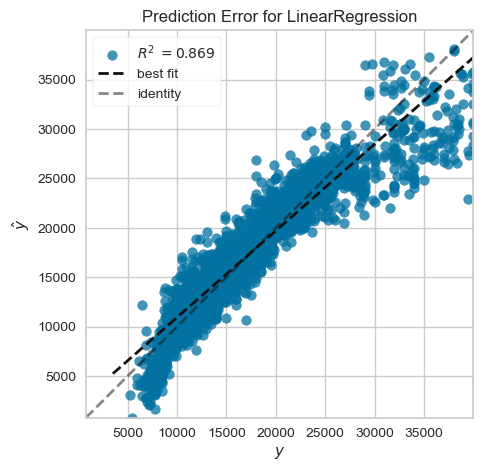

In [153]:
#Visualizing the result
visualizer = RadViz(size=(500, 1000))

visualizer = PredictionError(linear_m)
visualizer.fit(X_train_scaled, y_train) # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test) # Evaluate the model on the test data
visualizer.show();
#As we can see, there are some difference between the acual and the predicted line

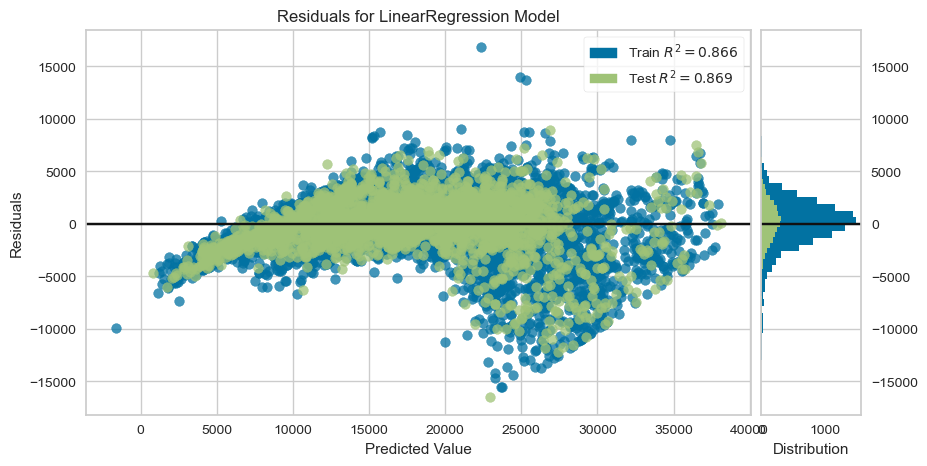

In [154]:
#Seeing the result with train and test for r2
visualizer = RadViz(size=(1000, 500))
visualizer = ResidualsPlot(linear_m)

visualizer.fit(X_train_scaled, y_train) # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test) # Evaluate the model on the test data
visualizer.show();
#As we can see, there are some mistakes

In [155]:
#Saving the result to use them later
linear_R2 = r2_score(y_test, y_pred)
linear_mae = mean_absolute_error(y_test, y_pred)
linear_rmse = mean_squared_error(y_test, y_pred, squared=False)

In [156]:
#Printing the result
print('linear_R2', linear_R2)
print('linear_mae', linear_mae)
print('linear_rmse', linear_rmse)

linear_R2 0.8692796569001758
linear_mae 1769.909026297086
linear_rmse 2448.9174689488445


## Ridge Model 

In [157]:
#Creaing Ridge model
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)

Ridge()

In [158]:
#Seeing the evaluation of the model
eval(ridge, X_train_scaled, y_train, X_test_scaled, y_test)
#As we can see, ther is no huge difference, so there is no overfitting

train        test
R2         0.866       0.869
mae     1781.062    1766.085
mse  6077153.441 5994107.869
rmse    2465.188    2448.287

In [160]:
#Creating crossvalidation
ridge_cro = Ridge()
scores = cross_validate(ridge_cro,
                        X_train_scaled,
                        y_train,
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
scores = pd.DataFrame(scores, index = range(1, 11))
scores

fit_time  score_time  test_r2  train_r2  test_neg_mean_absolute_error  \
1      0.007       0.002    0.870     0.866                     -1769.009   
2      0.008       0.002    0.864     0.866                     -1813.060   
3      0.007       0.003    0.862     0.867                     -1758.960   
4      0.007       0.002    0.871     0.866                     -1713.197   
5      0.008       0.002    0.858     0.867                     -1801.355   
6      0.008       0.002    0.856     0.867                     -1861.784   
7      0.007       0.003    0.870     0.866                     -1763.132   
8      0.007       0.002    0.866     0.866                     -1777.077   
9      0.008       0.002    0.869     0.866                     -1803.684   
10     0.040       0.002    0.857     0.867                     -1832.933   

    train_neg_mean_absolute_error  test_neg_mean_squared_error  \
1                       -1783.386                 -5914929.340   
2                       -1780.245                 -5946855.055   
3                       -1785.401                 -5976566.062   
4                       -1790.144                 -5620980.388   
5                       -1782.455                 -6168859.256   
6                       -1770.283                 -6845884.914   
7                       -1782.740                 -5860666.766   
8                       -1779.749                 -6199242.081   
9                       -1776.685                 -6504523.186   
10                      -1773.447                 -6524420.555   

    train_neg_mean_squared_error  test_neg_root_mean_squared_error  \
1                   -6097259.957                         -2432.063   
2                   -6095622.087                         -2438.617   
3                   -6091034.820                         -2444.702   
4                   -6129444.116                         -2370.861   
5                   -6071240.726                         -2483.719   
6                   -5993511.690                         -2616.464   
7                   -6105761.620                         -2420.881   
8                   -6065761.608                         -2489.828   
9                   -6044460.777                         -2550.397   
10                  -6036815.079                         -2554.295   

    train_neg_root_mean_squared_error  
1                           -2469.263  
2                           -2468.931  
3                           -2468.002  
4                           -2475.771  
5                           -2463.989  
6                           -2448.165  
7                           -2470.984  
8                           -2462.877  
9                           -2458.549  
10                          -2456.993

In [161]:
#Converting the scores to a dataframe
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                    0.864
train_r2                                   0.866
test_neg_mean_absolute_error           -1789.419
train_neg_mean_absolute_error          -1780.454
test_neg_mean_squared_error         -6156292.760
train_neg_mean_squared_error        -6073091.248
test_neg_root_mean_squared_error       -2480.183
train_neg_root_mean_squared_error      -2464.352
dtype: float64

In [166]:
#Creating gridSearch
alpha_space = np.linspace(0.001, 10, 100)

pipe_model = Ridge()

param_grid = {'alpha': alpha_space} 

ridge_grid_model = GridSearchCV(estimator=pipe_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          n_jobs = -1,
                          return_train_score=True)
ridge_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-03, 1.01109091e+00, 2.02118182e+00, 3.03127273e+00,
       4.04136364e+00, 5.05145455e+00, 6.06154545e+00, 7.07163636e+00,
       8.08172727e+00, 9.09181818e+00, 1.01019091e+01, 1.11120000e+01,
       1.21220909e+01, 1.31321818e+01, 1.41422727e+01, 1.51523636e+01,
       1.61624545e+01, 1.71725455e+01, 1.81826...
       8.08082727e+01, 8.18183636e+01, 8.28284545e+01, 8.38385455e+01,
       8.48486364e+01, 8.58587273e+01, 8.68688182e+01, 8.78789091e+01,
       8.88890000e+01, 8.98990909e+01, 9.09091818e+01, 9.19192727e+01,
       9.29293636e+01, 9.39394545e+01, 9.49495455e+01, 9.59596364e+01,
       9.69697273e+01, 9.79798182e+01, 9.89899091e+01, 1.00000000e+02])},
             return_train_score=True, scoring='neg_mean_squared_error')

In [167]:
ridge_grid_model.best_params_

{'alpha': 3.0312727272727273}

In [168]:
#Creaing Ridge model with the parameters from gridSearch
ridge_m = Ridge(alpha= 3.0312727272727273)
ridge_m.fit(X_train_scaled, y_train)

Ridge(alpha=3.0312727272727273)

In [169]:
#Seeing the evaluation of the model
eval(ridge_m, X_train_scaled, y_train, X_test_scaled, y_test)
#As we can see, there is no overfitting

train        test
R2         0.866       0.869
mae     1779.502    1764.282
mse  6081102.491 6001251.485
rmse    2465.989    2449.745

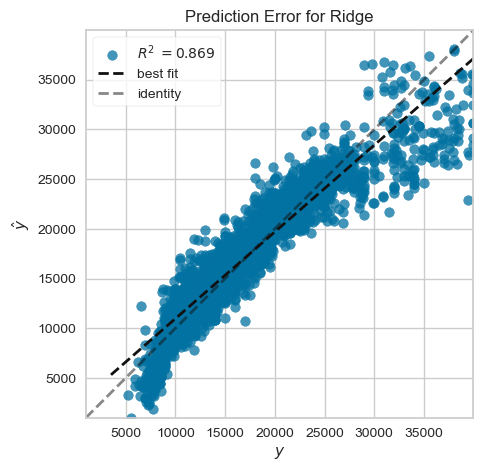

In [170]:
#Visualizing the result
visualizer = RadViz(size=(500, 1000))

visualizer = PredictionError(ridge_m)
visualizer.fit(X_train_scaled, y_train) # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test) # Evaluate the model on the test data
visualizer.show();
#As we can see, there are some difference between the acual and the predicted line

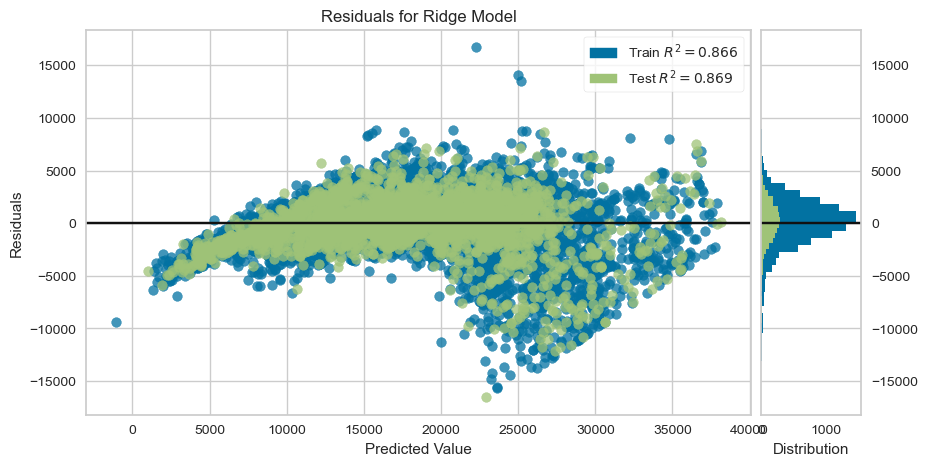

In [171]:
#Seeing the result with train and test for r2
visualizer = RadViz(size=(1000, 500))
visualizer = ResidualsPlot(ridge_m)

visualizer.fit(X_train_scaled, y_train) # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test) # Evaluate the model on the test data
visualizer.show();
#As we can see, there are some mistakes

In [172]:
#Prediction X_test
y_pred = ridge_m.predict(X_test_scaled)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = mean_squared_error(y_test, y_pred, squared=False)

In [173]:
#Printing the result
print('ridge_R2', rm_R2)
print('ridge_mae', rm_mae)
print('ridge_rmse', rm_rmse)

ridge_R2 0.8691912766431988
ridge_mae 1764.2818202408644
ridge_rmse 2449.7451877998956


## Lasso Model

In [174]:
#Creaing Lasso model
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

Lasso()

In [175]:
#Seeing the evaluation of the model
eval(lasso, X_train_scaled, y_train, X_test_scaled, y_test)
#As we can see, ther is no huge difference, so there is no overfitting

train        test
R2         0.866       0.869
mae     1781.425    1765.596
mse  6083590.577 6002532.323
rmse    2466.494    2450.007

In [177]:
#Creating crossvalidation
lasso_cro = Lasso()
scores = cross_validate(lasso_cro,
                        X_train_scaled,
                        y_train,
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
scores = pd.DataFrame(scores, index = range(1, 11))
scores

fit_time  score_time  test_r2  train_r2  test_neg_mean_absolute_error  \
1      0.132       0.003    0.870     0.866                     -1768.384   
2      0.139       0.003    0.865     0.866                     -1806.879   
3      0.182       0.003    0.862     0.867                     -1761.817   
4      0.129       0.002    0.871     0.866                     -1711.643   
5      0.142       0.002    0.858     0.867                     -1802.350   
6      0.149       0.003    0.856     0.867                     -1861.095   
7      0.145       0.002    0.871     0.866                     -1762.339   
8      0.158       0.002    0.866     0.866                     -1777.199   
9      0.155       0.004    0.870     0.866                     -1800.641   
10     0.158       0.003    0.859     0.867                     -1829.249   

    train_neg_mean_absolute_error  test_neg_mean_squared_error  \
1                       -1783.622                 -5914494.840   
2                       -1780.603                 -5914942.381   
3                       -1785.865                 -5994323.732   
4                       -1790.785                 -5605153.212   
5                       -1782.946                 -6177263.784   
6                       -1770.697                 -6846251.957   
7                       -1782.769                 -5844081.585   
8                       -1779.871                 -6195960.366   
9                       -1777.254                 -6463637.450   
10                      -1774.906                 -6438753.473   

    train_neg_mean_squared_error  test_neg_root_mean_squared_error  \
1                   -6103446.190                         -2431.973   
2                   -6102678.485                         -2432.065   
3                   -6097186.337                         -2448.331   
4                   -6136216.458                         -2367.520   
5                   -6077447.972                         -2485.410   
6                   -5999713.113                         -2616.534   
7                   -6111483.942                         -2417.454   
8                   -6072067.471                         -2489.169   
9                   -6049242.841                         -2542.368   
10                  -6045798.464                         -2537.470   

    train_neg_root_mean_squared_error  
1                           -2470.515  
2                           -2470.360  
3                           -2469.248  
4                           -2477.139  
5                           -2465.248  
6                           -2449.431  
7                           -2472.142  
8                           -2464.157  
9                           -2459.521  
10                          -2458.821

In [178]:
#Converting the scores to a dataframe
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                    0.865
train_r2                                   0.866
test_neg_mean_absolute_error           -1788.160
train_neg_mean_absolute_error          -1780.932
test_neg_mean_squared_error         -6139486.278
train_neg_mean_squared_error        -6079528.127
test_neg_root_mean_squared_error       -2476.830
train_neg_root_mean_squared_error      -2465.658
dtype: float64

In [179]:
#Creating gridSearch

pipe_model = Lasso()


lasso_grid_model = GridSearchCV(estimator=pipe_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          n_jobs = -1,
                          return_train_score=True)
lasso_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-03, 1.01109091e+00, 2.02118182e+00, 3.03127273e+00,
       4.04136364e+00, 5.05145455e+00, 6.06154545e+00, 7.07163636e+00,
       8.08172727e+00, 9.09181818e+00, 1.01019091e+01, 1.11120000e+01,
       1.21220909e+01, 1.31321818e+01, 1.41422727e+01, 1.51523636e+01,
       1.61624545e+01, 1.71725455e+01, 1.81826...
       8.08082727e+01, 8.18183636e+01, 8.28284545e+01, 8.38385455e+01,
       8.48486364e+01, 8.58587273e+01, 8.68688182e+01, 8.78789091e+01,
       8.88890000e+01, 8.98990909e+01, 9.09091818e+01, 9.19192727e+01,
       9.29293636e+01, 9.39394545e+01, 9.49495455e+01, 9.59596364e+01,
       9.69697273e+01, 9.79798182e+01, 9.89899091e+01, 1.00000000e+02])},
             return_train_score=True, scoring='neg_mean_squared_error')

In [180]:
lasso_grid_model.best_params_

{'alpha': 2.021181818181818}

In [181]:
#Creaing Ridge model with the parameters from gridSearch
lasso_m = Lasso(alpha= 2.021181818181818)
lasso_m.fit(X_train_scaled, y_train)

Lasso(alpha=2.021181818181818)

In [182]:
#Seeing the evaluation of the model
eval(lasso_m, X_train_scaled, y_train, X_test_scaled, y_test)
#As we can see, there is no overfitting

train        test
R2         0.866       0.869
mae     1781.074    1764.577
mse  6096070.123 6018812.064
rmse    2469.022    2453.327

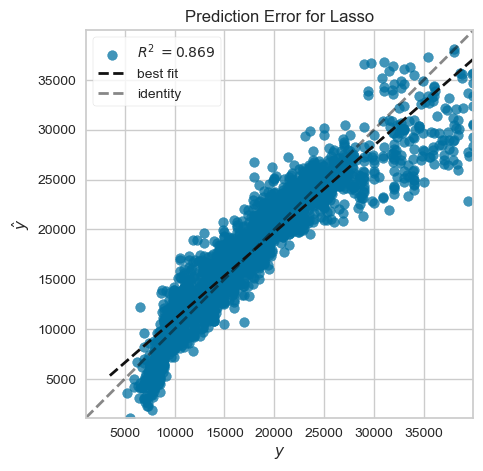

In [183]:
#Visualizing the result
visualizer = RadViz(size=(500, 1000))

visualizer = PredictionError(lasso_m)
visualizer.fit(X_train_scaled, y_train) # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test) # Evaluate the model on the test data
visualizer.show();
#As we can see, there are some difference between the acual and the predicted line

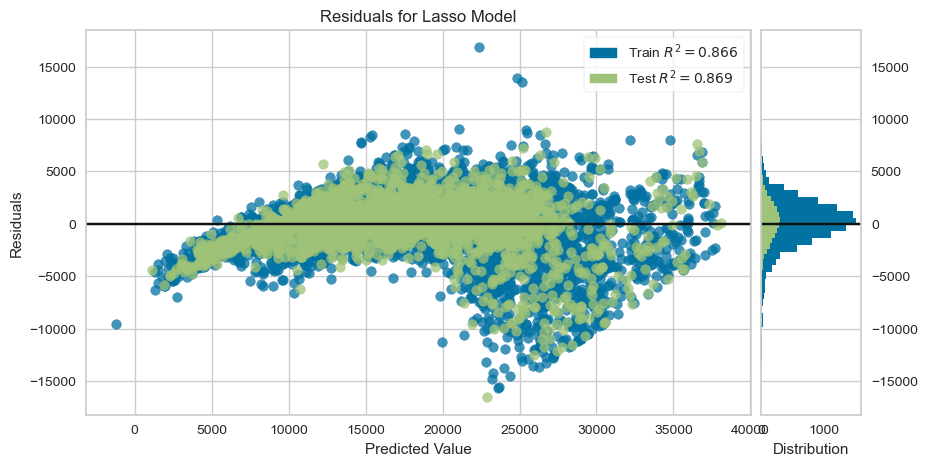

In [184]:
#Seeing the result with train and test for r2
visualizer = RadViz(size=(1000, 500))
visualizer = ResidualsPlot(lasso_m)

visualizer.fit(X_train_scaled, y_train) # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test) # Evaluate the model on the test data
visualizer.show();
#As we can see, there are some mistakes

In [185]:
#Prediction X_test
y_pred = lasso_m.predict(X_test_scaled)
l_R2 = r2_score(y_test, y_pred)
l_mae = mean_absolute_error(y_test, y_pred)
l_rmse = mean_squared_error(y_test, y_pred, squared=False)

In [186]:
#Printing the result
print('ridge_R2', l_R2)
print('ridge_mae', l_mae)
print('ridge_rmse', l_rmse)

ridge_R2 0.8688085103331906
ridge_mae 1764.5774519633708
ridge_rmse 2453.3267340264447


## Elastic-Net Model 

In [187]:
#Creaing Lasso model
en = ElasticNet()
en.fit(X_train_scaled, y_train)

ElasticNet()

In [188]:
#Seeing the evaluation of the model
eval(en, X_train_scaled, y_train, X_test_scaled, y_test)
#As we can see, the result is so bad, so i am going to do gridsearch

train         test
R2          0.470        0.469
mae      3797.339     3812.355
mse  24085494.996 24342165.598
rmse     4907.698     4933.778

In [189]:
#Creating crossvalidation
en_model = ElasticNet()
scores = cross_validate(en_model,
                        X_train_scaled,
                        y_train,
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
scores = pd.DataFrame(scores, index = range(1, 11))
scores

fit_time  score_time  test_r2  train_r2  test_neg_mean_absolute_error  \
1      0.000       0.000    0.465     0.471                     -3842.938   
2      0.009       0.002    0.481     0.470                     -3775.834   
3      0.010       0.002    0.472     0.471                     -3692.206   
4      0.009       0.003    0.479     0.470                     -3704.738   
5      0.009       0.002    0.460     0.472                     -3747.188   
6      0.010       0.002    0.464     0.470                     -3859.482   
7      0.009       0.002    0.481     0.468                     -3761.700   
8      0.007       0.002    0.465     0.470                     -3811.439   
9      0.008       0.002    0.464     0.468                     -3989.144   
10     0.008       0.002    0.463     0.471                     -3807.817   

    train_neg_mean_absolute_error  test_neg_mean_squared_error  \
1                       -3792.588                -24305273.205   
2                       -3799.795                -22689449.253   
3                       -3804.995                -22953626.515   
4                       -3807.708                -22663253.064   
5                       -3802.574                -23553770.273   
6                       -3792.604                -25524819.230   
7                       -3798.639                -23449542.856   
8                       -3797.040                -24808352.993   
9                       -3784.342                -26684595.645   
10                      -3792.213                -24475261.422   

    train_neg_mean_squared_error  test_neg_root_mean_squared_error  \
1                  -24064325.617                         -4930.038   
2                  -24200525.659                         -4763.344   
3                  -24155951.782                         -4790.994   
4                  -24211060.811                         -4760.594   
5                  -24083039.626                         -4853.223   
6                  -23962836.939                         -5052.209   
7                  -24181583.805                         -4842.473   
8                  -24026147.207                         -4980.798   
9                  -23923338.980                         -5165.713   
10                 -24030007.202                         -4947.248   

    train_neg_root_mean_squared_error  
1                           -4905.540  
2                           -4919.403  
3                           -4914.870  
4                           -4920.474  
5                           -4907.447  
6                           -4895.185  
7                           -4917.477  
8                           -4901.647  
9                           -4891.149  
10                          -4902.041

In [190]:
#Converting the scores to a dataframe
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()
#The result is so bad

test_r2                                     0.469
train_r2                                    0.470
test_neg_mean_absolute_error            -3799.249
train_neg_mean_absolute_error           -3797.250
test_neg_mean_squared_error         -24110794.446
train_neg_mean_squared_error        -24083881.763
test_neg_root_mean_squared_error        -4908.663
train_neg_root_mean_squared_error       -4907.523
dtype: float64

In [191]:
#Creating gridSearch

pipe_model = ElasticNet()


en_grid_model = GridSearchCV(estimator=pipe_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          n_jobs = -1,
                          return_train_score=True)
en_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-03, 1.01109091e+00, 2.02118182e+00, 3.03127273e+00,
       4.04136364e+00, 5.05145455e+00, 6.06154545e+00, 7.07163636e+00,
       8.08172727e+00, 9.09181818e+00, 1.01019091e+01, 1.11120000e+01,
       1.21220909e+01, 1.31321818e+01, 1.41422727e+01, 1.51523636e+01,
       1.61624545e+01, 1.71725455e+01, 1....
       8.08082727e+01, 8.18183636e+01, 8.28284545e+01, 8.38385455e+01,
       8.48486364e+01, 8.58587273e+01, 8.68688182e+01, 8.78789091e+01,
       8.88890000e+01, 8.98990909e+01, 9.09091818e+01, 9.19192727e+01,
       9.29293636e+01, 9.39394545e+01, 9.49495455e+01, 9.59596364e+01,
       9.69697273e+01, 9.79798182e+01, 9.89899091e+01, 1.00000000e+02])},
             return_train_score=True, scoring='neg_mean_squared_error')

In [192]:
en_grid_model.best_params_

{'alpha': 0.001}

In [193]:
#Creaing Ridge model with the parameters from gridSearch
en_m = Lasso(alpha= 0.001)
en_m.fit(X_train_scaled, y_train)

Lasso(alpha=0.001)

In [194]:
#Seeing the evaluation of the model
eval(en_m, X_train_scaled, y_train, X_test_scaled, y_test)
#As we can see, there is no overfitting and it is much better than before gridsearch

train        test
R2         0.866       0.869
mae     1781.997    1767.140
mse  6076504.085 5990688.851
rmse    2465.057    2447.588

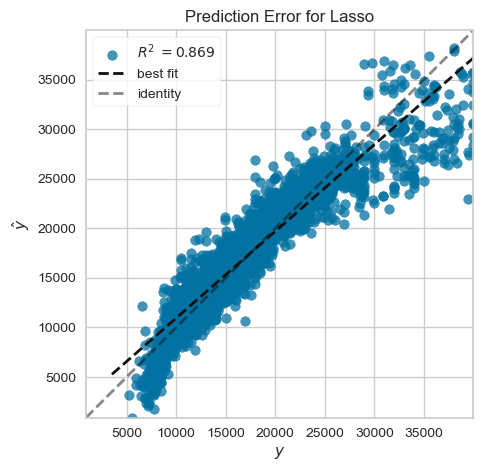

In [195]:
#Visualizing the result
visualizer = RadViz(size=(500, 1000))

visualizer = PredictionError(en_m)
visualizer.fit(X_train_scaled, y_train) # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test) # Evaluate the model on the test data
visualizer.show();
#As we can see, there are some difference between the acual and the predicted line

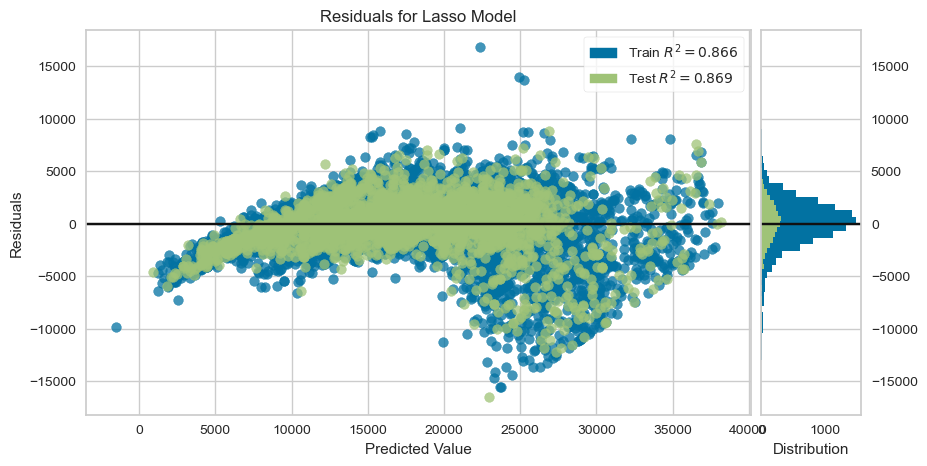

In [196]:
#Seeing the result with train and test for r2
visualizer = RadViz(size=(1000, 500))
visualizer = ResidualsPlot(en_m)

visualizer.fit(X_train_scaled, y_train) # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test) # Evaluate the model on the test data
visualizer.show();
#As we can see, there are some mistakes

In [198]:
#Prediction X_test
y_pred = en_m.predict(X_test_scaled)
en_R2 = r2_score(y_test, y_pred)
en_mae = mean_absolute_error(y_test, y_pred)
en_rmse = mean_squared_error(y_test, y_pred, squared=False)

In [199]:
#Printing the result
print('ridge_R2', en_R2)
print('ridge_mae', en_mae)
print('ridge_rmse', en_rmse)

ridge_R2 0.8694215093959053
ridge_mae 1767.140085875569
ridge_rmse 2447.5883745637184


## XG Boost Model

In [202]:
#Creating XG boost model
xg_model = XGBRegressor(random_state=s)

operations = [("encoder", trans), ("XG_model", xg_model)]

pipe_model = Pipeline(steps=operations)
#Fitting the model
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  Index(['make_model', 'body_type', 'Type', 'Fuel', 'Paint_Type',
       'Upholstery_type', 'Gearing_Type', 'Drive_chain'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('XG_model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              cols...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=101, ...))])

In [203]:
#Seeing the result of the model
eval(pipe_model, X_train, y_train, X_test, y_test)
#As we can see, the result of r2 is good and not so bad. However, if look on the others we can see a huge overfitting.
#I will try to use gridSearch and use the best params and see if the result will change or not.

train        test
R2        0.982       0.954
mae     653.557    1004.532
mse  807310.760 2111630.008
rmse    898.505    1453.145

In [204]:
#Creating crossvalidation
operations = [("encoder", trans), ("XG_model", xg_model)]
model = Pipeline(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)

pd.DataFrame(scores)
pd.DataFrame(scores).iloc[:, 2:].mean()
#We can see the same here as well, the result of the metrics like mean squared error and the others 
#except for the r2 show an overfitting.

test_r2                                    0.946
train_r2                                   0.983
test_neg_mean_absolute_error           -1037.859
train_neg_mean_absolute_error           -638.469
test_neg_mean_squared_error         -2451981.595
train_neg_mean_squared_error         -774086.843
test_neg_root_mean_squared_error       -1564.331
train_neg_root_mean_squared_error       -879.738
dtype: float64

In [206]:
model.get_params()

{'memory': None,
 'steps': [('encoder',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('ordinalencoder', OrdinalEncoder(),
                                    Index(['make_model', 'body_type', 'Type', 'Fuel', 'Paint_Type',
          'Upholstery_type', 'Gearing_Type', 'Drive_chain'],
         dtype='object'))],
                     verbose_feature_names_out=False)),
  ('XG_model',
   XGBRegressor(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
              

In [205]:
#Creating scoring for gridSearch
scoring2 = 'neg_root_mean_squared_error'

In [244]:
#Creating the params of gridSearch
param_grid = {
    'XG_model__n_estimators': [200, 300, 400],
    'XG_model__max_depth': [4, 6, 8],
    'XG_model__learning_rate': [1, 0.1, 0.01, 0.001]
}
#Creating the operations of the gridSearch
operations = [("encoder", trans), ("XG_model", xg_model)]
#Creating a pipeline with the operations as steps
gr_xg = Pipeline(steps=operations)
#Creating the gridSearch
xg_grid = GridSearchCV(gr_xg,
                          param_grid=param_grid,
                          scoring= scoring2,
                          cv=5,
                          verbose=1,
                          return_train_score=True)
#Fitting the gridSearch 
xg_grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(),
                                                                         Index(['make_model', 'body_type', 'Type', 'Fuel', 'Paint_Type',
       'Upholstery_type', 'Gearing_Type', 'Drive_chain'],
      dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('XG_model',
                                        XGBRegressor(base_score=None,
                                                     boos...
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=101, ...))]),
             param_grid={'XG_model__learning_rate': [1, 0.1, 0.01, 0.001],
                         'XG_model__max_depth': [4, 6, 8],
                         'XG_model__n_estimators': [200, 300, 400]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [245]:
#Seeing the best params of the gridSearch to use it 
xg_grid.best_params_

{'XG_model__learning_rate': 0.1,
 'XG_model__max_depth': 6,
 'XG_model__n_estimators': 400}

In [246]:
#seeing the result of the grid search model
eval(xg_grid, X_train, y_train, X_test, y_test)
#From here, we can see that the result is better now, but for mse, it is still huge.

train        test
R2        0.985       0.957
mae     592.235     969.720
mse  663263.672 1977037.511
rmse    814.410    1406.072

In [213]:
#Creating the model of rf with the best params
xg = XGBRegressor(random_state=s, learning_rate = 0.1, n_estimators=400, max_depth = 6)

#the operations of the pipeline
operations = [("encoder", trans), ("XG_model", xg_model)]
#Creating the pipeline
pipe_xg = Pipeline(steps=operations)
#Fitting the model with the training data
pipe_xg.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  Index(['make_model', 'body_type', 'Type', 'Fuel', 'Paint_Type',
       'Upholstery_type', 'Gearing_Type', 'Drive_chain'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('XG_model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              cols...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=101, ...))])

In [214]:
#Seeing the result
eval(pipe_xg, X_train, y_train, X_test, y_test)
#As we can see, there is a huge overfitting in the other result, not r2.

train        test
R2        0.982       0.954
mae     653.557    1004.532
mse  807310.760 2111630.008
rmse    898.505    1453.145

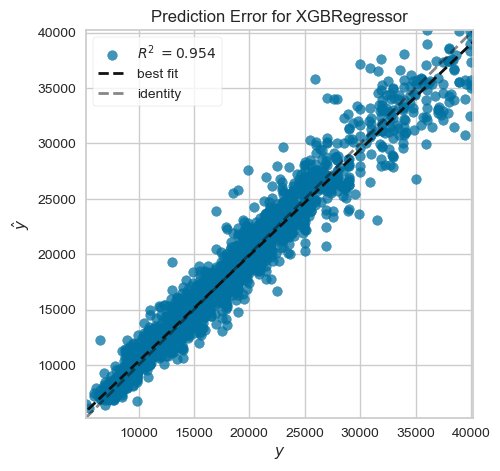

In [215]:
#Visualizing the result
visualizer = RadViz(size=(500, 1000))

visualizer = PredictionError(pipe_xg)
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
visualizer.show();
#As we can see, 

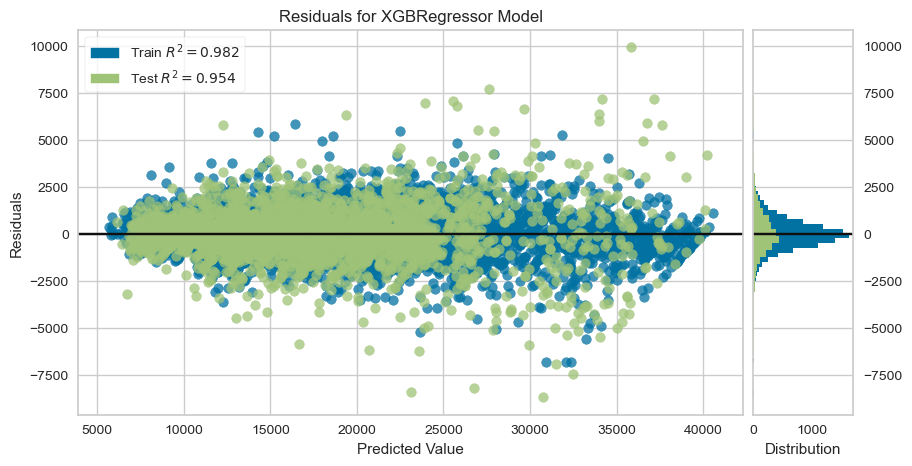

In [216]:
#Seeing the result with train and test for r2
visualizer = RadViz(size=(1000, 500))
visualizer = ResidualsPlot(pipe_xg)

visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
visualizer.show();
#As we can see, there are some mistakes, and it started from about 30000

In [217]:
#Prediction X_test
y_pred = pipe_xg.predict(X_test)

In [218]:
#Saving the result to use them later
xg_R2 = r2_score(y_test, y_pred)
xg_mae = mean_absolute_error(y_test, y_pred)
xg_rmse = mean_squared_error(y_test, y_pred, squared=False)

In [219]:
#Printing the result
print('linear_R2', xg_R2)
print('linear_mae', xg_mae)
print('linear_rmse', xg_rmse)

linear_R2 0.9539729960882003
linear_mae 1004.5315397760083
linear_rmse 1453.1448682983337


### Vanilla RF Model

In [220]:
#Creating vanilla rf model
rf = RandomForestRegressor(random_state=s)

operations = [("encoder", trans), ("RF_model", rf)]
pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)


#Note that, in the trees family, we do not use scaling for the data, as it is a great family

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  Index(['make_model', 'body_type', 'Type', 'Fuel', 'Paint_Type',
       'Upholstery_type', 'Gearing_Type', 'Drive_chain'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model', RandomForestRegressor(random_state=101))])

In [221]:
#Seeing the result of the model
eval(pipe_model, X_train, y_train, X_test, y_test)
#As we can see, the result of r2 is good and not so bad. However, if look on the others we can see a huge overfitting.
#I will try to use gridSearch and use the best params and see if the result will change or not.

train        test
R2        0.993       0.952
mae     370.130     964.480
mse  337359.777 2200262.684
rmse    580.827    1483.328

In [222]:
#Creating crossvalidation
operations = [("encoder", trans), ("RF_model", rf)]
model = Pipeline(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)

pd.DataFrame(scores)
pd.DataFrame(scores).iloc[:, 2:].mean()
#We can see the same here as well, the result of the metrics like mean squared error and the others 
#except for the r2 show an overfitting.

test_r2                                    0.946
train_r2                                   0.992
test_neg_mean_absolute_error            -996.125
train_neg_mean_absolute_error           -372.966
test_neg_mean_squared_error         -2432403.693
train_neg_mean_squared_error         -343322.121
test_neg_root_mean_squared_error       -1557.603
train_neg_root_mean_squared_error       -585.919
dtype: float64

In [223]:
#Creating the params of gridSearch
param_grid = {
    "RF_model__n_estimators": [200, 300, 400],
    "RF_model__max_depth": [6, 8, 10],
    'RF_model__max_features':[2, 4, 6, 8, 'sqrt'],
}
#Creating the operations of the gridSearch
operations = [("encoder", trans), ("RF_model", rf)]
#Creating a pipeline with the operations as steps
gr_rf = Pipeline(steps=operations)
#Creating the gridSearch
rf_grid = GridSearchCV(gr_rf,
                          param_grid=param_grid,
                          scoring= scoring2,
                          cv=5,
                          verbose=1,
                          return_train_score=True)
#Fitting the gridSearch 
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(),
                                                                         Index(['make_model', 'body_type', 'Type', 'Fuel', 'Paint_Type',
       'Upholstery_type', 'Gearing_Type', 'Drive_chain'],
      dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('RF_model',
                                        RandomForestRegressor(random_state=101))]),
             param_grid={'RF_model__max_depth': [6, 8, 10],
                         'RF_model__max_features': [2, 4, 6, 8, 'sqrt'],
                         'RF_model__n_estimators': [200, 300, 400]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [224]:
#Seeing the best params of the gridSearch to use it 
rf_grid.best_params_

{'RF_model__max_depth': 10,
 'RF_model__max_features': 8,
 'RF_model__n_estimators': 400}

In [225]:
pd.DataFrame(rf_grid.cv_results_).loc[
    rf_grid.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    -1655.108
mean_train_score   -1276.226
Name: 41, dtype: object

In [226]:
rf_grid.best_score_

-1655.1083793343837

In [227]:
#seeing the result of the grid search model
eval(rf_grid, X_train, y_train, X_test, y_test)
#From here, we can see that the result is better now, but for mse, it is still huge.

train        test
R2         0.963       0.947
mae      929.977    1083.743
mse  1703865.495 2447306.446
rmse    1305.322    1564.387

In [228]:
#Creating the model of rf with the best params
rf = RandomForestRegressor(random_state=s, max_depth = 10, n_estimators=400, max_features = 8)

#the operations of the pipeline
operations = [("encoder", trans), ("RF_model", rf)]
#Creating the pipeline
pipe_rf = Pipeline(steps=operations)
#Fitting the model with the training data
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  Index(['make_model', 'body_type', 'Type', 'Fuel', 'Paint_Type',
       'Upholstery_type', 'Gearing_Type', 'Drive_chain'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestRegressor(max_depth=10, max_features=8,
                                       n_estimators=400, random_state=101))])

In [229]:
#Seeing the result
eval(pipe_rf, X_train, y_train, X_test, y_test)
#As we can see, the result changed here with the params, and the overfitting decreased and it looks much better than the previous one.

train        test
R2         0.963       0.947
mae      929.977    1083.743
mse  1703865.495 2447306.446
rmse    1305.322    1564.387

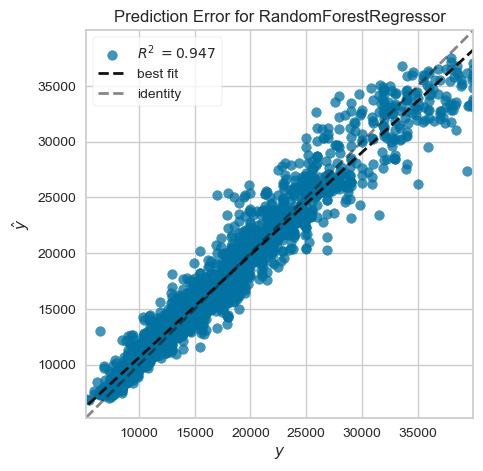

In [230]:
#Visualizing the result
visualizer = RadViz(size=(500, 1000))

visualizer = PredictionError(pipe_rf)
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
visualizer.show();
#As we can see, there are some difference between the acual and the predicted line, it nearly started to be different from around 30000

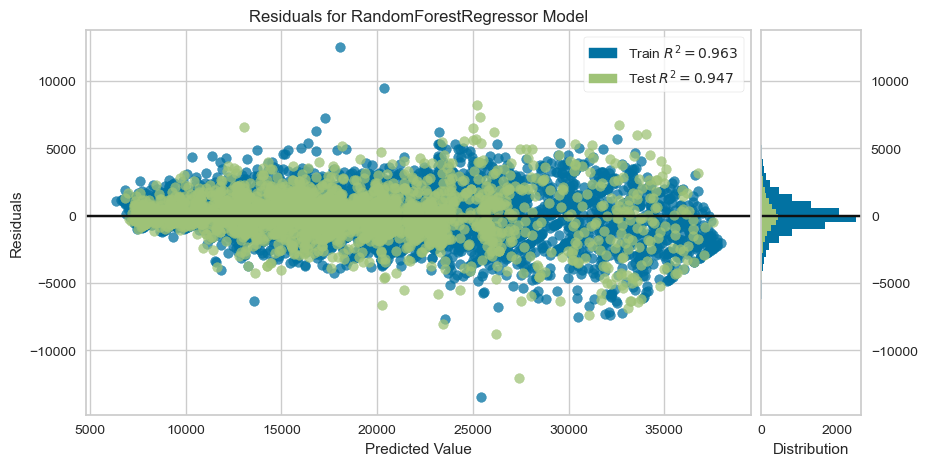

In [231]:
#Seeing the result with train and test for r2
visualizer = RadViz(size=(1000, 500))
visualizer = ResidualsPlot(pipe_rf)

visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
visualizer.show();
#As we can see, there are some mistakes, and it started from about 30000

In [232]:
#Prediction X_test
y_pred = pipe_rf.predict(X_test)

In [233]:
#Saving the result to use them later
rf_R2 = r2_score(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)
rf_rmse = mean_squared_error(y_test, y_pred, squared=False)

In [234]:
#Printing the result
print('linear_R2', rf_R2)
print('linear_mae', rf_mae)
print('linear_rmse', rf_rmse)

linear_R2 0.9466562878364233
linear_mae 1083.7428504624154
linear_rmse 1564.3869233197527


In [235]:
#Creating the features to use them in the visualizing
features = pipe_rf["encoder"].get_feature_names_out()
features

array(['make_model', 'body_type', 'Type', 'Fuel', 'Paint_Type',
       'Upholstery_type', 'Gearing_Type', 'Drive_chain', 'km', 'Gears',
       'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW',
       'Inspection_new', 'Weight_kg', 'cons_comb'], dtype=object)

In [236]:
#Creating a dataframe of the features
rf_feature_imp = pd.DataFrame(data=pipe_rf["RF_model"].feature_importances_,
                              index = features,
                              columns=["Feature Importance"])

rf_feature_imp = rf_feature_imp.sort_values("Feature Importance", ascending=False)
rf_feature_imp

Feature Importance
hp_kW                             0.295
age                               0.154
make_model                        0.120
Gears                             0.115
km                                0.108
Weight_kg                         0.067
Gearing_Type                      0.032
cons_comb                         0.023
Type                              0.023
body_type                         0.020
Comfort_Convenience               0.018
Upholstery_type                   0.010
Safety_Security                   0.005
Entertainment_Media               0.003
Fuel                              0.003
Extras                            0.002
Previous_Owners                   0.001
Inspection_new                    0.001
Paint_Type                        0.000
Drive_chain                       0.000

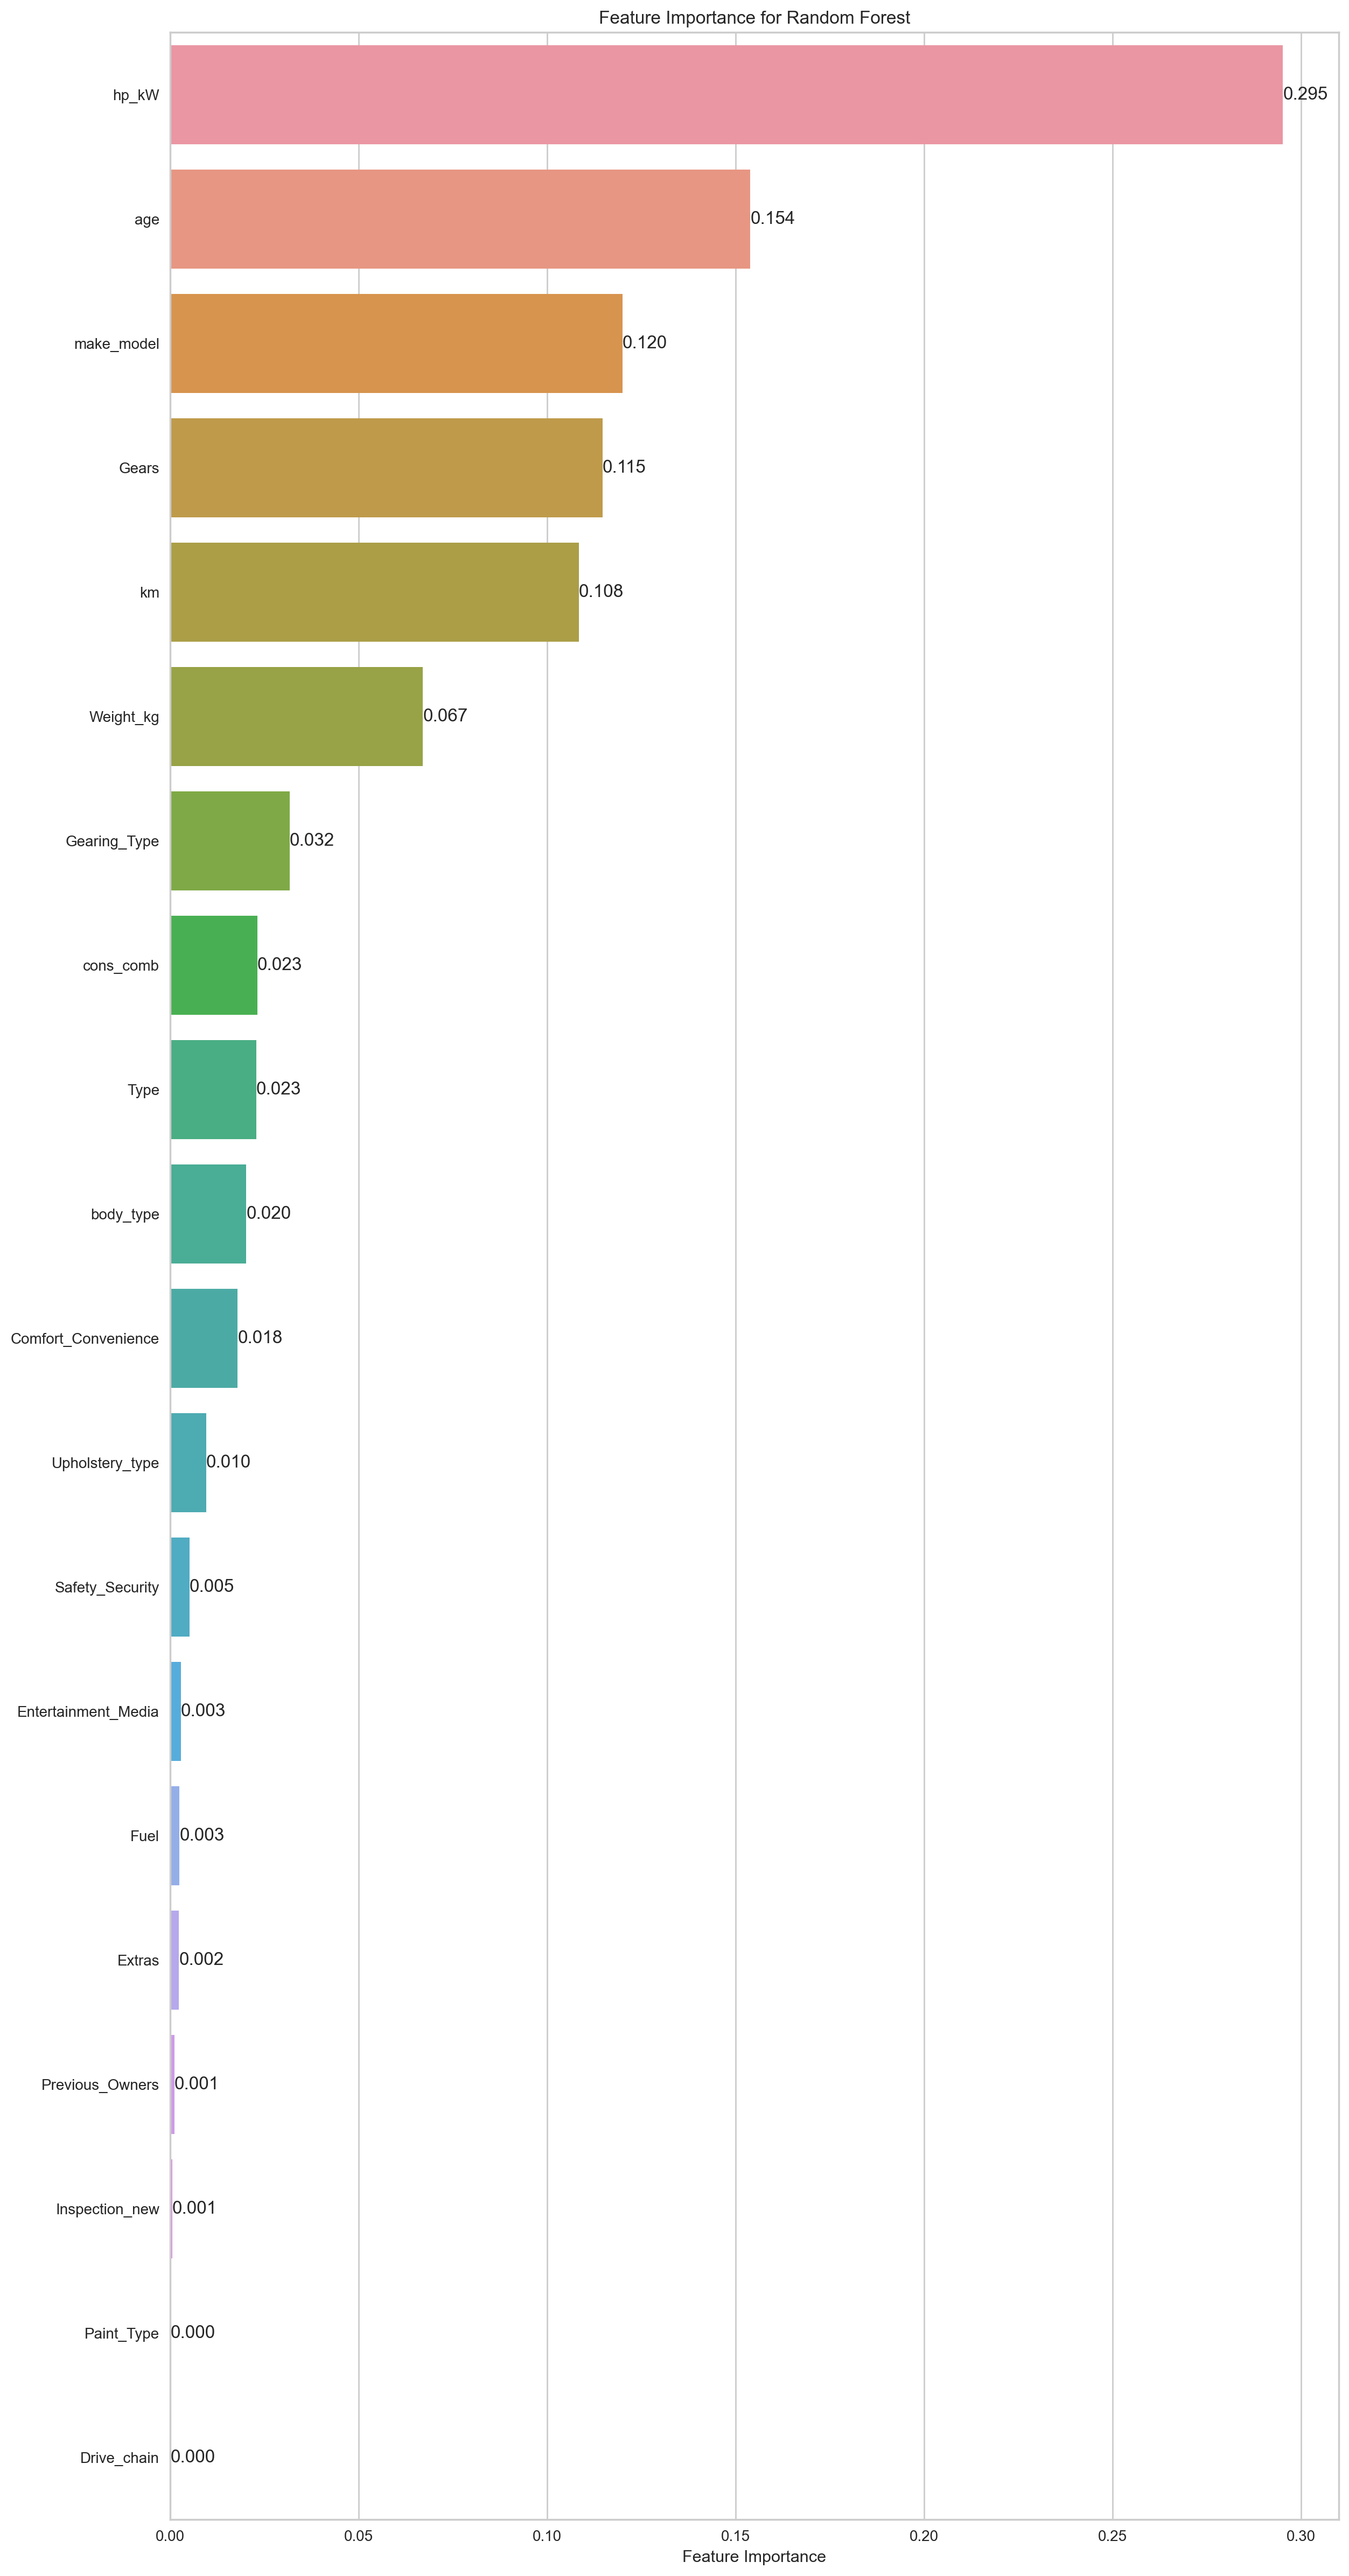

In [237]:
#Plotting the feature importance 
plt.figure(figsize=(14, 30), dpi=200)
ax = sns.barplot(x=rf_feature_imp["Feature Importance"],
                 y=rf_feature_imp.index)

ax.bar_label(ax.containers[0],fmt="%.3f")
plt.title("Feature Importance for Random Forest")
plt.show()
#From here we can see the importance of the features, I will take 6 of them and see the result
#['hp_kW', 'age', 'km', 'Gears', 'make_model']

In [238]:
# Create and train the RandomForestRegressor model
rf = RandomForestRegressor(random_state=s, max_depth = 10, n_estimators=400, max_features = 'sqrt')
rf.fit(X_train_trans, y_train)

# Get the feature importances
importances = rf.feature_importances_

# Sort the feature importances in descending order
sorted_indices = importances.argsort()[::-1]

# Print the feature importance ranking
for feature_idx in sorted_indices:
    print(f"{features[feature_idx]}: {importances[feature_idx]}")

hp_kW: 0.21361524539058457
age: 0.12761929107399056
Gears: 0.11950488540405217
km: 0.10863138630871116
make_model: 0.10761251512750662
Weight_kg: 0.08908675360001471
Gearing_Type: 0.04003043383020415
Type: 0.039765526543619784
cons_comb: 0.039469104875471304
Comfort_Convenience: 0.03446594664076722
body_type: 0.03014121991287221
Upholstery_type: 0.020821847112910734
Safety_Security: 0.011420720786664406
Extras: 0.005884233493738537
Fuel: 0.004347832614944368
Entertainment_Media: 0.004158194028823827
Previous_Owners: 0.0016236421106864012
Inspection_new: 0.0010998845383342834
Drive_chain: 0.0003894667884098897
Paint_Type: 0.00031186981769312224


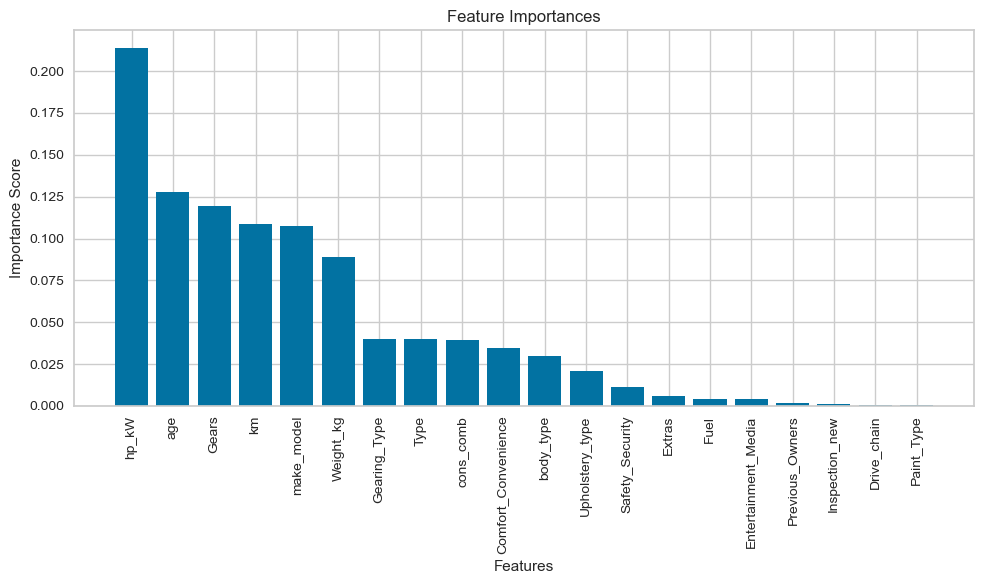

In [239]:
# Get the feature importances
importances = rf.feature_importances_

# Sort the feature importances in descending order
sorted_indices = importances.argsort()[::-1]

# Sort the feature names based on importance scores
sorted_features = np.array(features)[sorted_indices]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_indices])
plt.xticks(range(len(importances)), sorted_features, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [249]:
scores = {"linear_m": {"r2_score": linear_R2 ,
 "mae": linear_mae,
 "rmse": linear_rmse},

 "ridge_m": {"r2_score": rm_R2,
 "mae": rm_mae,
 "rmse": rm_rmse},

 "lasso_m": {"r2_score": l_R2,
 "mae": l_mae,
 "rmse": l_rmse},

 "elastic_m": {"r2_score": en_R2,
 "mae": en_mae,
 "rmse": en_rmse},
         
 "rf_m": {"r2_score": rf_R2,
 "mae": rf_mae,
 "rmse": rf_rmse},   


 "xg_m": {"r2_score": xg_R2,
 "mae": xg_mae ,
 "rmse": xg_rmse}}
scores = pd.DataFrame(scores).T
scores

r2_score      mae     rmse
linear_m      0.869 1769.909 2448.917
ridge_m       0.869 1764.282 2449.745
lasso_m       0.869 1764.577 2453.327
elastic_m     0.869 1767.140 2447.588
rf_m          0.947 1083.743 1564.387
xg_m          0.954 1004.532 1453.145

#### Comparing Models Performance In a Graph

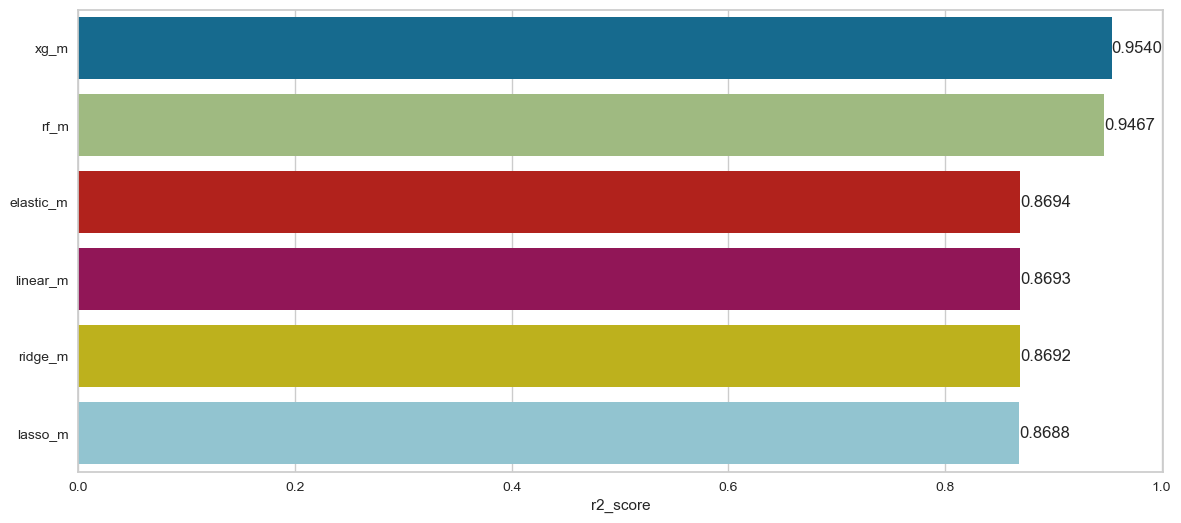

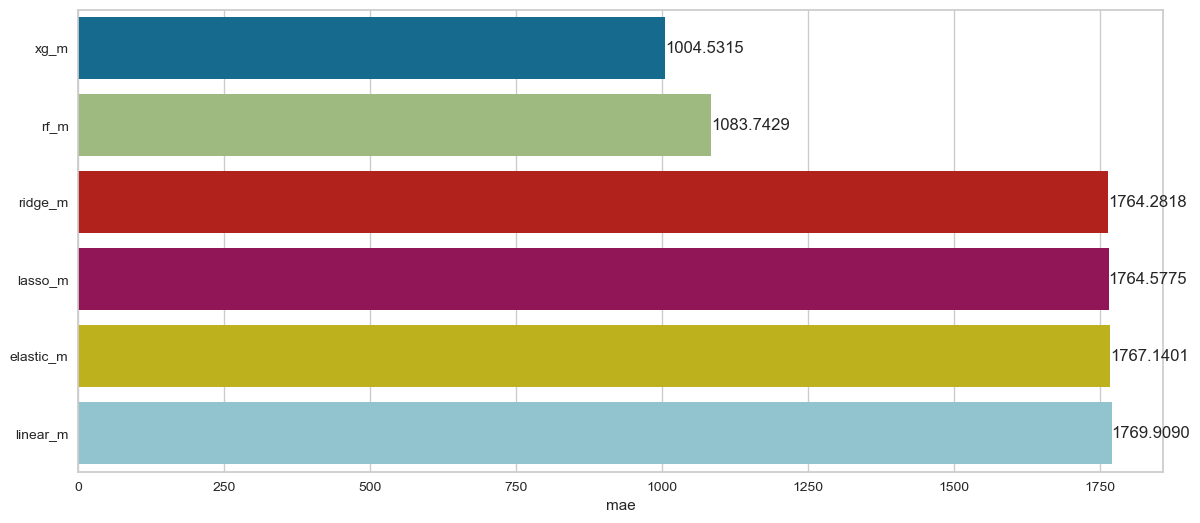

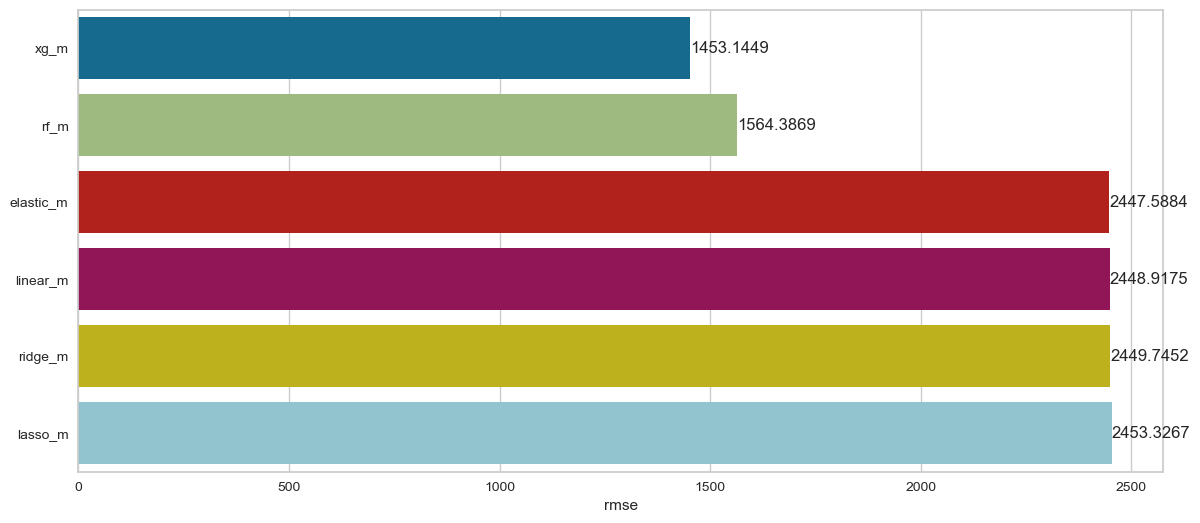

In [250]:
for i, j in enumerate(scores):
    plt.figure(i)
    if j == "r2_score":
        ascending = False # if our metric is r2_score the barplot will be sorted from largest to smallest
    else:
        ascending = True # if our metric is mae or rmse then barplot will be sorted from smallest to largest
    compare = scores.sort_values(by=j, ascending=ascending) # reorders compare df by corresponding metric
    ax = sns.barplot(x = compare[j] , y= compare.index) # The metric scores of compare[j] are drawn sequentially from compare df
                                                        # and visualized in the barplot.
                                                        # y=compare.index will write the model names on the y-axis of our image.
    ax.bar_label(ax.containers[0], fmt="%.4f");

In [ ]:
#From here, we can see that XG boost model is betten than others in the scores, but i has a lot of overfitting. Also,
# When applying it AWS, it will not work perfectly as they do not finish it yet. So, i am going with the second option
# which is random forest.

## Using the features from feature importance only

In [251]:
#Creating a new dataframe from the first dataframe
df_copy = df.copy()
df_copy.head()

make_model body_type  price        km  Type     Fuel  Gears  \
0    Audi A1    Sedans  15770 56013.000  Used   Diesel  7.000   
1    Audi A1    Sedans  14500 80000.000  Used  Benzine  7.000   
2    Audi A1    Sedans  14640 83450.000  Used   Diesel  7.000   
3    Audi A1    Sedans  14500 73000.000  Used   Diesel  6.000   
4    Audi A1    Sedans  16790 16200.000  Used   Diesel  7.000   

   Comfort_Convenience  Entertainment_Media  Extras  Safety_Security   age  \
0                   16                    4       3               14 3.000   
1                    9                    5       4               15 2.000   
2                   13                    2       2               12 3.000   
3                   16                    8       3               14 3.000   
4                   13                    7       4               13 3.000   

   Previous_Owners   hp_kW  Inspection_new Paint_Type Upholstery_type  \
0            2.000  66.000               1   Metallic           Cloth   
1            1.000 141.000               0   Metallic           Cloth   
2            1.000  85.000               0   Metallic           Cloth   
3            1.000  66.000               0   Metallic           Cloth   
4            1.000  66.000               1   Metallic           Cloth   

  Gearing_Type  Weight_kg Drive_chain  cons_comb  
0    Automatic   1220.000       front      3.800  
1    Automatic   1255.000       front      5.600  
2    Automatic   1135.000       front      3.800  
3    Automatic   1195.000       front      3.800  
4    Automatic   1135.000       front      4.100

In [252]:
#Seeing the columns of df_co
df_copy.columns

Index(['make_model', 'body_type', 'price', 'km', 'Type', 'Fuel', 'Gears',
       'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Weight_kg',
       'Drive_chain', 'cons_comb'],
      dtype='object')

In [253]:
#Seeing the columns of df
df.columns

Index(['make_model', 'body_type', 'price', 'km', 'Type', 'Fuel', 'Gears',
       'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Weight_kg',
       'Drive_chain', 'cons_comb'],
      dtype='object')

In [254]:
#Dropping the unnecessary columns
df_copy = df_copy.drop(['body_type', 'Type', 'Weight_kg', 'Gearing_Type' ,'Fuel', 'Comfort_Convenience', 'Entertainment_Media', 'Extras','Safety_Security', 'Previous_Owners', 'Inspection_new','Paint_Type', 'Upholstery_type','Drive_chain', 'cons_comb'], axis=1)
#Seeing the head
df_copy.head()
#As we can see, we do not have all of the columns now


#['hp_kW', 'age', 'km', 'Gears', 'make_model']

make_model  price        km  Gears   age   hp_kW
0    Audi A1  15770 56013.000  7.000 3.000  66.000
1    Audi A1  14500 80000.000  7.000 2.000 141.000
2    Audi A1  14640 83450.000  7.000 3.000  85.000
3    Audi A1  14500 73000.000  6.000 3.000  66.000
4    Audi A1  16790 16200.000  7.000 3.000  66.000

## Modeling

### Train | Test Split

In [255]:
#Splitting the data to X and y
X= df_copy.drop(columns="price")
y= df_copy.price

In [256]:
#Seeing the head of X
X.head()

make_model        km  Gears   age   hp_kW
0    Audi A1 56013.000  7.000 3.000  66.000
1    Audi A1 80000.000  7.000 2.000 141.000
2    Audi A1 83450.000  7.000 3.000  85.000
3    Audi A1 73000.000  6.000 3.000  66.000
4    Audi A1 16200.000  7.000 3.000  66.000

In [257]:
#seeing the head of y
y.head()

0    15770
1    14500
2    14640
3    14500
4    16790
Name: price, dtype: int64

In [258]:
#Seeing the shape of X and y
print('X shape is:', X.shape)
print('y shape is:', y.shape)

X shape is: (14070, 5)
y shape is: (14070,)


In [259]:
#Splitting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t, random_state=s)

In [260]:
#Seeing the shape of X_train and X_test
print('X_train, shape is:', X_train.shape)
print('X_test shape is:', X_test.shape)


#Seeing the shape of y_train and y_test
print('y_train, shape is:', y_train.shape)
print('y_test shape is:', y_test.shape)

X_train, shape is: (11256, 5)
X_test shape is: (2814, 5)
y_train, shape is: (11256,)
y_test shape is: (2814,)


In [261]:
#Seeing the head of X_train
X_train.head()

make_model         km  Gears   age   hp_kW
8963       Opel Corsa      9.000  6.000 0.000  66.000
13900  Renault Espace  21709.000  6.000 2.000 118.000
11322   Opel Insignia   1647.363  6.000 0.000 100.000
2917          Audi A3 156000.000  6.000 3.000  81.000
10780   Opel Insignia  29900.000  6.000 1.000 125.000

In [262]:
#Seeing the head of X_test
X_test.head()

make_model        km  Gears   age   hp_kW
2102         Audi A1  4500.000  5.000 0.000  66.000
1985         Audi A1  7500.000  7.000 0.000  85.000
11624  Opel Insignia  1647.363  6.000 0.000 121.000
666          Audi A1 11707.000  5.000 1.000  60.000
7689      Opel Corsa 22635.000  6.000 3.000  66.000

In [263]:
#Seeing the head of y_train
y_train.head()

8963     16990
13900    29990
11322    34490
2917     11990
10780    23970
Name: price, dtype: int64

In [264]:
#Seeing the head of y_test
y_test.head()

2102     20000
1985     24999
11624    33335
666      14220
7689     11990
Name: price, dtype: int64

In [265]:
#Seeing the object classes in the data set
df_copy.select_dtypes(include="object").head(1)

make_model
0    Audi A1

In [266]:
cat_v = X_train.select_dtypes("object").columns
cat_v

Index(['make_model'], dtype='object')

In [267]:
#Creating ordinal encoder
ord_enc = OrdinalEncoder()
trans = make_column_transformer((ord_enc, cat_v), remainder='passthrough', verbose_feature_names_out=False).set_output(transform="pandas") 

In [268]:
#Seeing the head of X_train
X_train.head()

make_model         km  Gears   age   hp_kW
8963       Opel Corsa      9.000  6.000 0.000  66.000
13900  Renault Espace  21709.000  6.000 2.000 118.000
11322   Opel Insignia   1647.363  6.000 0.000 100.000
2917          Audi A3 156000.000  6.000 3.000  81.000
10780   Opel Insignia  29900.000  6.000 1.000 125.000

In [269]:
#Fitting the trans with X_train
X_train_trans = trans.fit_transform(X_train)

#Fitting the trans with X_test
X_test_trans = trans.transform(X_test)

In [270]:
#Seeing X_train_trans after converting
X_train_trans

make_model         km  Gears   age   hp_kW
8963        3.000      9.000  6.000 0.000  66.000
13900       6.000  21709.000  6.000 2.000 118.000
11322       4.000   1647.363  6.000 0.000 100.000
2917        1.000 156000.000  6.000 3.000  81.000
10780       4.000  29900.000  6.000 1.000 125.000
...           ...        ...    ...   ...     ...
5718        2.000  36600.000  5.000 3.000  77.000
8029        3.000   8930.000  6.000 1.000  66.000
1361        0.000   7987.000  7.000 1.000 141.000
1547        0.000   6600.000  7.000 1.000  85.000
13200       5.000   1647.363  5.000 0.000  66.000

[11256 rows x 5 columns]

In [271]:
#Seeing X_train without transforming or using encoder on it
X_train

make_model         km  Gears   age   hp_kW
8963       Opel Corsa      9.000  6.000 0.000  66.000
13900  Renault Espace  21709.000  6.000 2.000 118.000
11322   Opel Insignia   1647.363  6.000 0.000 100.000
2917          Audi A3 156000.000  6.000 3.000  81.000
10780   Opel Insignia  29900.000  6.000 1.000 125.000
...               ...        ...    ...   ...     ...
5718       Opel Astra  36600.000  5.000 3.000  77.000
8029       Opel Corsa   8930.000  6.000 1.000  66.000
1361          Audi A1   7987.000  7.000 1.000 141.000
1547          Audi A1   6600.000  7.000 1.000  85.000
13200    Renault Clio   1647.363  5.000 0.000  66.000

[11256 rows x 5 columns]

In [272]:
#Seeing the shape of X_train_trans and X_test_trans
X_train_trans.shape, X_test_trans.shape 

((11256, 5), (2814, 5))

In [273]:
#Seeing the head of X_train_trans
X_train_trans.head()

make_model         km  Gears   age   hp_kW
8963        3.000      9.000  6.000 0.000  66.000
13900       6.000  21709.000  6.000 2.000 118.000
11322       4.000   1647.363  6.000 0.000 100.000
2917        1.000 156000.000  6.000 3.000  81.000
10780       4.000  29900.000  6.000 1.000 125.000

In [274]:
#Seeing the head of X_test_trans
X_test_trans.head()

make_model        km  Gears   age   hp_kW
2102        0.000  4500.000  5.000 0.000  66.000
1985        0.000  7500.000  7.000 0.000  85.000
11624       4.000  1647.363  6.000 0.000 121.000
666         0.000 11707.000  5.000 1.000  60.000
7689        3.000 22635.000  6.000 3.000  66.000

In [275]:
#Creating the model of rf with the best params
rf_model = RandomForestRegressor(random_state=s)

#the operations of the pipeline
operations = [("encoder", trans), ("RF_model", rf_model)]
#Creating the pipeline
pipe_rf = Pipeline(steps=operations)
#Fitting the model with the training data
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  Index(['make_model'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model', RandomForestRegressor(random_state=101))])

In [276]:
#Seeing the result
eval(pipe_rf, X_train, y_train, X_test, y_test)
#As we can see, there is an overfitting

train        test
R2         0.971       0.913
mae      664.110    1357.741
mse  1300754.648 4002460.884
rmse    1140.506    2000.615

In [277]:
#Creating the params of gridSearch
param_grid = {
    "RF_model__n_estimators": [200, 300, 400],
    "RF_model__max_depth": [6, 8, 10],
    'RF_model__max_features':[2, 4,'sqrt'],
}
rf = RandomForestRegressor(random_state=s)
#Creating the operations of the gridSearch
operations = [("encoder", trans), ("RF_model", rf)]
# Creating a pipeline with the operations as steps
gr_rf2 = Pipeline(steps=operations)

#Creating the gridSearch
rf_grid2 = GridSearchCV(gr_rf2,
                          param_grid=param_grid,
                          scoring= scoring2,
                          cv=5,
                          verbose=1,
                          return_train_score=True)
#Fitting the gridSearch 
rf_grid2.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(),
                                                                         Index(['make_model'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('RF_model',
                                        RandomForestRegressor(random_state=101))]),
             param_grid={'RF_model__max_depth': [6, 8, 10],
                         'RF_model__max_features': [2, 4, 'sqrt'],
                         'RF_model__n_estimators': [200, 300, 400]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [278]:
#Seeing the best params of the gridSearch to use it 
rf_grid2.best_params_

{'RF_model__max_depth': 10,
 'RF_model__max_features': 2,
 'RF_model__n_estimators': 200}

In [279]:
#seeing the result of the grid search model
eval(rf_grid2, X_train, y_train, X_test, y_test)
#From here, we can see that the result is better now, but for mse, it is still huge.

train        test
R2         0.937       0.921
mae     1140.623    1283.880
mse  2875784.112 3620166.998
rmse    1695.814    1902.674

In [280]:
#Creating the model of rf with the best params
rf_model = RandomForestRegressor(max_depth= 10, max_features = 2, n_estimators= 200,  random_state=s)

#the operations of the pipeline
operations = [("encoder", trans), ("RF_model", rf_model)]
#Creating the pipeline
pipe_rf_m = Pipeline(steps=operations)
#Fitting the model with the training data
pipe_rf_m.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  Index(['make_model'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestRegressor(max_depth=10, max_features=2,
                                       n_estimators=200, random_state=101))])

In [281]:
#seeing the result of the grid search model
eval(pipe_rf_m, X_train, y_train, X_test, y_test)
#From here, we can see that the result is better now, but for mse, it is still huge.

train        test
R2         0.937       0.921
mae     1140.623    1283.880
mse  2875784.112 3620166.998
rmse    1695.814    1902.674

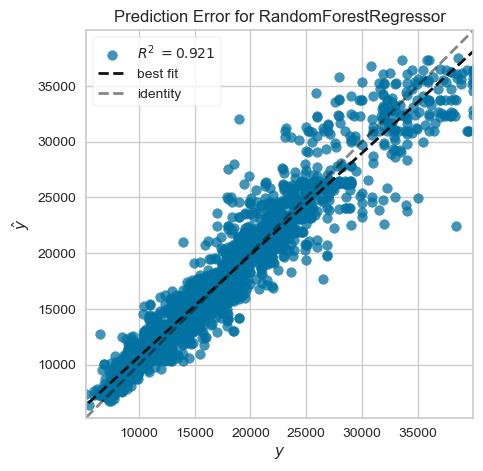

In [282]:
#Visualizing the result
visualizer = RadViz(size=(500, 1000))

visualizer = PredictionError(pipe_rf_m)
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
visualizer.show();
#As we can see, there are some difference between the acual and the predicted line, it nearly started to be different from around 30000

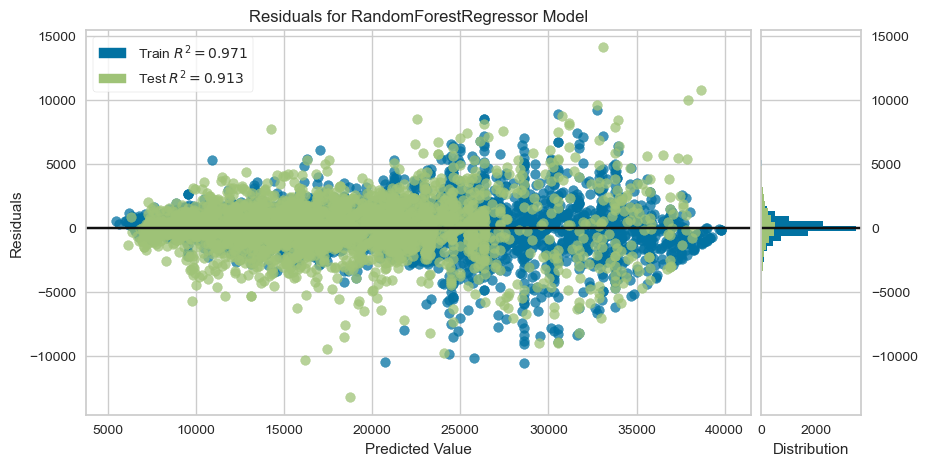

In [283]:
#Seeing the result with train and test for r2
visualizer = RadViz(size=(1000, 500))
visualizer = ResidualsPlot(pipe_rf)

visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
visualizer.show();
#As we can see, there are some mistakes, and it started from about 30000

In [284]:
#Prediction X_test
y_pred = pipe_rf.predict(X_test)

## Final Modle

In [285]:
#Creating the model of rf with the best params
rf = RandomForestRegressor(random_state=s, max_depth = 10, n_estimators=200, max_features = 2)

#the operations of the pipeline
operations = [("encoder", trans), ("RF_model", rf)]
#Creating the pipeline
final_rf = Pipeline(steps=operations)
#Fitting the model with the whole data
final_rf.fit(X, y)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  Index(['make_model'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestRegressor(max_depth=10, max_features=2,
                                       n_estimators=200, random_state=101))])

In [287]:
df_copy.columns

Index(['make_model', 'price', 'km', 'Gears', 'age', 'hp_kW'], dtype='object')

In [289]:
my_dict = {
    'make_model': 'Renault Espace',
    'km': 80000.000,
    'Type': 'Used', 
    'Gears': 7.000, 
    'age': 2.000,
    'hp_kW': 66.000,
}

In [290]:
data = pd.DataFrame.from_dict([my_dict])
data

make_model        km  Type  Gears   age  hp_kW
0  Renault Espace 80000.000  Used  7.000 2.000 66.000

In [291]:
prediction = final_rf.predict(data)
print(prediction)

[16004.66494716]


In [292]:
print("The estimated price is {}. ".format(int(prediction[0])))

The estimated price is 16004. 


## Saving the model

In [293]:
pickle.dump(final_rf, open('final_rf', 'wb'))

In [294]:
new_model = pickle.load(open('final_rf', 'rb'))